### ----------------------------------------------------------------------------------------------------------------------------------------------------------
# Table of Contents
### ----------------------------------------------------------------------------------------------------------------------------------------------------------

- Project Overview - Description of the project scope and goals as well as the data used. 
- Importing Data and Basic Libraries
- Exploratory Data Analysis - Exploring features in the data set
- Data Stationarity - Discussing and investigating data stationarity for each feature
- Outliers - Looking at outliers
- Target Selection - Discussing and selecting target feature
- Feature Creation - Creating various features
- Data Filtering, Cleaning and Temporary Splitting - Cleaning the data and temporary split of the data
- Feature Selection - Selecting features to be used for modeling
- Train Test Split and Data Scaling/Encoding - Filtering and splitting data into train and tests sets
- Modeling - Creating and optimizing a variety of machine learning models
- Model Evaluation & Selection - Evaluating and selecting the optimal model
- Strategy Creation - Creating various day trading strategies
- Strategy Selection & Evaluation - Selecting and evaluating the optimal strategy
- Wrap-up and Summary - Presenting final results and findings


### ----------------------------------------------------------------------------------------------------------------------------------------------------------
# Project Overview
### ----------------------------------------------------------------------------------------------------------------------------------------------------------

### Project Scope and Description

The stock market has been around for decades and has proven to be an enormous opportunity for generating wealth. Data has been maintained on all the transactions that have occurred in the market throughout the years, generally summarized in time intervals (Ex yearly, monthly, daily). The markets consist of trending markets, whether that is upwards, sideways or downwards. Given these trends and the significant amount of data available I am hoping to build a supervised machine learning model to predict the direction of the overall stock market. By overall stock market I am referring to the S&P 500 and more specifically the ES (S&P 500 mini futures). While the data maintained for the basics of the stock market is fairly simple, I believe with strong feature engineering it will be possible to create a model to take advantage of this opportunity.

To take it a step further, not only do I want to predict the direction of the stock market but I want to determine if you should buy at any given moment, and subsequently what price you should sell at. To do so, a strategy will need to be developed for when to enter and exit the market. The base strategy will include the market direction prediction from the machine learning model as well as a few other criteria and filters. Additionally, 3 key price points will need to be determined for the strategy (Note that these prices will be determined using a general algorithm and not machine learning):
1) The price to enter the market 
2) The price to exit the market if the position is winning (Referred to as the "target") 
3) The price to exit the market if the position is losing (Referred to as the "stop"). 

By determining these price points, the hope is to build an application that will determine if you should enter into the market at any given time with a increased chance of generating a profit. Due to this, using intraday data (see below in data description) the trades will be short term, likely opened and closed within an hour.

In other words, with the above information I hope to create a bot that will be able to day trade the market. I believe this will be beneficial as it will help empower the individuals to make consistent profits off the market, without being reliant on a trained professional broker.

### Data Description


For this project I focused on predicting the S&P 500 futures prices, or more specifically the E-mini S&P 500 (symbol ES). Futures contracts work a bit different than a typical security such as a share in Microsoft. Futures do have prices that trend up and down just like normal securities however there are a few key differences:

- They have expiry dates which are rolled over every quarter. This won't affect this project much but just a key difference to note. There is an adjustment that is needed because of this, however this is already completed by the data provider. See the last paragraph of this section for more details on this.
- They prices change in increments of \\$0.25 (this is referred to as a tick). That is, the price won't go from \\$4,000.00 to \\$4,000.01, rather it will go to \\$4,000.25 - increase by \\$0.25 at a time.
- Futures work in contracts rather than shares or units. For all intents and purposes they behave the same. 
- The profit or loss for futures are calculated different compared to a typical security. A typical security you would just take the purchase price less the sale price and multiply it by the number of shares, however futures are more complicated than that. For ES futures each \\$0.25 increment change in price (tick) represents a \\$12.50 gain or loss. If you bought the ES at \\$4,000 and sold at \\$4,001.50, you would have profited 6 ticks (\\$1.50 / \\$0.25) or a gain of \\$75 (6 * \\$12.50). Vice versa is true if the ES dropped in price since you bought it. As a result, the profit and loss calculations done in this notebook will be a bit different then you expect. This of course is affected by the number of contracts you hold but this works in the same way as a typical security.
- When trading futures, you are trading on a margin account. If the price of the ES is \\$4,000 and you want to purchase it, the amount of cash you need does not necessarily relate to the \\$4,000 price. Rather your broker will have set margin requirements for each future contract you wish to purchase. This means you will need X cash in your account to purchase one contract which is essentially used as collateral if the future goes in the wrong direction. The required margin per contract varies greatly by broker and their risk tolerance, ranging anywhere from \\$500 to \\$10,000 per contract. Note that you are purchasing the same instrument at any of the brokers and they will work the same, it is just a risk management tool done by the brokers.

Due to how the profit and loss (PNL) is calculated as well as the margins, it allows you to have significantly more leverage and thus an increased profit potential compared to just trading a index fund on the S&P. Meanwhile you will still maintain the same underlying market (S&P) with the high volume needed for day trading. Because of these reasons I believe it will be an ideal instrument for a day trading bot.

The data source for this project is FirstRate Data. They are a online company specializing in providing historical data for the stock market over a variety of instruments, symbols and timeframes. I do have access to an API through my broker to access this information, however I am limited in how far I can go back as such FirstRate Data was used instead.

ES prices are available in a variety of time intervals (Ex. 5 mins, 1 hour, daily, weekly). Each interval represents the summary of all the individual buys and sells that occurred over that time period. For this project 5 minute intervals were used as it will provide the highest sample count for training, testing and verifying the strategy's profitability. For this project each sample or interval summary will be referred to as a "bar".

In our initial data we have the following features for each bar in the market:
- date - This will be the date and the 5 minute interval that the bar covers
- open - This is the price that the “date” opened at. In other words, this is the price of the first transaction in that time frame. 
- high - This is the highest price achieved during the timeframe. 
- low - This is the lowest price achieved during the timeframe.
- close - This is the price that the “date” closed at. In other words, this is the price of the last transaction in that time frame. 
- Volume - This is the number of units transferred or bought/sold during that time frame. 

The data acquired goes from January 2008 to September 2023. Given changing market conditions throughout time and the large amount of data provided, I filtered the data to only include data from 2013 on. After the data is filtered to be only 2013 on, there is still over 700k samples which will be plenty enough for the purposes of this project.

The expiration of futures contracts causes a gap (significant change) in the price of the prior expired contract to the new contract. This is due to a variety of reasons that I will not get into in this project. However, this raises an issues as we will have abrupt significant changes in price when contracts expire (contracts expire every 4 months) which will make it difficult to model. However, FirstRate Data provides an adjusted version of futures prices where they are adjusted/smoothed to remove these significant changes during contract expiration. This provides a smoother trend and will make it easier for the models to predict accurately.

### Approach


In order to create the day trading bot, the following will be completed during the project:
- Data will be explored to ensure it is clean
- Data will be adjusted for stationarity given it contains significant trends
- Various features will be created to improve the predictive ability
- Various machine learning models will be created and explored to determine the best model
- Strategies will be created to try and profit off the predictions from the machine learning model
- The optimal model and strategy will be utilized in a user-interface web application to output the results to the user

### Model & Strategy Evaluation

Predicting the movement of stock prices is a complex, difficult problem. As such when models are being evaluated we would not anticipate a high accuracy (Ex. 80 or 90%). For this project a model is determined to be successful if it achieves an accuracy above 50% or superior to a random guess. Even a small edge of a few % can allow a person to generate profits over a large enough sample size.

When evaluating the strategy’s performance, we will look at a few different metrics such as profit and loss, win %, and Sharpe ratio. Ultimately, the performance of the strategy will be compared to the PNL if you bought and held a S&P 500 index over that period. Note that it is not compared to buying and holding the ES. This is because there is extreme leverage in the ES, so if you bought and held there is a strong chance that your account would be bankrupted on some of the downward corrections in the market.

### User Interface

As the intended use of the application is to assist someone with day trading (show when to enter and exit trades) a user interface was created to provide them the necessary details. This was created through Flask and will be hosted locally (not included in this notebook, see other folders in repository). 

The following will be the main inputs and outputs for the user interface:

Inputs:
- The user will input historical ES data into the application with it the data summarized in 5 minute bars. 
- This will need to include the open, high, low, close and volume for that bar. 

Outputs:
- The primary output of the user interface will be if they should take a trade at the most current price/bar.

- In the case it recommends to take a trade, it will then output the following:
    - The price to enter at
    - The target price to exit the trade at 
    - The stop price to exit the trade if it is losing

### Assumptions Made

During the project a few assumptions were made that could affect the performance:
- It is assumed that there is enough liquidity in the market to enter and exit the trades at the given price. There is not detailed enough information readily available to determine the amount of liquidity at given prices.
- For evaluating the strategies, it is assumed you are only trading 1 contract in the market with a required initial capital of \\$10,000.

### Complications

During the project certain complications and difficulties arose that ultimately affected the final performance of the project. Had these not been present, I believe the performance could be improved.
- Computational issues - Given the amount of data being used and the complexities of the models, determining the optimal hyperparameters to use was constrained significantly. Performing grid search on the hyperparameters took a significant amount of time, often times not finishing overnight. As a result, I wasn't able to ascertain the optimal parameters.
    - This affected the feature selection process. Different approaches were looked into such as forward and backwards sequential feature selection, however due to the time to run this searches over my data I elected for a simpler approach.
     - This affected feature parameter optimization process. Initially I hoped to use random forest importance to adjust my features parameters to be optimal as this is the method used to select the final features. However due to the constraints of running a large number of random forest models this wasn't possible and a simpler approach was used again.
- Missing data - Although the data I used was complete, predicting the stock market is incredibly complex and a wide variety of data can be useful for improving the model. These could include such things as economic data and significant news events (financial or political). This information can help explain some of the more erratic behavior in the markets. This information was outside the scope of this project due to the financial costs of acquiring it.
- An alternative approach could of been looked into for training the models and implementing the strategies. A custom loss function could have been created to maximize the strategy metrics (Ex. profit) when training the model. This would have the benefit of implementing the strategy into the machine learning and as such optimizing the strategy which is our final product. However, due to limitations in sklearn's models this was not possible. This is something I would like to explore at a further data using another modeling package.

### ----------------------------------------------------------------------------------------------------------------------------------------------------------
# Importing Data and Basic Libraries 
### ----------------------------------------------------------------------------------------------------------------------------------------------------------

In [287]:
#importing base libraries
import pandas as pd
import numpy as np
from datetime import *
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [288]:
#importing the data used for the project
data = pd.read_csv('Data/ES_5min_continuous_adjusted.txt', 
                   header = None, names = ['date','open','high','low','close','volume'])


In [289]:
#filtering data to only be the last 10 years.
data = data.loc [data['date'] > '2013-01-01'].reset_index(drop = True)

In [4]:
display(data.head())
display(data.tail())

,date,open,high,low,close,volume
0,2013-01-02 06:00:00,1451.50,1453.50,1446.75,1452.50,45678
1,2013-01-02 06:05:00,1452.75,1454.25,1451.75,1453.25,17869
2,2013-01-02 06:10:00,1453.50,1456.00,1453.25,1454.25,14372
3,2013-01-02 06:15:00,1454.50,1456.75,1454.25,1455.00,9256
4,2013-01-02 06:20:00,1454.75,1455.00,1452.00,1452.25,7316


,date,open,high,low,close,volume
753723,2023-09-15 16:35:00,4502.00,4502.00,4500.75,4501.00,1781
753724,2023-09-15 16:40:00,4501.25,4501.75,4501.00,4501.50,1176
753725,2023-09-15 16:45:00,4501.75,4502.50,4501.50,4501.75,1355
753726,2023-09-15 16:50:00,4502.00,4502.00,4499.50,4500.25,1471
753727,2023-09-15 16:55:00,4500.50,4500.75,4499.00,4499.00,1736


### ----------------------------------------------------------------------------------------------------------------------------------------------------------
# Exploratory Data Analysis (EDA)
### ----------------------------------------------------------------------------------------------------------------------------------------------------------


As our dataset contains fairly few features and due to its nature it is likely to be fairly clean already, so will be limited EDA done. However, the following will be looked into:
- Data types
- Null values
- Key statistics
- Basic visualization
- Outliers

### Data Types

In [5]:
#ensuring all data types are appropriate. 
#note that date is currently an object. let's change that to a datetime type as it will be useful later on.
data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [6]:
#converting date to datetime type
data['date'] = pd.to_datetime(data['date'])

### Null Values

In [7]:
#checking to see if there are any null values - no null values
data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

### Key Statistics

Per review of the summary statistics below we can note the following:
- Volume - The standard deviation for volume is fairly high. We can also see it is likely right skewed or there are significant outliers as the max is significantly higher than the mean. This would be expected as we would expect certain bars to have significantly more volume then then the average bar due to certain events (Ex. News) that would increase its volatility and volume. 
- Open, high, low, close - All of these have similar values for statistics so we will look at them together. We can see that there is a fairly large range of values with the mean falling close to the center of the range. Standard deviation is also quiet large as well. This shows that the min/max values don't appear to be outliers but rather a large amount of values exist out around those levels. 

In [8]:
#getting summary statistics over the data
data.describe()

,open,high,low,close,volume
count,753728.000000,753728.000000,753728.000000,753728.000000,753728.000000
mean,2942.641321,2943.690194,2941.579664,2942.643718,5519.013665
std,957.784367,958.198710,957.359796,957.783123,9950.957237
min,1449.750000,1450.500000,1446.750000,1449.750000,1.000000
25%,2141.500000,2142.000000,2140.750000,2141.500000,488.000000
50%,2802.000000,2803.000000,2800.750000,2802.000000,1368.000000
75%,3858.750000,3860.500000,3856.750000,3858.750000,6412.000000
max,4978.500000,4979.750000,4977.500000,4978.250000,275823.000000


### Visualizations - Price

Again like in the key statistics, as open/high/close/low all have similar values we would expect any visualizations to look comparable between them. As such we will look at them together. Close is the feature that will be used as it is the most relevant of them all and is common practice in the industry. 

Looking at the charts below we can note a few things:
- There is a clear trend in the price data. This brings into the question of if the data is stationary. This will be looked into in the next section, Data Stationarity. 
- The prices do not appear to follow a standard normal distribution but follow much closer to a trimodal distribution. 

However as noted above data stationarity may be an issue, so these will be investigated further in the next section. 

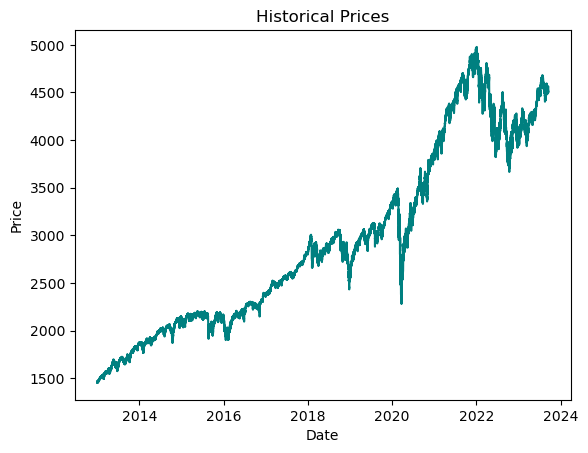

In [144]:
#plotting the historical prices
plt.plot(data['date'], data['close'],  c = 'teal')
plt.title('Historical Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

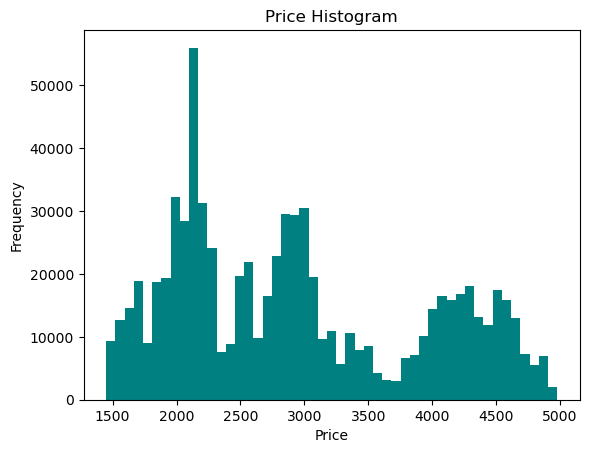

In [143]:
#plotting the price histogram.
plt.hist(data['close'], bins = np.linspace(data['close'].min(), data['close'].max(),50),  color = 'teal')
plt.title('Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Visualizations - Price via Candle Stick

While not extremely useful for EDA, candle stick charts contain some essential information that will be utilized later when creating features so I will provide some context on them here. Below is an example of a candlestick chart. These provide the following information for each bar:
- The color of the bar (or candle) determines the direction the bar moved in that instance. Red being down and green being up. Direction is calculated as change from open to close.
- The top and bottom of each candle are the high and low for that bar.
- The wider bar in each candle represent the body of the candle. The two extremes of the body (top and bottom) show the open and close for that candle. If the candle is green the open is the lower part of the body and the close is the higher part. Vice versa for if its red. 
- The skinny bars are referred to as the wicks. The wicks represent prices it traded at that were outside the body or the open/close.

As you can see there is a lot of information in each one of these candles. This information will be utilized when creating features so it is important to understand them here.

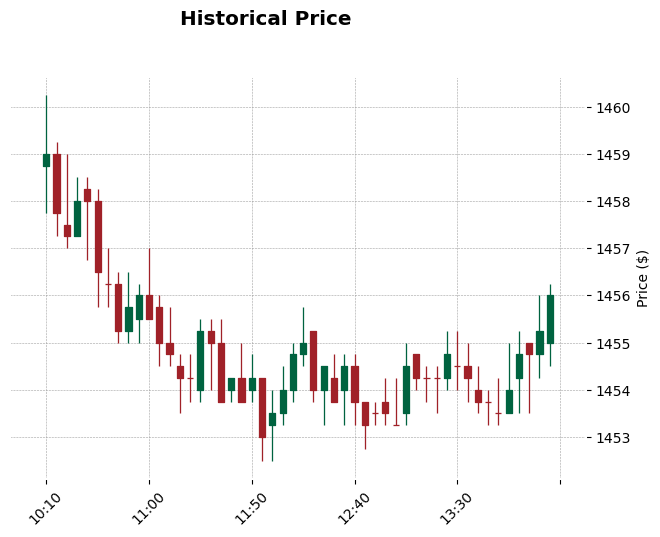

In [11]:
#plotting candlestick chart of historical prices
import mplfinance as fplt

fplt.plot(
            data.set_index('date').drop('volume', axis = 1)[50:100],
            type='candle',
            style='charles',
            title='Historical Price',
            ylabel='Price ($)',
            )

### Visualizations - Volume

Looking at the charts below we can note a few things:
- The volume appears to be fairly stationary per the scatter plot. We don't see any significant trends or seasonality occurring (we will double check this in the next section just to make sure).
- The volume is right skewed with a significant tail to the right. This was expected based off of the information provided during the key statistics.

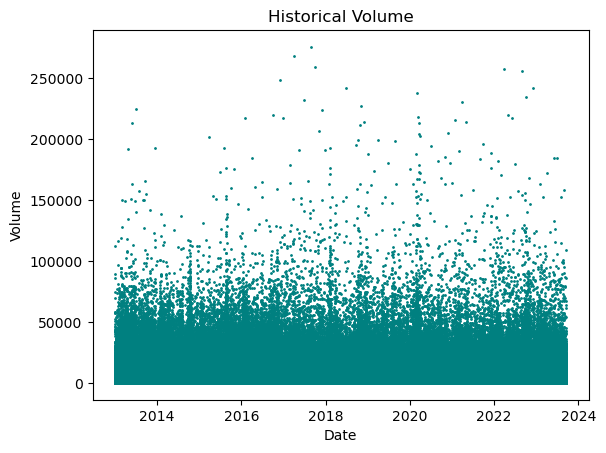

In [145]:
#plotting historical volume
plt.scatter(data['date'], data['volume'], s = 1, c = 'teal')
plt.title('Historical Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

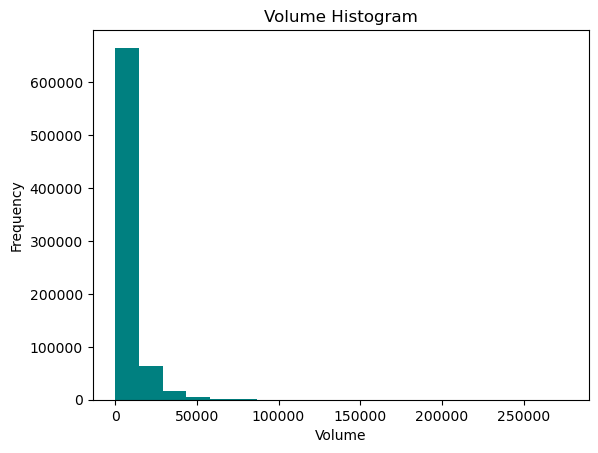

In [146]:
#plotting histogram of volume
plt.hist(data['volume'], bins = np.linspace(data['volume'].min(), data['volume'].max(),20),  color = 'teal')
plt.title('Volume Histogram')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

### ----------------------------------------------------------------------------------------------------------------------------------------------------------
# Data Stationarity
### ----------------------------------------------------------------------------------------------------------------------------------------------------------

As the data contains stock prices which have historically trended upwards we would anticipate the data to be non-stationary. There are 4 different price levels (open, high, low, close) included in our data, however for stationarity we will use close as a proxy for all price levels as they would all have a similar nature (trends/seasonality). When we plotted the price history previously we can see that there is a clear trend. 

For further confirmation we will use the Augmented Dickey-Fuller test (ADF). This test is used to determine how strongly a time series is defined by a trend. For this test our null hypothesis (H0) = time series is non-stationary. Our alternative hypothesis (H1) = time series is stationary. We will use a p-value threshold of 0.05, that is if the p-value < 0.05 we will reject the H0 and accept H1.

As we can see from the test below the p-value > 0.05 and as such H0 is accepted, and the data is non-stationary. As such the price will need to be transformed to be stationary. The following methods will be looked into:
- Differencing - Taking the difference between the current instance and the prior instances price
- Trend residuals - Fitting a linear regression to the price and calculating the residuals of each price from that trend line
- Log return - Calculating the log return of each instance over its prior instance

In [6]:
#defining function to provide adfuller summary
from statsmodels.tsa.stattools import adfuller

def adfuller_summary(data_feature):
    adf = adfuller(data_feature)
    print('ADF Statistic: %f' % adf[0])
    print('p-value: %f' % adf[1])
    print('Critical Values:')
    for key, value in adf[4].items():
        print('\t%s: %.3f' % (key, value))

In [189]:
adfuller_summary(data['close'])

ADF Statistic: -0.804362
p-value: 0.817837
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


### Differencing

The first method to adjust data stationary is differencing. To difference the data, we will take the current bars close less the prior bars close. 

When we plot the history of these differences we can see that data looks significantly more stationary then before. The mean appears to be around $0 and fluctuates both evenly above and below the mean. The data doesn't appear to have any significant trends. The only notable observation is that we can see the variance in the data increases after 2020, which is expected due to the market during and post COVID being extremely volatile. 

When we look at the ADF test we can see that the p-value < 0.05 so we can accept H1 and conclude the data appears stationary under this method. 

In [9]:
#differencing the data from the prior bar
data['close_diff'] = data['close'] - data['close'].shift(1)

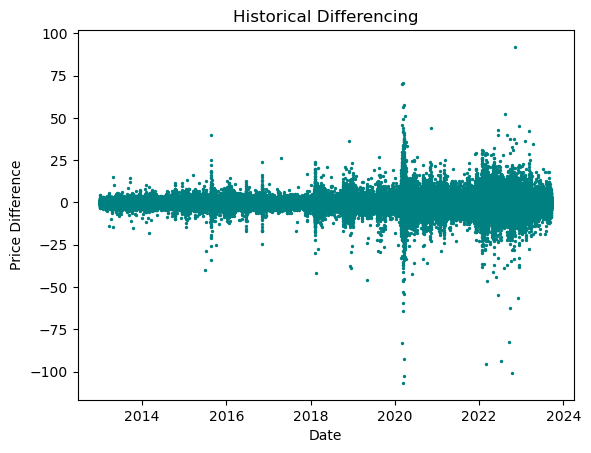

In [147]:
#plotting the differencing to see if it appears stationary
plt.scatter(data['date'], data['close_diff'], s = 2 , c = 'teal')
plt.title('Historical Differencing')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.show()

In [190]:
#calculating the Augmented Dickey-Fuller test (ADF) for differencing
adfuller_summary(data['close_diff'].dropna())

ADF Statistic: -83.595626
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


### Linear Trend Line Residuals

In this approach we will fit a linear regression model to the price data. From here we will use the residuals from each bars close to the linear trend line in an attempt to make the data stationary.

As we can see from the chart below, the residuals still contain an uptrend starting in 2020 and a downtrend starting in 2022. This is a indication that this method may not have worked as hoped.

However, when we look at the ADF test we can see that the p-value < 0.05 stating that the data appears stationary which is surprising given how the chart looks.

In [132]:
#Differencing from the residuals from a linear trend line.

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(np.array(data.index).reshape(-1,1), np.array(data['close']).reshape(-1,1))

y_pred = lin_reg.predict(np.array(data.index).reshape(-1,1))

data['trend_residuals'] = data['close'] - y_pred.flatten()

Text(0, 0.5, 'Price')

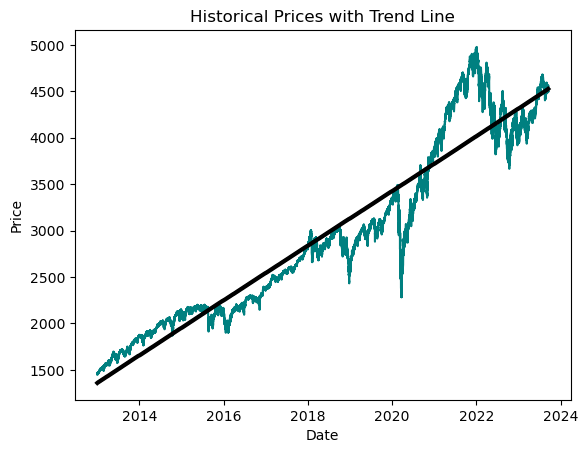

In [148]:
#plotting the price history with the linear trend line
plt.plot(data['date'], data['close'] ,c = 'teal')
plt.plot(data['date'], y_pred.flatten(), color = 'black', linewidth = 3)
plt.title('Historical Prices with Trend Line')
plt.xlabel('Date')
plt.ylabel('Price')

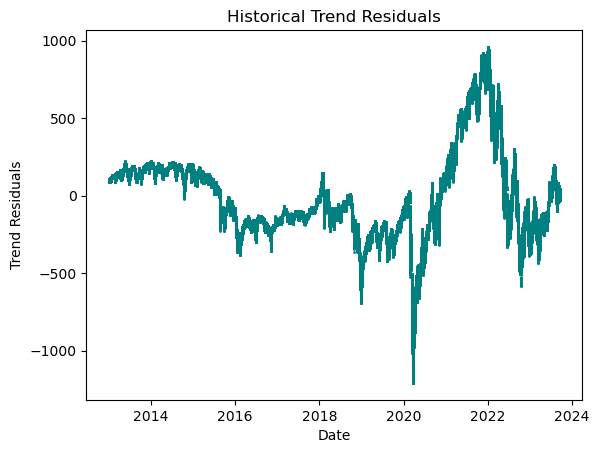

In [149]:
#plotting the trend residuals to see if it appears stationary
plt.scatter(data['date'], data['trend_residuals'], s = 1,  c = 'teal')
plt.title('Historical Trend Residuals')
plt.xlabel('Date')
plt.ylabel('Trend Residuals')
plt.show()

In [194]:
#calculating the Augmented Dickey-Fuller test (ADF) for the trend residuals
adfuller_summary(data['trend_residuals'].dropna())

ADF Statistic: -2.925550
p-value: 0.042457
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


### Log Returns

The last approach for data stationarity is to look at log returns. Log returns are a commonly used metric when looking at algorithmic trading. The log returns are the log of the current bars price over the prior bars.

When the log returns are plotted we can see that the data looks similar to the differencing chart, and as such appears fairly stationary. The mean appears to be $0 and the price fluctuates consistently both above and below the mean. We can also notice that unlike in the differencing, the increase in variance in price after 2020 isn't nearly as noticeable.

The ADF test also returns a p-value < 0.05 so we can accept H1 and conclude the data appears stationary under this method.

In [10]:
#calculating the log return
data['log_return'] = np.log(data['close'] / data['close'].shift(1))

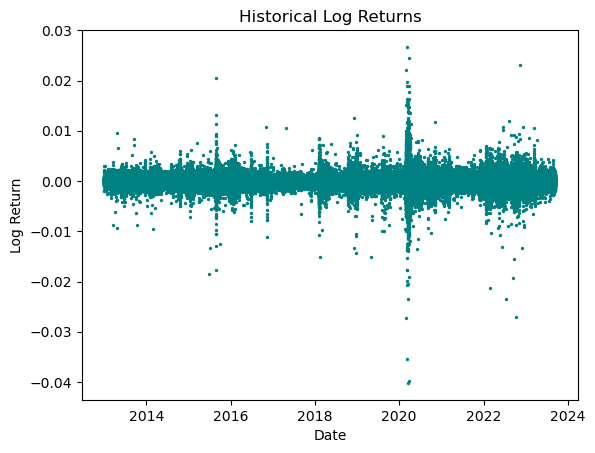

In [150]:
#plotting the historical log returns
plt.scatter(data['date'], data['log_return'], s = 2,  c = 'teal')
plt.title('Historical Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.show()

In [7]:
#calculating the Augmented Dickey-Fuller test (ADF) for the log returns
adfuller_summary(data['log_return'].dropna())

ADF Statistic: -82.138769
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


### Conclusion/Adjustments

From the different approaches above, the following conclusions were made and will be implemented:
- We will use the differencing (close_diff) as the primary feature. This is used as both the chart and the ADF test appear to be stationary, as well as it maintaining a lower level of complexity. It is easier to interpret this as we start transforming the data. We will be able to maintain a clearer understanding of what each feature is then if we used either of the other approaches.
- Log returns will be maintained as a feature as it again appears stationary in both the chart and the ADF test. This won't be used for any feature creation though. 
- Lastly, the trend residuals will be dropped altogether. Even though the ADF test appears good, the chart appears fairly questionable so this will be dropped to be safe.

When features are created later in the project, stationarity will be kept in mind. In certain situations, it may be applicable to use the non-stationary close price when creating features where as others it will have to use the adjusted close difference (close_diff).

In [151]:
#dropping trend_residuals calculation. 
data = data.drop('trend_residuals', axis = 1)

### Open, High, Low Stationarity

The open, high and low will also be non-stationary and need to be adjusted as well. As these features include important information about each bar (Ex. how high did it get relative to its close) we will want to maintain it where possible. To transform these features, we can calculate the difference between them and their same bars close. This captures the interrelationships in the bar to their closing values. We will then take this value and add it onto the now stationary close_diff (as calculated above). After this is done these features will be stationary and will maintain some of the information initially present in the bars.

Per the below charts and ADF tests (all p-value < 0.05) for each the open, high and low, each transformation appears to be stationary and we can continue with these transformations. 

In [11]:
#calculating open, high, low differenced
data['open_diff'] = data['open']-data['close'] + data['close_diff']
data['high_diff'] = data['high']-data['close'] + data['close_diff']
data['low_diff'] = data['low']-data['close'] + data['close_diff']

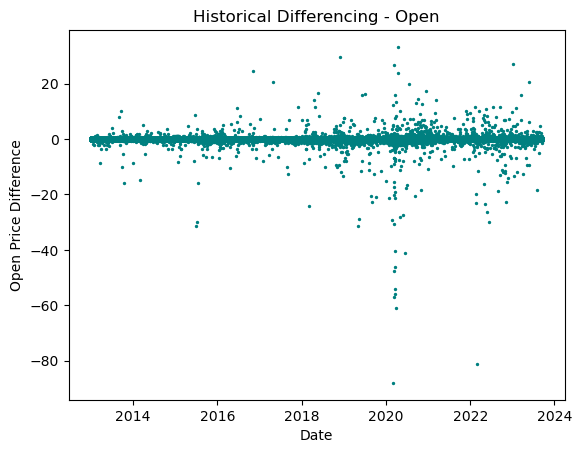

In [140]:
#plotting historical open differenced
plt.scatter(data['date'], data['open_diff'], s = 2, c = 'teal')
plt.title('Historical Differencing - Open')
plt.xlabel('Date')
plt.ylabel('Open Price Difference')
plt.show()

In [197]:
#calculating the Augmented Dickey-Fuller test (ADF) for the open_diff
adfuller_summary(data['open_diff'].dropna())

ADF Statistic: -91.288665
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


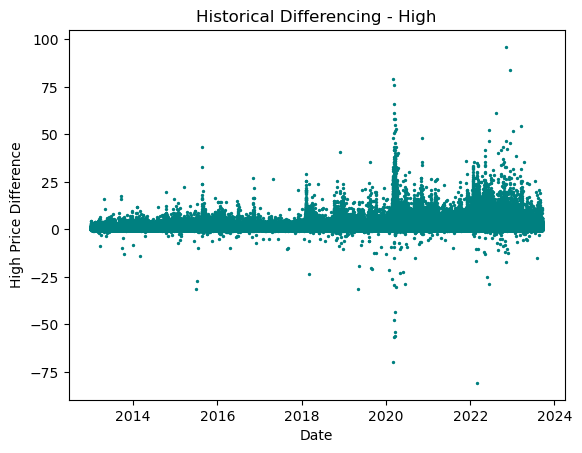

In [152]:
#plotting historical high differenced
plt.scatter(data['date'], data['high_diff'], c = 'teal', s = 2)
plt.title('Historical Differencing - High')
plt.xlabel('Date')
plt.ylabel('High Price Difference')
plt.show
plt.show()

In [196]:
#calculating the Augmented Dickey-Fuller test (ADF) for the high_diff
adfuller_summary(data['high_diff'].dropna())

ADF Statistic: -45.357520
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


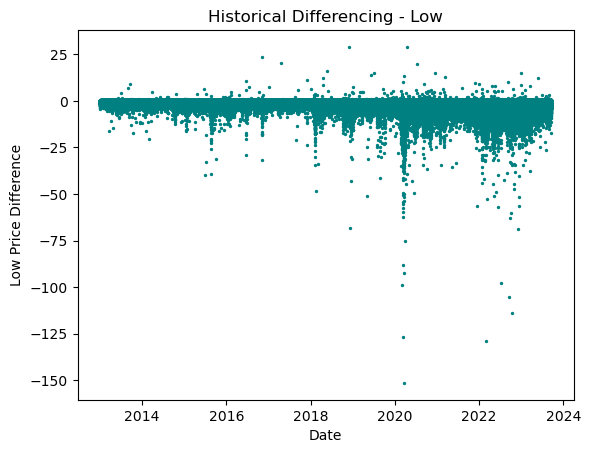

In [153]:
#plotting historical low differenced
plt.scatter(data['date'], data['low_diff'], s = 2 , c = 'teal')
plt.title('Historical Differencing - Low')
plt.xlabel('Date')
plt.ylabel('Low Price Difference')
plt.show()

In [198]:
#calculating the Augmented Dickey-Fuller test (ADF) for the low_diff
adfuller_summary(data['low_diff'].dropna())

ADF Statistic: -46.752747
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


### Key Statistics - Updated

Lets revist the key statistics now that the data is stationary.
- The close, open, and log return all have means around 0 showing the stationarity adjustments worked.
- We can see that on the close there is a larger max decrease (106) then there is a max increase (92). Given the nature of the stock market this isn't to surprising. Generally, stocks take longer to climb up then they do to fall down - the downward moves are more volatile. This same relationship is seen in the log return.
- The high mean is above 0. This would be expected as this was adjusted to maintain its relationship with the closing price. As such we would expect it to be higher than the closing means. Vice versa also true for the low.

In [29]:
#running key stats over our differenced columns 
data[['close_diff','open_diff','high_diff','low_diff','log_return',]].describe()

,close_diff,open_diff,high_diff,low_diff,log_return
count,753727.000000,753727.000000,753727.000000,753727.000000,753727.000000
mean,0.004042,0.001646,1.050518,-1.060006,0.000001
std,2.014571,0.361686,1.706817,1.769072,0.000638
min,-106.750000,-88.000000,-80.750000,-151.500000,-0.040183
25%,-0.500000,0.000000,0.250000,-1.250000,-0.000183
50%,0.000000,0.000000,0.500000,-0.500000,0.000000
75%,0.500000,0.000000,1.250000,-0.250000,0.000199
max,92.000000,33.250000,96.000000,29.000000,0.026691


### Volume Stationarity

Our initial data doesn't just include price data, it also includes the volume. When plotting the volume it is apparent that no trends appear to exist and at first glance the data looks stationary. To confirm this, the ADF test also returns a p-value < 0.05 so we can accept H1 and conclude the data appears stationary and no transformations are necessary.

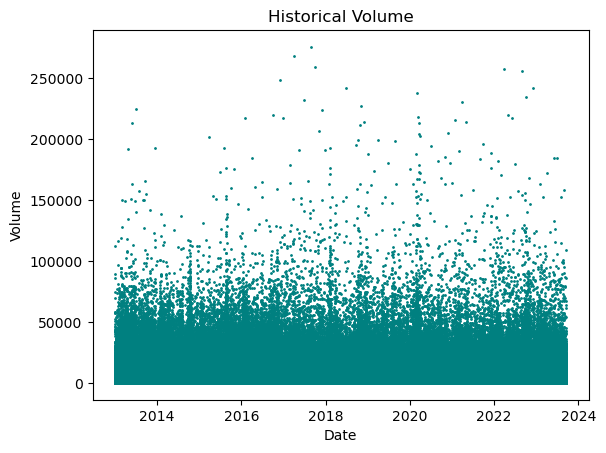

In [154]:
#plotting historical volume
plt.scatter(data['date'], data['volume'], s = 1, c = 'teal')
plt.title('Historical Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

In [199]:
#calculating the Augmented Dickey-Fuller test (ADF) for volume
result = adfuller( data['volume'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -107.013607
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


### ----------------------------------------------------------------------------------------------------------------------------------------------------------
# Outliers
### ----------------------------------------------------------------------------------------------------------------------------------------------------------

Let’s now take a look to see if there are any outliers in the data. Below calculates the inter quartile range (IQR) and plots boxplots for each of the close_diff, log_return and volume. We can see each one has a considerable amount of outliers, as the box of each plot is quiet small and there is a large number of outliers that are significantly beyond it. This isn't particularly surprising given our data set includes the after hours market as well (these will be filtered out later). The combination of after hours markets and the lower volatility hours in the middle of the day (explored later on as well) results in the majority of the bars in our data set being lower volatility and as such have a small body on the boxplot. 

The outliers identified below likely aren't all outliers that should be removed as many of them are just usual high volatility bars around the opening and closing hours of the market (this is also explored later on). If we remove all the outliers outside the IQR (25% - 75%) we will only be left with ~40% of our original data so it is not a good approach. Below calculates any outliers in the top and bottom 2.5% quantiles. This retains ~95% of the data which is significantly better, as such this approach will be used.

After these outliers are removed the boxplots look better. There are still outliers but this is expected as noted above, this was just done to get rid of any extreme outliers as many of them are relatively standard samples but just appear as an outlier. The outliers will be removed later on during the final data cleaning and filtering. Removing these samples is the appropriate treatment as we can conclude that they are likely samples under different market conditions of high volatility (Ex. news).

In [12]:
#calculating % of data remaining if all close_diff outside IQR (25% - 75%) is removed
lower_quantile = data['close_diff'].quantile(0.25)
upper_quantile = data['close_diff'].quantile(0.75)
len(data.loc[(data['close_diff'] < upper_quantile) & (data['close_diff'] > lower_quantile)]) / len(data)

0.39447121508024113

In [13]:
#calculating % of data remaining if all volume outside IQR (25% - 75%) is removed
lower_quantile = data['volume'].quantile(0.25)
upper_quantile = data['volume'].quantile(0.75)
len(data.loc[(data['volume'] < upper_quantile) & (data['volume'] > lower_quantile)]) / len(data)

0.49968821643882144

In [14]:
#calculating % of data remaining if all log_return outside IQR (25% - 75%) is removed
lower_quantile = data['log_return'].quantile(0.25)
upper_quantile = data['log_return'].quantile(0.75)
len(data.loc[(data['log_return'] < upper_quantile) & (data['log_return'] > lower_quantile)]) / len(data)

0.49998407913730153

In [3]:
#defining function to filter outliers. this function will filter outliers from multiple features.
def filter_outliers(df, features):
    filtered_data = df.copy()
    for feature in features:
        lower_quantile = df[feature].quantile(0.025)
        upper_quantile = df[feature].quantile(0.975)
        
        filtered_data = filtered_data.loc[(filtered_data[feature] > lower_quantile) & (filtered_data[feature] < upper_quantile)]
        
    return filtered_data

In [887]:
#calculating % of data remaining for 2.5% and 97.5% quantiles
lower_quantile = data['close_diff'].quantile(0.025)
upper_quantile = data['close_diff'].quantile(0.975)
len(data.loc[(data['close_diff'] < upper_quantile) & (data['close_diff'] > lower_quantile)]) / len(data)

0.9462365734057909

### Outliers: close_diff

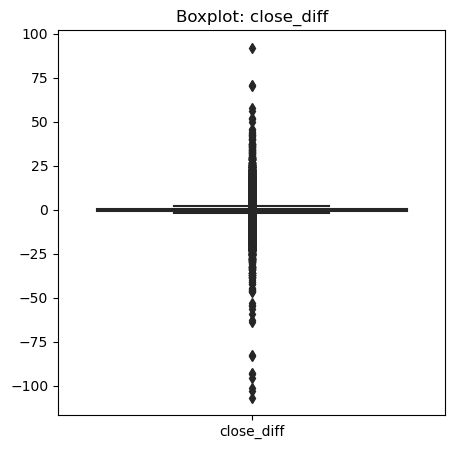

In [158]:
#plotting boxplot for close_diff
import seaborn as sns
fig = plt.figure(figsize=(5,5))
sns.boxplot(data[['close_diff']], color = 'teal')
plt.title('Boxplot: close_diff')
plt.show()

In [17]:
#calculating upper and lower quantiles as well as the length of the data after any data outside those quantiles are removed
lower_quantile = data['close_diff'].quantile(0.025)
upper_quantile = data['close_diff'].quantile(0.975)
len(data.loc[(data['close_diff'] < upper_quantile) & (data['close_diff'] > lower_quantile)]) / len(data)

0.9462365734057909

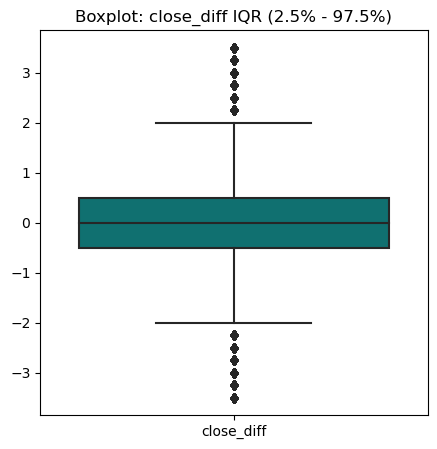

In [159]:
#plotting boxplot for close_diff after the IQR adjustments above
fig = plt.figure(figsize=(5,5))
sns.boxplot(filter_outliers(data,['close_diff'])[['close_diff']], color = 'teal')
plt.title('Boxplot: close_diff IQR (2.5% - 97.5%)')
plt.show()

### Outliers: log_return

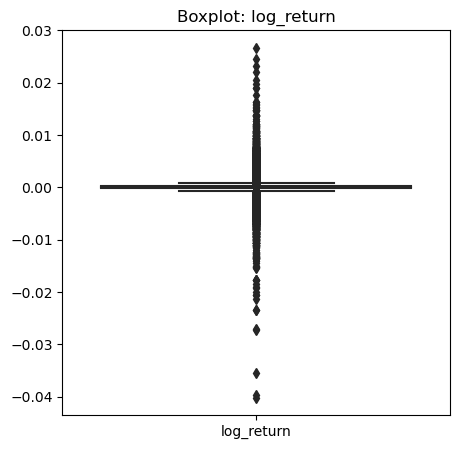

In [160]:
#plotting boxplot for log_return
import seaborn as sns
fig = plt.figure(figsize=(5,5))
sns.boxplot(data[['log_return']], color = 'teal')
plt.title('Boxplot: log_return')
plt.show()

In [20]:
#calculating upper and lower quantiles as well as the length of the data after any data outside those quantiles are removed
lower_quantile = data['log_return'].quantile(0.025)
upper_quantile = data['log_return'].quantile(0.975)
len(data.loc[(data['log_return'] < upper_quantile) & (data['log_return'] > lower_quantile)]) / len(data)

0.9499965504797486

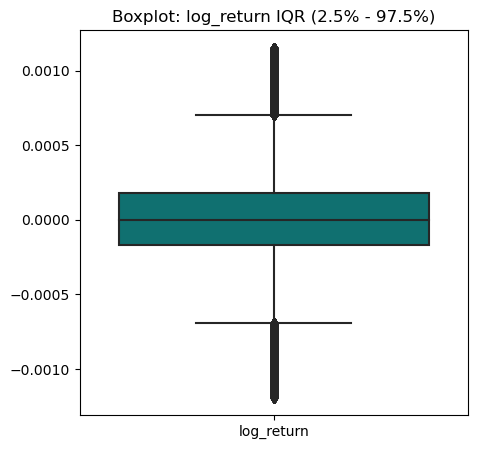

In [161]:
#plotting boxplot for log_return after the IQR adjustments above
import seaborn as sns
fig = plt.figure(figsize=(5,5))
sns.boxplot(filter_outliers(data,['log_return'])[['log_return']], color = 'teal')
plt.title('Boxplot: log_return IQR (2.5% - 97.5%)')
plt.show()

### Outliers: volume

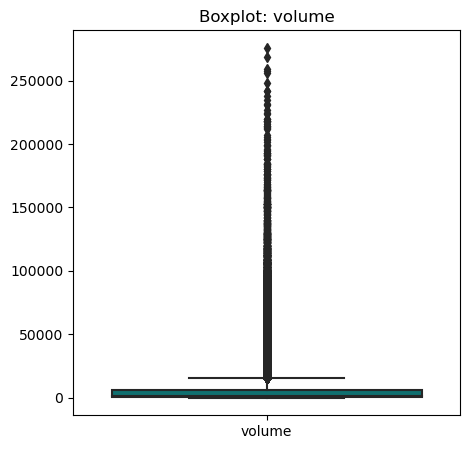

In [162]:
#plotting boxplot for volume
import seaborn as sns
fig = plt.figure(figsize=(5,5))
sns.boxplot(data[['volume']], color = 'teal')
plt.title('Boxplot: volume')
plt.show()

In [23]:
#calculating upper and lower quantiles as well as the length of the data after any data outside those quantiles are removed
lower_quantile = data['volume'].quantile(0.025)
upper_quantile = data['volume'].quantile(0.975)
len(data.loc[(data['volume'] < upper_quantile) & (data['volume'] > lower_quantile)]) / len(data)

0.9495945486966121

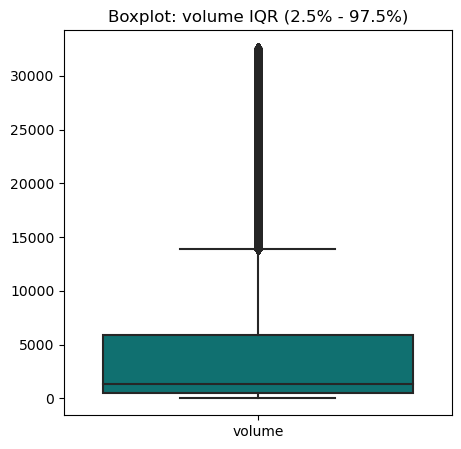

In [157]:
#plotting boxplot for volume after the IQR adjustments above
import seaborn as sns
fig = plt.figure(figsize=(5,5))
sns.boxplot(filter_outliers(data,['volume'])[['volume']], color = 'teal')
plt.title('Boxplot: volume IQR (2.5% - 97.5%)')
plt.show()

### ----------------------------------------------------------------------------------------------------------------------------------------------------------
# Target Feature
### ----------------------------------------------------------------------------------------------------------------------------------------------------------

Now that the data is stationary, we need to determine what our target feature is. As we are trying to predict the future price in the stock market we will use a target based around forward looking price. A variety of targets were looked into (see below) before choosing the final one, including both numerical and categorical targets. After experimentation categorical targets worked the best. 

The target used will be the next direction of the market/instrument. This is calculated based off of the close price. If the next bars close is higher than the current bars, the target would be labeled as 1 or upwards. If the next bar closes lower, then it would be labeled as -1 or downwards. If the next bar has no change in close price, rather than labeling it as no change instead we look at the bar after and so on until one of them has a change up or down. So ultimately the target doesn't care about if it is sideways for a bar or so, it only cares about if it ends up going up or down eventually as that's what will determine if a trade is profitable.

Other targets experimented with:
- Price - Using price as the target (predicting a numerical value)
- Direction of next bar - This calculates the direction of the close over the next bar. This is similar to above except it includes 0 for anytime the bars don't change in price. 
- Next direction with thresholds - Same as the target used but now including thresholds. This would label transactions as up/down if the price change between bars was above/below a certain threshold. Anything in between them would be labeled as sideways. The thought here was we only care about the larger moves, so anything smaller we aren't as interested in and would label as 0. 
- Simple moving average - Calculates the simple moving average of the next 3 bars. If this moving average closed above our current close then it would label it as upwards, and vice versa for downwards. This was also experimented with thresholds like above. The rational here was we to try and determine the short term trend going forward.
- Slope of a linear regression line - Calculates the slope of a linear regression line for the periods after the bar (forward looking). These were then binned into similar groups as above (up/down/sideways). This was done to try and quantify a trend line. This also experimented with thresholds like above.
- Strategy win/loss - This used a basic day trading strategy to determine if each a trade taken on each bar would win or lose based on a defined target and stop loss. 

In [28]:
#creating target feature
data.loc[(data['close'].shift(-1) > data['close']), 'target_direction'] = 1
data.loc[(data['close'].shift(-1) < data['close']), 'target_direction'] = -1
data['target_direction'] = data['target_direction'].bfill()

In [29]:
#looking at value counts
data['target_direction'].value_counts()

 1.0    382452
-1.0    371275
Name: target_direction, dtype: int64

### ----------------------------------------------------------------------------------------------------------------------------------------------------------
# Feature Creation
### ----------------------------------------------------------------------------------------------------------------------------------------------------------


Various features are created in this section to attempt to increase the predictive accuracy of the machine learning models. Each feature considered stationarity to ensure there was no trends evident in the final result. Due to the calculations of these features, certain features can utilize the non-stationary 'close' price and be stationary after. However, other features had to use the 'close_diff' price to be stationary. 

As many of these features includes additional parameters, Ex. periods of a moving average, they were investigated to determine the optimal parameters. This was done by exploring possible parameter combinations and comparing the final result with a correlation to our target feature. The parameters that provided the biggest increase in correlation were used. Note that if a parameter changed from 3 to 2 and had a trivial increase in correlation, the previous parameter (3) was used. Below defines the functions used to calculate this. When exploring these parameters, they were typically explored for values of 2, 3, 4, 6, and 10. This gave a good range of values with higher focus on the short term. This was done as our target is also relatively short term.

When calculating the correlation, we only include regular trading hours (9 - 16 or 9am to 4PM) as this is when most of the volume and action is in the day. Outside these hours the market moves slow with smaller movements and as such could confuse the model. Any outliers were also dropped as per the function defined earlier. This is done as these filters will be applied to the data that goes into training the model, so when assessing each features ideal parameters, we will want to evaluate it over the same filtered data.

In [4]:
#defining function to filter for outliers and regular trading hours
def filter_outliers_rth(df, outlier_features):
    filtered_data = df.loc[(df['date'].dt.hour >= 9) & (df['date'].dt.hour < 16)]
    return filter_outliers(filtered_data, outlier_features)

In [5]:
#defining a function to calculate a features correlation with the target. this allows multiple features parameters to be tested.
def feature_correlation(df, feature_func, periods_grid):
    for periods in periods_grid:
        #calculating feature based on paramater
        df['feature'] = feature_func(df, periods)
        #filtering outliers and regular trading hours
        filtered_df = filter_outliers_rth(df, ['close_diff','log_return','volume'])
        #calculating and outputting correlation
        print(periods, ':', filtered_df.corrwith(filtered_df["target_direction"])['feature'])

### Bar Direction

This features picks up the direction of the current bar. Did it close higher (1), lower (-1) or the same (0) as the previous bar. As we can see most of the bars are either up or down, with fewer sideways.

In [32]:
#adding in a column showing the direction of the current bar up = 1, flat = 0, down = -1
data.loc[(data['close_diff'] > 0), 'bar_direction'] = 1
data.loc[(data['close_diff'] < 0), 'bar_direction'] = -1
data.loc[(data['close_diff'] == 0), 'bar_direction'] = 0

#showing value counts for bar direction
data['bar_direction'].value_counts()

 1.0    324378
-1.0    314433
 0.0    114916
Name: bar_direction, dtype: int64

### Bar Range

This feature calculates the total range of the bar. This is the difference between the high and low in each bar. This may be a useful metric of volatility in the market. The larger the bar range, the greater volatility and movement that occurred during that bar. We can see this helps capture the volatility in the market that occurred in 2020 and after by showing an increase in the range during that period.

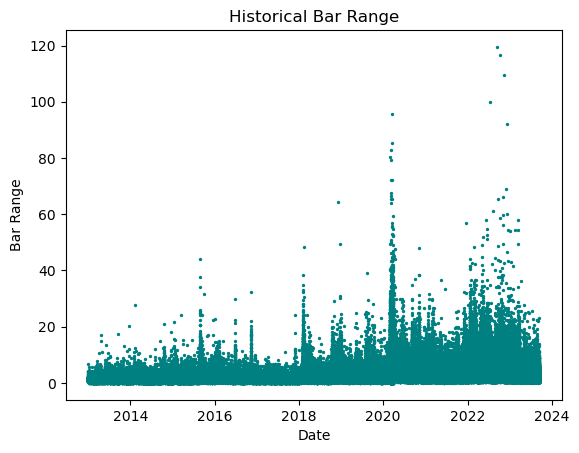

In [155]:
#adding in a column for the total range of prices in the day
data['bar_range'] = data['high'] - data['low']

#plotting historical bar ranges
plt.scatter(data['date'], data['bar_range'], s = 2, c = 'teal')
plt.title('Historical Bar Range')
plt.xlabel('Date')
plt.ylabel('Bar Range')
plt.show()

### Bar Strength & Bar Type

This is an expansion off of the bar range. Bar strength is meant to capture the relative bullish (upward looking) or bearish (downward looking) nature of the bar. This calculates where the bar closed amongst the bar range. Ex. it shows that if a bar finished at its high it closed 100% bullish and if it finished at its low it closed -100% bearish. This is meant to provide some nature on the overall movement within the bar in the belief that this movement will predict future movement.

Bar type takes this one steps further by categorizing it rather than showing it as a numerical figure. This is done by stating that any bar that finishes in the top 90% is bullish or 1, anything in the bottom 10% is bearish or -1, and anything in between is neutral or 0. These thresholds are added to account for the general noise in the market. If a bar closes slightly above the middle it isn't necessarily a strong bullish bar but rather just a bit of noise in the market. 

Below we can see that the bar_strength is multimodal with a significant amount of values at 1,0 and -1. This signals to us that it is not uncommon for the bars to be 100% bearish or bullish. After the transformation to bar type, we can see it is primarily neutral bars (0) which is expected given the thresholds used are so high.  

In [34]:
#calculating bar strength
data['bar_strength'] = ((data['close'] - data['low']) / data['bar_range'] - 0.5) * 2
data.loc[data['high'] == data['low'],'bar_strength'] = 0 #bars that stayed at a constant price (no change) are set to a 0 strength.

#calculating bar type
threshold = .8
data.loc[(data['bar_strength'] > threshold, 'bar_type')] = 1
data.loc[(data['bar_strength'] < - threshold, 'bar_type')] = -1
data.loc[(data['bar_strength'] >= - threshold) & (data['bar_strength'] <= threshold) , 'bar_type'] = 0

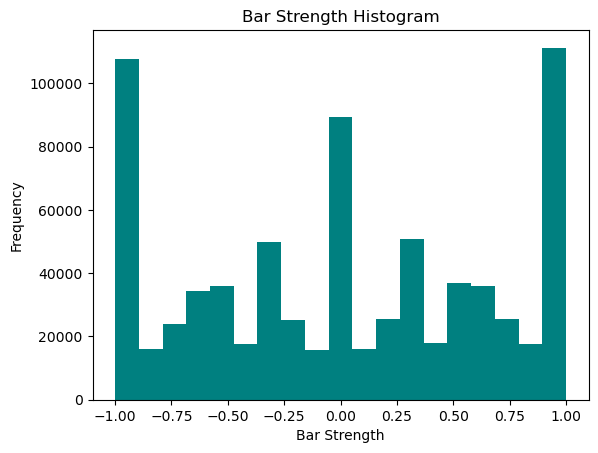

In [163]:
#plotting histogram of bar strength. we can see that it is multimodal
plt.hist(data['bar_strength'], bins = np.linspace(data['bar_strength'].min(), data['bar_strength'].max(),20), color = 'teal')
plt.title('Bar Strength Histogram')
plt.xlabel('Bar Strength')
plt.ylabel('Frequency')
plt.show()

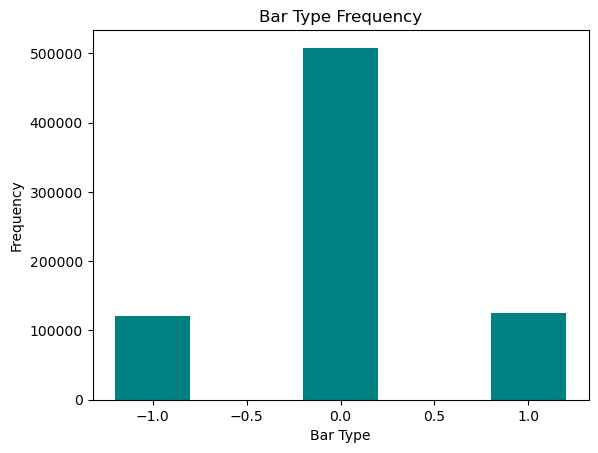

In [164]:
#plotting bar chat of bar type
plt.bar(data['bar_type'].value_counts().index, data['bar_type'].value_counts(),  width = 0.4, color = 'teal')
plt.title('Bar Type Frequency')
plt.xlabel('Bar Type')
plt.ylabel('Frequency')
plt.show()

### Inside bar

An inside bar is a bar which neither the high nor the low, go above the high or low on the previous bar. That is in simplest terms, the current bar is completely inside the previous bar. To aid with this I added a plot showing an example of an inside bar. The last bar (on the right) would represent an inside bar. 

These bars are useful to know as they are a sign of congestion or indecision in the market. 

We can see there is a significant amount of inside bars from the value counts, almost 1 in every 3 is. However, if we look at the value counts during regular trading hours the number goes down significant, around 1 in every 5. 

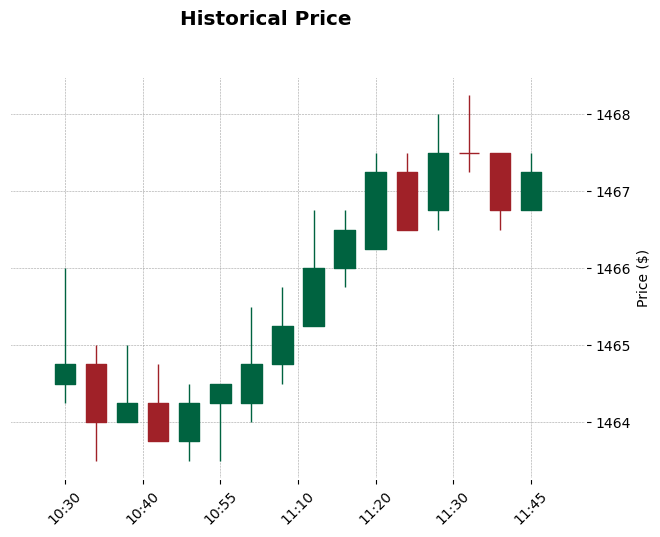

In [37]:
#plotting an example of an inside bar
import mplfinance as fplt

fplt.plot(
            data.set_index('date').drop('volume', axis = 1)[330:346],
            type='candle',
            style='charles',
            title='Historical Price',
            ylabel='Price ($)',
            )

In [38]:
#adding in a column for an insider bar. this is when a bar both does not go higher or lower than the previous bar. 
data.loc[ (data.loc[:,'high'] <= data.shift(1).loc[:,'high']) 
         & (data.loc[:,'low'] >= data.shift(1).loc[:,'low']), 'inside_bar' ] = 1
data['inside_bar'] = data['inside_bar'].fillna(0)

#looking at value counts
data['inside_bar'].value_counts()

0.0    537885
1.0    215843
Name: inside_bar, dtype: int64

In [39]:
#looking at value counts during market hours - significantly less inside bars
data.loc[(data['date'].dt.hour >= 9) & (data['date'].dt.hour < 16)]['inside_bar'].value_counts()

0.0    181789
1.0     46937
Name: inside_bar, dtype: int64

### Engulfing Bars

Engulfing bars are the opposite of inside bars. They are where the current bars high and low completely cover/engulf the prior bar. These are a sign of increased volatility in the market and presence of directional bias or a larger movement to come. To make this more useful I combined the engulfing bars with bar type to add bullish/bearish direction to it. So now it will be an engulfing bar categorized into bullish or bearish.

An example of this type of bar is shown below. The bar on the furthest right is an example of a bullish engulfing bar.

As expected the value counts of the engulfing bars are low as most bars are not engulfing bars.

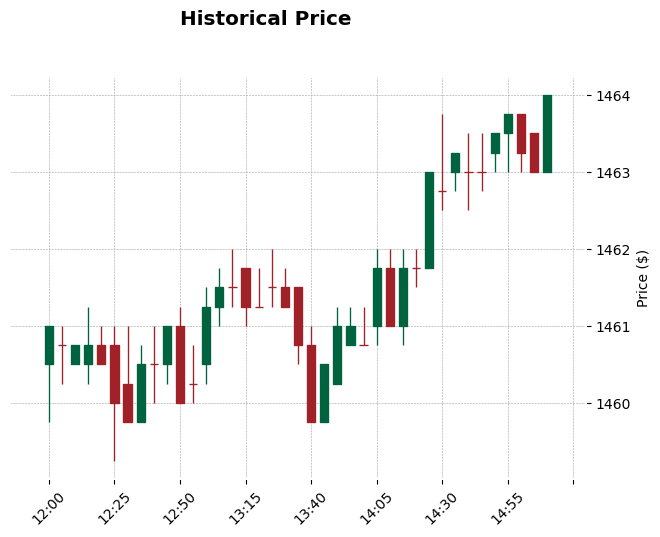

In [40]:
#plotting an example of an engulfing bar
import mplfinance as fplt

fplt.plot(
            data.set_index('date').drop('volume', axis = 1)[900:939],
            type='candle',
            style='charles',
            title='Historical Price',
            ylabel='Price ($)',
            )

In [41]:
#add engulfing bar for both bullish and bearish.
data.loc[(data['high'] > data['high'].shift(1)) 
         & (data['low'] < data['low'].shift(1)) 
         & (data['bar_type'] == 1), 'engulfing_bullish'] = 1

data.loc[(data['high'] > data['high'].shift(1)) 
         & (data['low'] < data['low'].shift(1)) 
          & (data['bar_type'] == -1), 'engulfing_bearish'] = 1

data['engulfing_bullish'] = data['engulfing_bullish'].fillna(0)
data['engulfing_bearish'] = data['engulfing_bearish'].fillna(0)


#displaying value counts. As we can see these aren't extremely common which is to be expected.
display(data['engulfing_bullish'].value_counts())
display(data['engulfing_bearish'].value_counts())

0.0    747895
1.0      5833
Name: engulfing_bullish, dtype: int64

0.0    748208
1.0      5520
Name: engulfing_bearish, dtype: int64

### Number of Consecutive Green/Red Bars

A quick way to identify a trend is the number of consecutive green or red bars. The more consecutive bars in a row in the same direction the stronger the trend appears. Below calculates the number of consecutive green and red bars.

Looking at the bar chart we can see that 0 is by far the most common amount of green consecutive bars. 0 is the most common as 0 green bars in a row would mean that the bar was red, and there is a significant amount of red bars. We can also see as the number of consecutive bars increases, the frequency drops significantly. This would be expected as it becomes increasingly more unlikely each time.

In [42]:
#adding in a feature counting the consecutive green bars previous to and including it
#note that the first few instances will be wrong as we won’t have the data prior to it, 
#however certain features will be added later which will result in these rows being dropped anyways.
#this behavior will continue through multiple of the features created later so I won't mention it again.
output_list = []
counter = 0

for row in data.itertuples():
    try:
        if row[data.columns.get_loc('bar_direction')+1] == 1:
            counter += 1
        if row[data.columns.get_loc('bar_direction')+1] != 1:
            counter = 0
    except:
        pass
    output_list.append(counter)

data['consecutive_green'] = output_list
del(output_list)

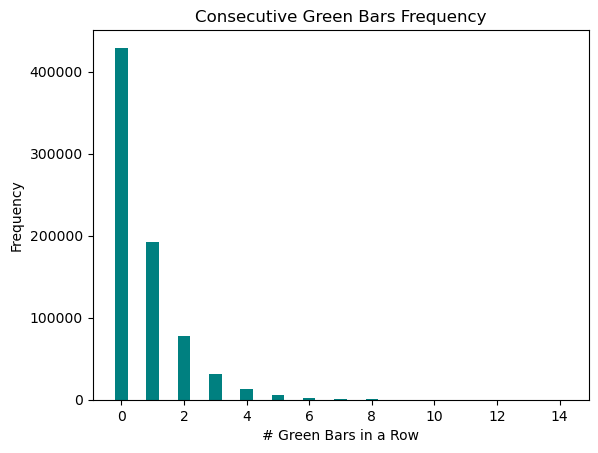

In [165]:
#plotting green bar frequency
plt.bar(data['consecutive_green'].value_counts().index, data['consecutive_green'].value_counts(),  width = 0.4, color = 'teal')
plt.title('Consecutive Green Bars Frequency')
plt.xlabel('# Green Bars in a Row')
plt.ylabel('Frequency')
plt.show()

In [44]:
#adding in a feature counting the consecutive red bars previous to it and including it
output_list = []
counter = 0

for row in data.itertuples():
    try:
        if row[data.columns.get_loc('bar_direction')+1] == -1:
            counter += 1
        if row[data.columns.get_loc('bar_direction')+1] != -1:
            counter = 0
    except:
        pass
    output_list.append(counter)

data['consecutive_red'] = output_list
del(output_list)

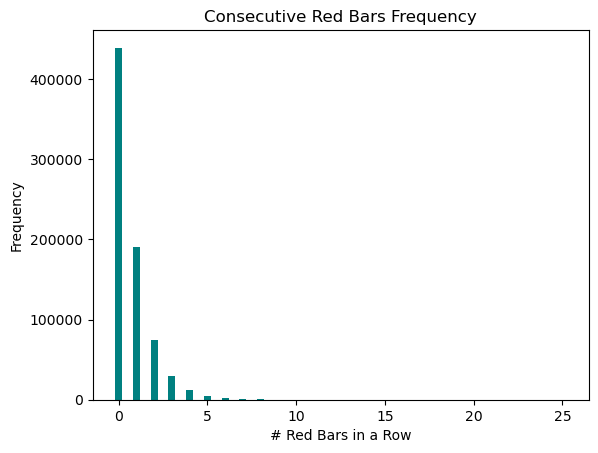

In [166]:
##plotting red bar frequency
plt.bar(data['consecutive_red'].value_counts().index, data['consecutive_red'].value_counts(),  width = 0.4, color = 'teal')
plt.title('Consecutive Red Bars Frequency')
plt.xlabel('# Red Bars in a Row')
plt.ylabel('Frequency')
plt.show()

### Number of Green/Red Bars in Last 4

Building off above (consecutive green/red bars) we will now look at the number of green or red bars in the last 4. This will count for the variation in direction from bar to bar, 1 red bar in an otherwise bullish trend will not get rid of that bullish nature. Hopefully do a better job of capturing a more general trend. 

Looking at the below bar charts we can see this looks significantly better distributed than the consecutive bars shown in last section. This appears to be normally distributed so this looks promising.

In [46]:
#defining function to calculate the number of green bars over the last x periods
def green_bars_last_x(df, periods):
    counter = 0
    bar_list = np.zeros(periods) 
    output_list = [] 

    for row in df.itertuples():
        if row[df.columns.get_loc('bar_direction')+1] == 1:
            bar_list[-1] = 1
            output_list.append(np.sum(bar_list))
        if row[df.columns.get_loc('bar_direction')+1] != 1:
            bar_list[-1] = 0
            output_list.append(np.sum(bar_list))
        bar_list = np.roll(bar_list,-1)

    return output_list

In [32]:
#calculating the correlation over various different periods.
#4 appears to be a good number. 3 does perform better but the increase in correlation is small so 4 seems to be a more appropriate spot.
feature_correlation(data, green_bars_last_x, [3,4,6,8,10])

#dropping unneeded correlation feature
data = data.drop('feature', axis = 1)

3 : -0.038465239756839575
4 : -0.036571534813392585
6 : -0.03246327272444131
8 : -0.03000051911071901
10 : -0.027765755230497517


In [47]:
#adding the feature to our data
data['green_last_4'] = green_bars_last_x(data, 4)

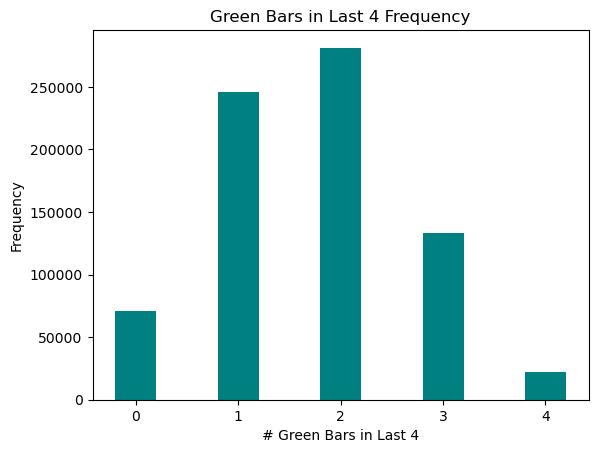

In [167]:
#plotting green bar frequency
plt.bar(data['green_last_4'].value_counts().index, data['green_last_4'].value_counts(),  width = 0.4, color = 'teal')
plt.title('Green Bars in Last 4 Frequency')
plt.xlabel('# Green Bars in Last 4')
plt.ylabel('Frequency')
plt.show()

In [49]:
#defining function to calculate the number of red bars over the last x periods
def red_bars_last_x(df, periods):
    counter = 0
    bar_list = np.zeros(periods) 
    output_list = [] 

    for row in df.itertuples():
        if row[df.columns.get_loc('bar_direction')+1] == -1:
            bar_list[-1] = 1
            output_list.append(np.sum(bar_list))
        if row[df.columns.get_loc('bar_direction')+1] != -1:
            bar_list[-1] = 0
            output_list.append(np.sum(bar_list))
        bar_list = np.roll(bar_list,-1)

    return output_list

In [36]:
#calculating the correlation over various different periods.
#4 appears to be a good number. 3 does perform better but the increase in correlation is small so 4 seems to be a more appropriate spot.
feature_correlation(data, red_bars_last_x, [3,4,6,8,10])

#dropping unneeded correlation feature
data = data.drop('feature', axis = 1)

3 : 0.03552215529679232
4 : 0.033615502366040405
6 : 0.029686979797196183
8 : 0.028454611935499138
10 : 0.026278189745893566


In [50]:
#adding the feature to our data
data['red_last_4'] = red_bars_last_x(data, 4)

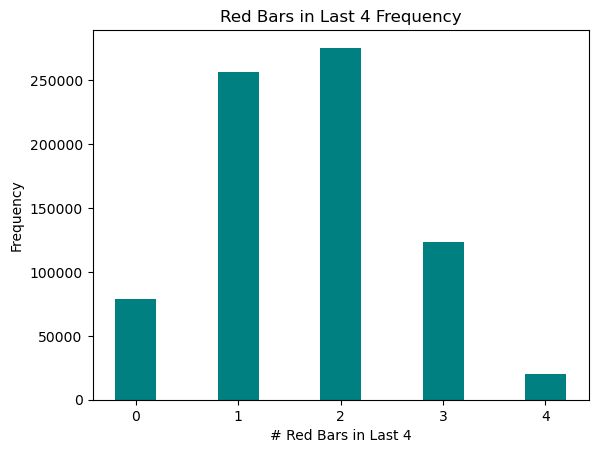

In [168]:
#plotting red bar frequency
plt.bar(data['red_last_4'].value_counts().index, data['red_last_4'].value_counts(),  width = 0.4, color = 'teal')
plt.title('Red Bars in Last 4 Frequency')
plt.xlabel('# Red Bars in Last 4')
plt.ylabel('Frequency')
plt.show()

### Moving Averages (Simple and Exponential Price, Price & Volume)

A common practice in the stock market is using rolling averages as an indicator for the direction of the trend. Below calculates a wide variety of moving averages to encapsulate anything from very short term to long term. These were calculated using the close_diff. If the unadjusted close (non-stationary) was used the final data would contain significant trends in them and as such be non-stationary.

Additionally, I setup moving average features using the non-stationary close. However, since it is non-stationary data, I turned these into categorical values. This was done by calculating if the close was above (greater) or below (less) then the moving average. 

In [52]:
#adding in moving averages
data['close_diff_ma_5'] = data['close_diff'].rolling(window=5).mean()
data['close_diff_ma_10'] = data['close_diff'].rolling(window=10).mean()
data['close_diff_ma_20'] = data['close_diff'].rolling(window=20).mean()
data['close_diff_ma_50'] = data['close_diff'].rolling(window=50).mean()
data['close_diff_ma_100'] = data['close_diff'].rolling(window=100).mean()
data['close_diff_ma_200'] = data['close_diff'].rolling(window=200).mean()

data['volume_ma_5'] = data['volume'].rolling(window=5).mean()
data['volume_ma_10'] = data['volume'].rolling(window=10).mean()
data['volume_ma_20'] = data['volume'].rolling(window=20).mean()
data['volume_ma_50'] = data['volume'].rolling(window=50).mean()
data['volume_ma_100'] = data['volume'].rolling(window=100).mean()
data['volume_ma_200'] = data['volume'].rolling(window=200).mean()

data['close_diff_ema_5'] = data['close_diff'].ewm(span = 5).mean()
data['close_diff_ema_10'] = data['close_diff'].ewm(span = 10).mean()
data['close_diff_ema_20'] = data['close_diff'].ewm(span = 20).mean()
data['close_diff_ema_50'] = data['close_diff'].ewm(span = 50).mean()
data['close_diff_ema_100'] = data['close_diff'].ewm(span = 100).mean()
data['close_diff_ema_200'] = data['close_diff'].ewm(span = 200).mean()

In [53]:
#creating feature to show if close was above or below moving averages.
data.loc[(data['close'] > data['close'].ewm(span = 5).mean()), 'close_above_ema_5'] = 1
data.loc[(data['close'] > data['close'].ewm(span = 10).mean()), 'close_above_ema_10'] = 1
data.loc[(data['close'] > data['close'].ewm(span = 20).mean()), 'close_above_ema_20'] = 1
data.loc[(data['close'] > data['close'].ewm(span = 50).mean()), 'close_above_ema_50'] = 1
data.loc[(data['close'] > data['close'].ewm(span = 100).mean()), 'close_above_ema_100'] = 1
data.loc[(data['close'] > data['close'].ewm(span = 200).mean()), 'close_above_ema_200'] = 1

data.loc[(data['close'] < data['close'].ewm(span = 5).mean()), 'close_below_ema_5'] = 1
data.loc[(data['close'] < data['close'].ewm(span = 10).mean()), 'close_below_ema_10'] = 1
data.loc[(data['close'] < data['close'].ewm(span = 20).mean()), 'close_below_ema_20'] = 1
data.loc[(data['close'] < data['close'].ewm(span = 50).mean()), 'close_below_ema_50'] = 1
data.loc[(data['close'] < data['close'].ewm(span = 100).mean()), 'close_below_ema_100'] = 1
data.loc[(data['close'] < data['close'].ewm(span = 200).mean()), 'close_below_ema_200'] = 1

data['close_above_ema_5'] = data['close_above_ema_5'].fillna(0)
data['close_above_ema_10'] = data['close_above_ema_10'].fillna(0)
data['close_above_ema_20'] = data['close_above_ema_20'].fillna(0)
data['close_above_ema_50'] = data['close_above_ema_50'].fillna(0)
data['close_above_ema_100'] = data['close_above_ema_100'].fillna(0)
data['close_above_ema_200'] = data['close_above_ema_200'].fillna(0)

data['close_below_ema_5'] = data['close_below_ema_5'].fillna(0)
data['close_below_ema_10'] = data['close_below_ema_10'].fillna(0)
data['close_below_ema_20'] = data['close_below_ema_20'].fillna(0)
data['close_below_ema_50'] = data['close_below_ema_50'].fillna(0)
data['close_below_ema_100'] = data['close_below_ema_100'].fillna(0)
data['close_below_ema_200'] = data['close_below_ema_200'].fillna(0)

### Moving Average Divergences

Below calculates the differences in current close price vs moving averages. This is done to help determine the direction by comparing where prices are going relative to its mean. As divergence increases it shows the prices are going further away from the mean.

As these are calculated off the non-stationary closing price, below plots them to confirm that the final divergences would remain stationary. Data appears to be stationary after the transformation.

In [54]:
#moving average divergence
data['close_ema_5_div'] = data['close'] - data['close'].ewm(span = 5).mean()
data['close_ema_10_div'] = data['close'] - data['close'].ewm(span = 10).mean()
data['close_ema_20_div'] = data['close'] - data['close'].ewm(span = 20).mean()
data['close_ema_50_div'] = data['close'] - data['close'].ewm(span = 50).mean()
data['close_ema_100_div'] = data['close'] - data['close'].ewm(span = 100).mean()
data['close_ema_200_div'] = data['close'] - data['close'].ewm(span = 200).mean()

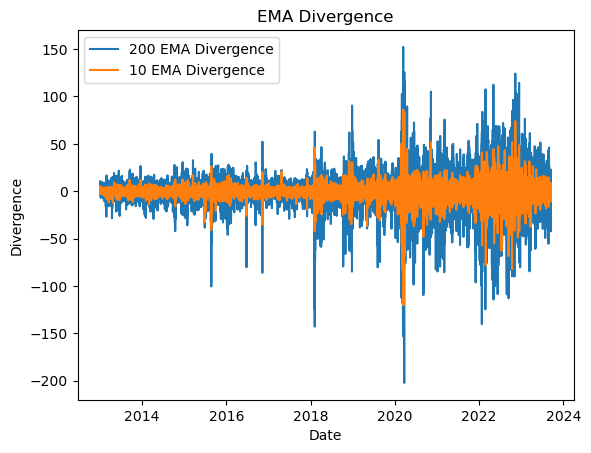

In [175]:
#plotting 200 and 10 ema divergences to ensure they still appear stationary. 
plt.plot(data['date'], data['close_ema_200_div'])
plt.plot(data['date'], data['close_ema_10_div'])
plt.title('EMA Divergence')
plt.xlabel('Date')
plt.ylabel('Divergence')
plt.legend(['200 EMA Divergence', '10 EMA Divergence'])
plt.show()

### Moving Average Convergence Divergence (MACD)

The moving average convergence divergence (MACD) is a commonly used technical indicator. Its purpose is to help determine reversals in the current trend (sudden change in direction and price). The MACD itself is calculated by calculating the difference between two exponential moving averages (12 period and 26 period). The MACD is then compared to the signal bar (9 period exponential moving average of the MACD). In particular, it is strongest around times where the two moving averages cross. If the MACD crosses above the signal bar it is said to be a bullish signal and vice versa if it goes below. 

Below calculates the MACD as well as if that bar involved a cross of the MACD. It also calculates if any of the last 3 bars crossed (including itself) to try and encapsulate the momentum bleeding over into the following bars. 

As certain relationships have historically existed between the MACD and its signal bar, no feature parameter turning was done here.

We can see from the plot below that the MACD ends up being stationary even though it is based on the non-stationary close price.

Below provides an example of the MACD crossover. Here we can see it gives a buy signal as the MACD crosses over the MACD signal line after a strong downtrend. This trend then reverses into a strong uptrend.

In [56]:
#calculating MACD and MACD signal
data['macd'] = data['close'].ewm(span = 12).mean() - data['close'].ewm(span = 26).mean()
data['macd_signal'] = data['macd'].ewm(span = 9).mean()

In [57]:
#categorizing MACD into bullish or bearish
data.loc[data['macd'] > data['macd_signal'], 'macd_bullish'] = 1
data.loc[data['macd'] < data['macd_signal'], 'macd_bearish'] = 1
data['macd_bullish'] = data['macd_bullish'].fillna(0)
data['macd_bearish'] = data['macd_bearish'].fillna(0)

In [58]:
#calculating if the MACD and MACD signal crossed during the current bar
data.loc[(data[ 'macd_bullish'] == 1) & (data[ 'macd_bearish'].shift(1) == 1), 'macd_bullish_cross'] = 1
data.loc[(data[ 'macd_bearish'] == 1) & (data[ 'macd_bullish'].shift(1) == 1), 'macd_bearish_cross'] = 1
data['macd_bullish_cross'] = data['macd_bullish_cross'].fillna(0)
data['macd_bearish_cross'] = data['macd_bearish_cross'].fillna(0)

In [59]:
#calculating if the MACD and MACD signal crossed during the last 3 bars (including itself)
data.loc[(data['macd_bullish_cross'] == 1) | (data['macd_bullish_cross'].shift(1) == 1) |
        (data['macd_bullish_cross'].shift(2) == 1) ,
        'macd_bullish_cross_recent'] = 1

data.loc[(data['macd_bearish_cross'] == 1) | (data['macd_bearish_cross'].shift(1) == 1) |
        (data['macd_bearish_cross'].shift(2) == 1) ,
        'macd_bearish_cross_recent'] = 1

data['macd_bullish_cross_recent'] = data['macd_bullish_cross_recent'].fillna(0)
data['macd_bearish_cross_recent'] = data['macd_bearish_cross_recent'].fillna(0)

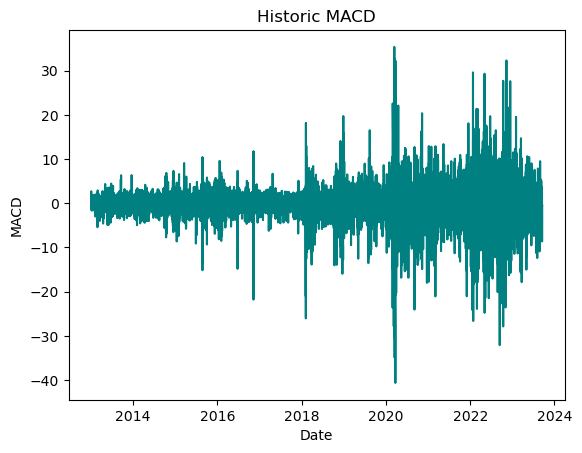

In [169]:
#plotting MACD to ensure its stationary. 
plt.plot(data['date'], data['macd'], color = 'teal')
plt.title('Historic MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.show()

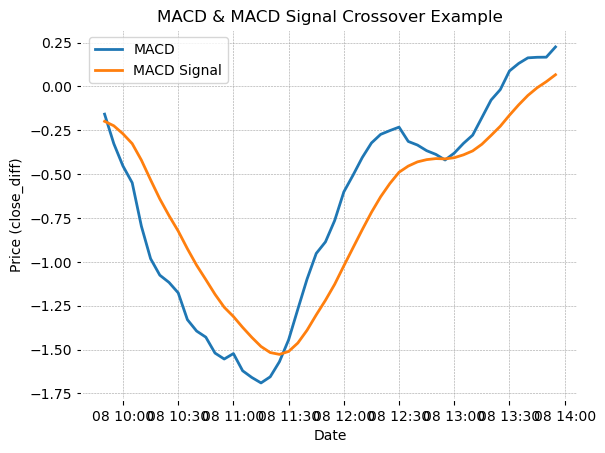

In [61]:
#below is an example of the two lines crossing over. the first cross (at the bottom of the valley) would represent a buy signal.
#the second cross after would represent a sell signal, however it appears to be faulty as it quickly reverts and climbs up.
plt.plot(data['date'][1150:1200], data['macd'][1150:1200])
plt.plot(data['date'][1150:1200], data['macd_signal'][1150:1200])
plt.title('MACD & MACD Signal Crossover Example')
plt.xlabel('Date')
plt.ylabel('Price (close_diff)')
plt.legend([ 'MACD','MACD Signal'])
plt.show()

### Rolling Price Standard Deviations

Below calculates rolling standard deviations. These were added to capture the volatility at the current time in the market. The larger the standard deviation the larger volatility over that period. 

We can see from the chart that the data does have a small trend where the volatility goes up after 2020, however this is expected given the volatility in the market from COVID and after. This shows that the feature is doing a good job of capturing the volatility in the market. Even though there is this small trend the ending data still appears stationary.

In [62]:
#adding in a rolling calculating for standard deviation.
data['close_std_5'] = data['close_diff'].rolling(window=5).std()
data['close_std_10'] = data['close_diff'].rolling(window=10).std()
data['close_std_20'] = data['close_diff'].rolling(window=20).std()
data['close_std_50'] = data['close_diff'].rolling(window=50).std()
data['close_std_100'] = data['close_diff'].rolling(window=100).std()
data['close_std_200'] = data['close_diff'].rolling(window=200).std()

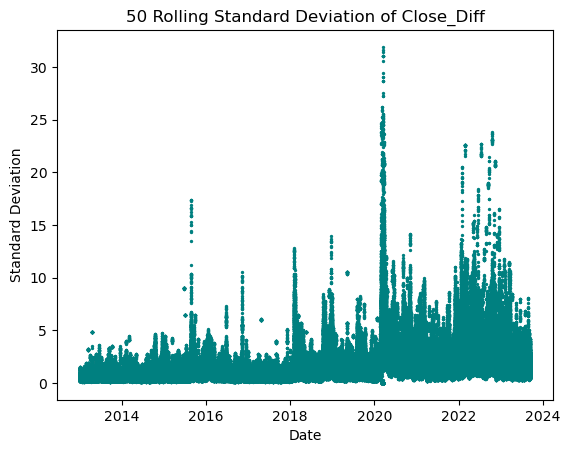

In [176]:
#plotting historical rolling standard deviations
plt.scatter(data['date'], data['close_std_20'], s = 2, color = 'teal')
plt.title('50 Rolling Standard Deviation of Close_Diff')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.show()

### Bollinger Bands

Bollinger bands are used to provide information on what levels prices may move to or have difficulty moving beyond. It does this by creating three bands, an upper, lower and middle. The middle band is simply just a moving average of a set number of periods. The upper and lower bands are the middle band plus/minus 1 standard deviations in the close price over that same period. This ultimately provides a range of prices that we expect price to fall in 95% of the time. 

As these are essentially just moving averages, the data will be non-stationary if we use it on the close price as discussed above in the moving averages features. As such this is calculated over the closing differences so it remains stationary. 

We can see from the plots below that with the periods set low it ends up being very choppy and erratic. This is to be expected and makes sense given our objective is determining direction over a very short time frame (next few bars).

In [65]:
#defining function to calculate Bollinger bands
def bollinger_bands(df, periods, n_stds):
    df['moving_std'] = df['close_diff'].rolling(window=periods).std()
    df['bollinger_middle'] = df['close_diff'].rolling(window=periods).mean()

    df['bollinger_upper'] = df['bollinger_middle'] + n_stds * df['moving_std']
    df['bollinger_lower'] = df['bollinger_middle'] - n_stds * df['moving_std']

    return df['bollinger_upper'], df['bollinger_middle'], df['bollinger_lower']

In [83]:
#as our feature_correlation function only takes features with 1 input parameter, we can't use it here.
#below replicates the same process except with 2 input parameters.
#from below we can see periods 3 and std 1 provide the highest correlation across the upper, middle and lower bands.
#as such these parameters are used.
periods_grid = [3,4,6,8,10,15,20]
std_grid = [1,2]

for periods in periods_grid:
    for std in std_grid:
        data['bollinger_upper'], data['bollinger_middle'], data['bollinger_lower'] = bollinger_bands(data, periods, std)
        temp = filter_outliers_rth(data, ['close_diff','log_return','volume'])
        upper_corr = temp.corrwith(temp['target_direction'])['bollinger_upper']
        middle_corr = temp.corrwith(temp['target_direction'])['bollinger_middle']
        lower_corr = temp.corrwith(temp['target_direction'])['bollinger_lower']
        print('periods', periods, ', std', std, ':', round(upper_corr,4), round(middle_corr,4), round(lower_corr,4))
        
del(temp)

periods 3 , std 1 : -0.0196 -0.0248 -0.0117
periods 3 , std 2 : -0.0139 -0.0248 -0.0048
periods 4 , std 1 : -0.0175 -0.0221 -0.0083
periods 4 , std 2 : -0.0127 -0.0221 -0.0023
periods 6 , std 1 : -0.0148 -0.0196 -0.0054
periods 6 , std 2 : -0.0108 -0.0196 -0.0006
periods 8 , std 1 : -0.0141 -0.0184 -0.0032
periods 8 , std 2 : -0.0106 -0.0184 0.0011
periods 10 , std 1 : -0.013 -0.0171 -0.0019
periods 10 , std 2 : -0.0099 -0.0171 0.0019
periods 15 , std 1 : -0.0106 -0.0109 0.0024
periods 15 , std 2 : -0.0089 -0.0109 0.0046
periods 20 , std 1 : -0.0082 -0.0064 0.0038
periods 20 , std 2 : -0.0074 -0.0064 0.0051


In [66]:
#adding Bollinger bands to the data set
data['bollinger_upper'], data['bollinger_middle'], data['bollinger_lower'] = bollinger_bands(data, 3, 1)

#dropping unneeded columns as part of feature calc
data = data.drop(['moving_std'], axis = 1)

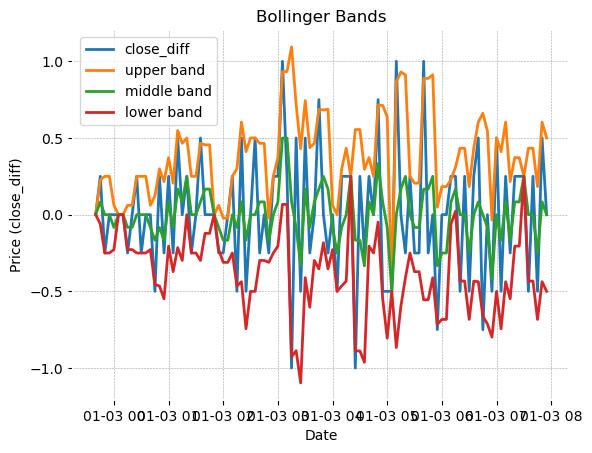

In [67]:
#plotting the bollinger bands
plt.plot(data['date'][200:300], data['close_diff'][200:300])
plt.plot(data['date'][200:300], data['bollinger_upper'][200:300])
plt.plot(data['date'][200:300], data['bollinger_middle'][200:300])
plt.plot(data['date'][200:300], data['bollinger_lower'][200:300])
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price (close_diff)')
plt.legend([ 'close_diff','upper band', 'middle band', 'lower band'])
plt.show()

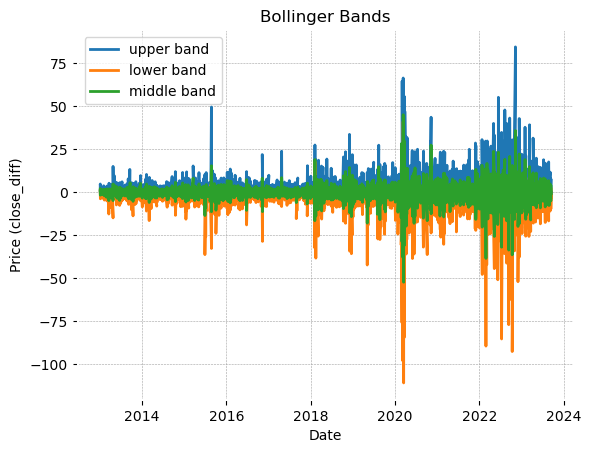

In [68]:
#plotting bands to ensure data is still stationary
plt.plot(data['date'], data['bollinger_upper'])
plt.plot(data['date'], data['bollinger_lower'])
plt.plot(data['date'], data['bollinger_middle'])
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price (close_diff)')
plt.legend([ 'upper band', 'lower band', 'middle band'])
plt.show()

### Relative Strength Index (RSI)

Relative strength index (RSI) is a commonly used indicator in the stock market. RSI attempts to measure momentum through speed and magnitude of recent price changes. RSI does this by comparing average gains when it moves up to average losses when it moves down. The RSI is calculated over the last x periods, in this case 4.

When RSI is above 70 it is said that the stock has been overbought and is expecting a reversal to the downside. When the RSI is below 30 it is said to be oversold and are expecting a reversal to the upside. As such as after the initial RSI feature is calculated, features are added to categorize it into oversold or overbought. 

Below we also add a feature for a common strategy using RSI where it is a buy indicator when it goes from being oversold to not (when RSI goes from <30 to >30). Vice versa for overbought.

The chart below plots out where the RSI would indicate to buy and sell based off if it is overbought or oversold. We can see this isn't a great indicator by itself, giving lots of false positives. We can see that at certain situations though it can pick the peaks and valleys well. That being said it struggles when the market is trending in one direction strongly, and shines picking up reversales in the market.

In [69]:
#defining function to calculate RSI
def rsi(df, periods):
    #calculating avg_gain and avg_loss over the last n period. Note this is the sum divided by the period/window.
    df['avg_gain'] = pd.DataFrame(  np.where(df['close_diff'] >0, df['close_diff'], 0)  ).rolling(window=periods).sum() / periods
    df['avg_loss'] = abs(pd.DataFrame(  np.where(df['close_diff'] <0, df['close_diff'], 0)  ).rolling(window=periods).sum() / periods)

    #calculating RSI and inputting RSI as 50 when avg_gain/loss both = 0
    df['rsi'] = 100 - (100 / (1 + df['avg_gain'] / df['avg_loss'] ))
    df.loc[(data['avg_loss'] == 0) &  (df['avg_gain'] == 0), 'rsi'] = 50
    
    df = df.drop(['avg_gain','avg_loss'], axis = 1)
    
    return df['rsi']

In [70]:
#calculating the correlation over various different periods.
#4 appears to be a good number. 3 does perform better but the increase in correlation is small so 4 seems to be a more appropriate spot.
feature_correlation(data, rsi, [3,4,6,8,10])

#dropping unneeded correlation feature
data = data.drop('feature', axis = 1)

3 : -0.04134267590770868
4 : -0.03974679492440684
6 : -0.03569118540695702
8 : -0.03377753181855545
10 : -0.030891986984774987


In [72]:
#adding in RSI feature to data set
data['rsi'] = rsi(data, 4)

#dropping unneeded columns as part of feature calc
data = data.drop(['avg_gain','avg_loss'], axis = 1)

In [73]:
#adding an additional indicator of if RSI is overbought or sold. This is based on if the indicator is over 70 then it is overbought, and if it is under 30 it is undersold.
data.loc[data.loc[:, 'rsi'] < 30, 'rsi_oversold'] = 1
data.loc[data.loc[:, 'rsi'] >= 30, 'rsi_oversold'] = 0
data.loc[data.loc[:, 'rsi'] > 70, 'rsi_overbought'] = 1
data.loc[data.loc[:, 'rsi'] <= 70, 'rsi_overbought'] = 0        

In [74]:
#adding in an indicator to contain the same information as above (oversold, overbought), but include it as one features.
#This was done to see if the models would prefer it in this format since it is slightly ordinal.
data.loc[data.loc[:, 'rsi'] < 30, 'rsi_indicator'] = 1
data.loc[data.loc[:, 'rsi'] > 70, 'rsi_indicator'] = -1
data.loc[(data.loc[:, 'rsi'] >= 30) & (data.loc[:, 'rsi'] <= 70), 'rsi_indicator'] = 0

In [75]:
#strategy - enter when the RSI is no longer overbought/oversold showing the trend has reversed.
data.loc[(data['rsi_oversold'] == 0) & (data['rsi_oversold'].shift(1) == 1), 'rsi_bullish_strat' ] = 1
data.loc[(data['rsi_overbought'] == 0) & (data['rsi_overbought'].shift(1) == 1), 'rsi_bearish_strat' ] = 1
data['rsi_bullish_strat'] = data['rsi_bullish_strat'].fillna(0)
data['rsi_bearish_strat'] = data['rsi_bearish_strat'].fillna(0)

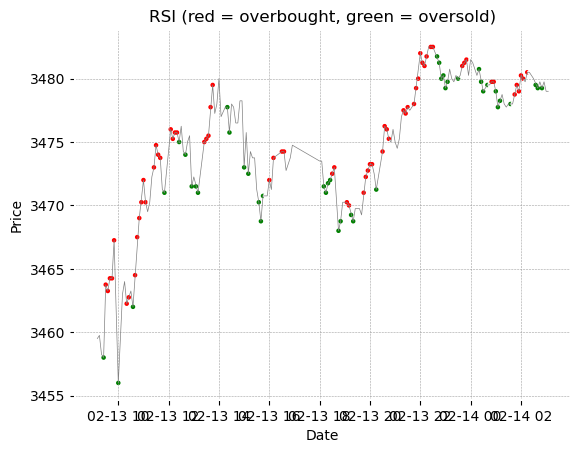

In [76]:
#plotting RSI with examples of oversold and overbought sections
colors = {1:'green', -1:'red', 0:'white'}

low = 499900
high = low + 200

plt.scatter(data['date'][low:high], data['close'][low:high], c = data['rsi_indicator'][low:high].map(colors), s = 5)
plt.plot(data.loc[low:high,'date'], data.loc[low:high,'close'], color = 'grey', linewidth = .5)
plt.title('RSI (red = overbought, green = oversold)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

### Stochastic Oscillator

The stochastic k% oscillator is another common indicator used for momentum. This indicator compares the closing price to the range of prices over a certain period. 

When stochastic is above 80 it is said that the stock has been overbought and are expecting a reversal to the downside. When the stochastic is below 20 it is said to be oversold and are expecting a reversal to the upside. As such as after the initial stochastic feature is calculated, features are added to categorize it into oversold or overbought.

Additionally, the stochastic contains two more features:
- Stochastic d% - This is a simple moving average of the stochastic k% over the last 3 instances
- Stochastic divergence - This is the difference between the stochastic k% and d%. The crossover of these two indicators often indicates a change in momentum. 


Below calculates the k% & d% as well as if that bar involved a cross of the two indicators. It also calculates if any of the last 3 crossed (including itself) to try and encapsulate the momentum bleeding over into the following bars. Lastly it calculates a common strategy with the stochastic oscillator where it buys when it goes from being oversold to not (when it drops from <20 to >20). Vice versa is calculated for overbought.

Below charts where the stochastic would buy or sell based on overbought and oversold areas. Just like the RSI, it struggles with false positives when considered by itself. Ultimately the charts look very similar and the same conclusions can be drawn. I also plotted out example trades from the bullish strategy developed. This appears to do marginally better than the overbought/oversold areas, however it still runs into many of the same issues. We can see it struggles in many of the same areas as the oversold indicator did.


In [77]:
#calculating stochastic oscillator
def stochastic(df, periods):

    #calculating high/low for last n period.
    df['rolling_low'] =  df['low'].rolling(window=periods).min() 
    df['rolling_high'] = df['high'].rolling(window=periods).max()

    #stochastic calculation
    df['stochastic_%k'] =( ( df['close'] - df['rolling_low'] ) / (df['rolling_high'] - df['rolling_low']) ) * 100
    df.loc[data['rolling_high'] - df['rolling_low'] == 0, 'stochastic_%k'] = 50


    return df['stochastic_%k']


In [86]:
#calculating the correlation over various different periods.
#4 appears to be a good number. 3 does perform better but the increase in correlation is small so 4 seems to be a more appropriate spot.
feature_correlation(data, stochastic, [3,4,6,8,10])

#dropping unneeded correlation feature
data = data.drop('feature', axis = 1)

3 : -0.0503442731722543
4 : -0.04918418619774976
6 : -0.046759353534487236
8 : -0.04492402660935895
10 : -0.043414940837780365


In [88]:
#adding in stochastic feature to data set
data['stochastic_%k'] = stochastic(data, 3)

#dropping unneeded columns as part of feature calc
data = data.drop(['rolling_low','rolling_high'], axis = 1)

In [89]:
#adding the %D stochastic oscillator into the data. Just a 3 period simply moving average.
data['stochastic_%d'] = data['stochastic_%k'].rolling(window=3).mean()

In [90]:
#adding an additional indicator of if stochastic is overbought or sold. This is based on if the indicator is over 80 then it is overbought, and if it is under 20 it is undersold.
data.loc[data.loc[:, 'stochastic_%k'] < 20, 'stochastic_oversold'] = 1
data.loc[data.loc[:, 'stochastic_%k'] >= 20, 'stochastic_oversold'] = 0
data.loc[data.loc[:, 'stochastic_%k'] > 80, 'stochastic_overbought'] = 1
data.loc[data.loc[:, 'stochastic_%k'] <= 80, 'stochastic_overbought'] = 0     

In [91]:
#adding in an indicator to contain the same information as above (oversold, overbought), but include it as one features.
#this was done to see if the models would prefer it in this format since it is slightly ordinal.
data.loc[data.loc[:, 'stochastic_%k'] < 20, 'stochastic_indicator'] = 1
data.loc[data.loc[:, 'stochastic_%k'] > 80, 'stochastic_indicator'] = -1
data.loc[(data.loc[:, 'stochastic_%k'] >= 20) & (data.loc[:, 'stochastic_%k'] <= 80), 'stochastic_indicator'] = 0

In [92]:
#strategy - enter when the stochastic is no longer overbought/oversold showing the trend has reversed.
data.loc[(data['stochastic_oversold'] == 0) & (data['stochastic_oversold'].shift(1) == 1), 'stochastic_bullish' ] = 1
data.loc[(data['stochastic_overbought'] == 0) & (data['stochastic_overbought'].shift(1) == 1), 'stochastic_bearish' ] = 1
data['stochastic_bullish'] = data['stochastic_bullish'].fillna(0)
data['stochastic_bearish'] = data['stochastic_bearish'].fillna(0)

In [93]:
#adding divergence of the k% and d% stochastic oscillators. There is often times a change in momentum when the signals cross.
data['stochastic_divergance'] =  data['stochastic_%k'] - data['stochastic_%d']

In [94]:
#calculating if it is bullish or bearish divergence
data.loc[data['stochastic_%k'] > data['stochastic_%d'], 'stochastic_div_bullish'] = 1
data.loc[data['stochastic_%k'] < data['stochastic_%d'], 'stochastic_div_bearish'] = 1
data['stochastic_div_bullish'] = data['stochastic_div_bullish'].fillna(0)
data['stochastic_div_bearish'] = data['stochastic_div_bearish'].fillna(0)

In [95]:
#calculating if the k% and d% crossed (if it went from bullish to bearish div)
data.loc[(data[ 'stochastic_div_bullish'] == 1) & (data[ 'stochastic_div_bearish'].shift(1) == 1), 'stochastic_bullish_cross'] = 1
data.loc[(data[ 'stochastic_div_bearish'] == 1) & (data[ 'stochastic_div_bullish'].shift(1) == 1), 'stochastic_bearish_cross'] = 1
data['stochastic_bullish_cross'] = data['stochastic_bullish_cross'].fillna(0)
data['stochastic_bearish_cross'] = data['stochastic_bearish_cross'].fillna(0)

In [96]:
#calculating if the cross of the k% and d% happened in any of the last 3 bars (including itself)
data.loc[(data['stochastic_div_bullish'] == 1) | (data['stochastic_div_bullish'].shift(1) == 1) |
        (data['stochastic_div_bullish'].shift(2) == 1) ,
        'stochastic_bullish_cross_recent'] = 1

data.loc[(data['stochastic_bearish_cross'] == 1) | (data['stochastic_bearish_cross'].shift(1) == 1) |
        (data['stochastic_bearish_cross'].shift(2) == 1) ,
        'stochastic_bearish_cross_recent'] = 1

data['stochastic_bullish_cross_recent'] = data['stochastic_bullish_cross_recent'].fillna(0)
data['stochastic_bearish_cross_recent'] = data['stochastic_bearish_cross_recent'].fillna(0)

In [97]:
#strategy - enter when the stochastic is no longer overbought/oversold showing the trend has reversed and k% has crossed d%
data.loc[(data['stochastic_%k'] > data['stochastic_%d']) & (data['stochastic_oversold'].shift(1) == 1), 'stochastic_bullish_strat' ] = 1
data.loc[(data['stochastic_overbought'] == 0) & (data['stochastic_overbought'].shift(1) == 1), 'stochastic_bearish_strat' ] = 1
data['stochastic_bullish_strat'] = data['stochastic_bullish_strat'].fillna(0)
data['stochastic_bearish_strat'] = data['stochastic_bearish_strat'].fillna(0)

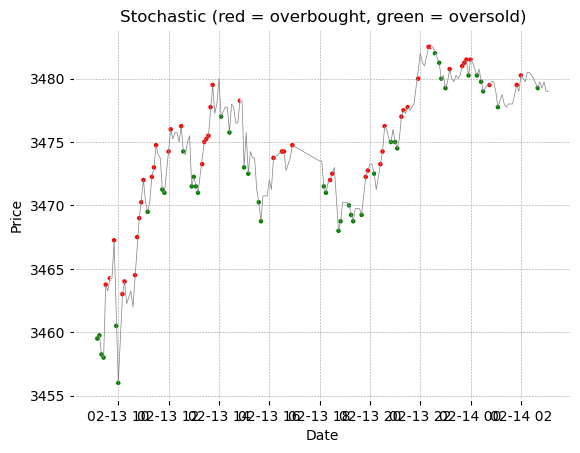

In [98]:
#plotting example of stochastic overbought and oversold
colors = {1:'green', -1:'red', 0:'white'}

low = 499900
high = low + 200

plt.scatter(data['date'][low:high], data['close'][low:high], c = data['stochastic_indicator'][low:high].map(colors), s = 5)
plt.plot(data.loc[low:high,'date'], data.loc[low:high,'close'], color = 'grey', linewidth = .5)
plt.title('Stochastic (red = overbought, green = oversold)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

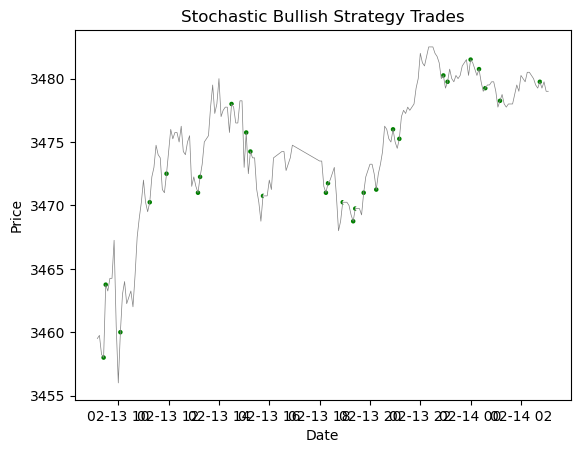

In [893]:
#plotting example of stochastic bullish strategy
colors = {1:'green', 0:'white'}

low = 499900
high = low + 200

plt.scatter(data['date'][low:high], data['close'][low:high], c = data['stochastic_bullish_strat'][low:high].map(colors), s = 5)
plt.plot(data.loc[low:high,'date'], data.loc[low:high,'close'], color = 'grey', linewidth = .5)
plt.title('Stochastic Bullish Strategy Trades')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

### Time of Day

The stock market sees different levels of volatility and volume throughout the day. The morning session for the few first hours tends to be the highest. It then slows down drastically in the middle of the day. The volatility and volume picks back up again around the closing hour. By categorizing the data into their different parts of the day, I hope it provides another tool to help pick up the trends seen in volatility and volume.

This trend is confirmed below by looking at the key statistics for the change in closing prices and volume for each part of the day. We can see that the morning and late day both have larger standard deviations for both the closing difference and volume. We can also see a significant increase in the average volume during these times of the day (+16k compared to 10k during midday).

In [99]:
#adding in feature for part of day
data.loc[(data['date'].dt.hour >= 9) & (data['date'].dt.hour < 12), 'morning'] = 1 
data.loc[(data['date'].dt.hour >= 12) & (data['date'].dt.hour < 15), 'midday'] = 1 
data.loc[(data['date'].dt.hour >= 15) & (data['date'].dt.hour < 16), 'lateday'] = 1 

data['morning'] = data['morning'].fillna(0)
data['midday'] = data['midday'].fillna(0)
data['lateday'] = data['lateday'].fillna(0)

In [100]:
data.loc[data['morning'] == 1][['close_diff','volume']].describe()

,close_diff,volume
count,99383.000000,99383.000000
mean,0.009901,16886.495739
std,3.005080,12594.117293
min,-102.750000,1.000000
25%,-1.000000,7927.000000
50%,0.000000,14298.000000
75%,1.000000,22844.500000
max,70.500000,159038.000000


In [101]:
data.loc[data['midday'] == 1][['close_diff','volume']].describe()

,close_diff,volume
count,97267.000000,97267.000000
mean,0.006328,10367.596482
std,2.469583,7768.376644
min,-62.500000,1.000000
25%,-0.750000,5528.000000
50%,0.000000,8373.000000
75%,0.750000,12866.000000
max,49.500000,192597.000000


In [102]:
data.loc[data['lateday'] == 1][['close_diff','volume']].describe()

,close_diff,volume
count,32076.000000,32076.000000
mean,-0.011216,20452.096957
std,3.166712,21354.341048
min,-45.750000,487.000000
25%,-1.000000,9053.000000
50%,0.000000,14011.000000
75%,1.000000,22489.250000
max,51.250000,275823.000000


### Season of Year

Similar to above the stock market sees different levels of volume and volatility throughout the year. The winter tends to be the busiest, with spring and fall being fairly busy as well. Summer however tends to be significantly slower than the rest of the year. 

When looking at the key statistics we can see this holds somewhat true. What is most notable is that summer does indeed have the lowest standard deviations on closing differences and volume as well as the lowest average volume. Confirming the belief that there is less volatility in the summer. The differences between fall, spring and winter are more trivial.

In [103]:
#adding in which season of the year it is
data.loc[(data['date'].dt.month >= 9) & (data['date'].dt.month <= 11), 'fall'] = 1
data.loc[(data['date'].dt.month >= 3) & (data['date'].dt.month <= 5), 'spring'] = 1 
data.loc[(data['date'].dt.month >= 6) & (data['date'].dt.month <= 8), 'summer'] = 1 
data.loc[(data['date'].dt.month == 12) | (data['date'].dt.month <= 2), 'winter'] = 1 

data['fall'] = data['fall'].fillna(0)
data['spring'] = data['spring'].fillna(0)
data['summer'] = data['summer'].fillna(0)
data['winter'] = data['winter'].fillna(0)

In [104]:
data.loc[data['fall'] == 1][['close_diff','volume']].describe()

,close_diff,volume
count,179784.000000,179784.000000
mean,0.005571,5610.338795
std,1.880364,10167.318621
min,-101.000000,1.000000
25%,-0.500000,509.000000
50%,0.000000,1379.000000
75%,0.500000,6363.000000
max,92.000000,259411.000000


In [105]:
data.loc[data['spring'] == 1][['close_diff','volume']].describe()

,close_diff,volume
count,195281.000000,195281.000000
mean,0.003938,5646.420635
std,2.417410,9967.845729
min,-106.750000,1.000000
25%,-0.500000,481.000000
50%,0.000000,1397.000000
75%,0.500000,6870.000000
max,70.500000,268171.000000


In [106]:
data.loc[data['summer'] == 1][['close_diff','volume']].describe()

,close_diff,volume
count,197522.000000,197522.000000
mean,0.006699,5172.804402
std,1.651542,9358.014470
min,-93.500000,1.000000
25%,-0.500000,472.000000
50%,0.000000,1336.000000
75%,0.500000,6039.000000
max,52.250000,275823.000000


In [107]:
data.loc[data['winter'] == 1][['close_diff','volume']].describe()

,close_diff,volume
count,181140.000000,181141.000000
mean,-0.000261,5668.538006
std,2.025798,10326.953919
min,-95.750000,1.000000
25%,-0.500000,490.000000
50%,0.000000,1363.000000
75%,0.500000,6426.000000
max,46.000000,237677.000000


### Trend Lines 

In an effort to try and provide additional direction or trends to the models I used linear regression to calculate the slope of the line over the last n periods. The rationale behind this is that the slope of the line whether it is + or - should give some directional bias. I used the slope to categorize it into three classes up (1), down (-1), or sideways (0) based on the standard deviation. This was done as we want to try differentiate between stronger and weaker moves.

The chart below plots out whether bars slope is up or down. We can see that this does a somewhat decent job of determining the greater trend. When the price is trending down it is mostly red and when its trending up its mostly green. We can see however when the markets aren't trending and chopping sideways (like in the last 1/4 of the chart) it struggles to identify trends in a timely manner.

In [108]:
#creating function to calculate trend slope
from sklearn.linear_model import LinearRegression

def trend_slope(df, periods):
    close_list = np.zeros(periods) 
    output_list = []

    for row in df.itertuples():
        close_list[-1] = row[df.columns.get_loc('close')+1]

        lin_reg = LinearRegression()
        lin_reg.fit(np.reshape(range(0,len(close_list)), [-1,1]), np.reshape(close_list, [-1,1]))

        output_list.append(lin_reg.coef_[0][0])
        close_list = np.roll(close_list,-1)
        
    return output_list

In [117]:
#calculating the correlation over various different periods.
#3 appears to be the strongest periods.
feature_correlation(data, trend_slope, [3,4,6,8,10])

#dropping unneeded correlation feature
data = data.drop('feature', axis = 1)

3 : -0.027967485031272006
4 : -0.02414626000910994
6 : -0.01956321143449319
8 : -0.016120609699727825
10 : -0.013777222559466347


In [109]:
#adding trend slope into the data set
data['trend_slope'] = trend_slope(data, 3)

In [110]:
#categorizing trend slope into up (1), down(-1), and sideways (0)
data.loc[(data['trend_slope'] > data.loc[:,'trend_slope'].describe()['std'] * .1), 'trend_direction'] = 1
data.loc[(data['trend_slope'] <  - data.loc[:,'trend_slope'].describe()['std'] * .1), 'trend_direction'] = -1
data.loc[:,'trend_direction'] = data['trend_direction'].fillna(0)

In [111]:
#categorizing the trend slope into up and down but shown as a separate features. 
#This is the same information as above but included as a separate features. This is done to see if either perform better.
data.loc[(data['trend_slope'] > data.loc[:,'trend_slope'].describe()['std'] * .1), 'trend_direction_up'] = 1
data.loc[(data['trend_slope'] <= data.loc[:,'trend_slope'].describe()['std'] * .1), 'trend_direction_up'] = 0

data.loc[(data['trend_slope'] < - data.loc[:,'trend_slope'].describe()['std'] * .1), 'trend_direction_down'] = 1
data.loc[(data['trend_slope'] >= - data.loc[:,'trend_slope'].describe()['std'] * .1), 'trend_direction_down'] = 0


data.loc[(data['trend_slope'] <= data.loc[:,'trend_slope'].describe()['std'] * .1) &
         (data['trend_slope'] >= - data.loc[:,'trend_slope'].describe()['std'] * .1)
         , 'trend_direction_sideways'] = 1

data.loc[(data['trend_slope'] > data.loc[:,'trend_slope'].describe()['std'] * .1) |
         (data['trend_slope'] < - data.loc[:,'trend_slope'].describe()['std'] * .1)
         , 'trend_direction_sideways'] = 0

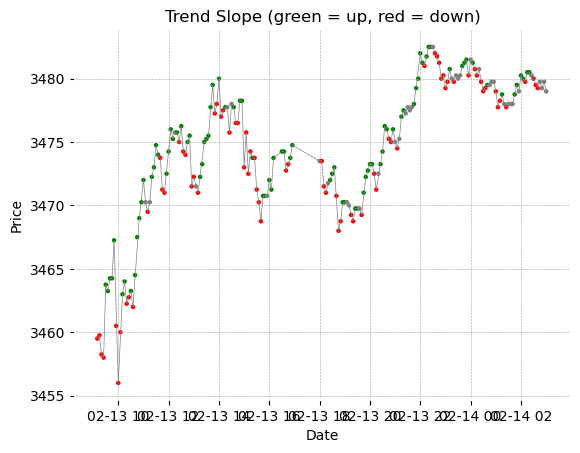

In [112]:
#plotting the trend slope with price
colors = {1:'green', -1:'red', 0:'grey'}

low = 499900
high = low + 200

plt.scatter(data['date'][low:high], data['close'][low:high], c = data['trend_direction'][low:high].map(colors), s = 5)
plt.plot(data.loc[low:high,'date'], data.loc[low:high,'close'], color = 'grey', linewidth = .5)
plt.title('Trend Slope (green = up, red = down)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

### Next Direction

This calculates the direction of the next change in closing price. This feature is forward looking and is used for performance calculations later on. This feature is dropped for training the models.

In [113]:
#adding in feature for next_direction of candle.
data.loc[(data['close'].shift(-1) > data['close']), 'next_direction'] = 1
data.loc[(data['close'].shift(-1) < data['close']), 'next_direction'] = -1
data['next_direction'] = data['next_direction'].bfill()

### Average True Range (ATR)

Below calculates the average true range (ATR). The ATR tries to quantify the volatility in the market by calculating the average periods range. Note that this uses non-stationary data and the final result will be non-stationary so this is not used for the machine learning model. As such this feature will be dropped for training. This will be implemented later on outside of it so it is kept for now.

In [114]:
#calculating intraday ATR

periods = 14

data['h-l'] =  data['high'] - data['low']
data['h-pc'] =  abs( data['high'] - data['close'].shift(1) )
data['l-pc'] =  abs( data['low'] - data['close'].shift(1) )

data['true_range'] = data[['h-l', 'h-pc','l-pc']].values.max(1)

data['atr'] = data['true_range'].rolling(window = periods).mean()

data = data.drop(['h-l', 'h-pc', 'l-pc', 'true_range'], axis = 1)

### Checking for Null Values 

After all the features were created, below checks to ensure that all null values appear appropriate. Per review they relate to the lagging elements of these features, and as such are appropriate and can be dropped when training occurs. Note certain features have 1 more null then you would expect but this is due to them using 'close_diff' in the calculation, which has a null value at the start due to the differencing done. As such this will add 1 more null value as no calculations can be done over this null value.

In [115]:
data.loc[:, data.isna().any()].isnull().sum()

close_diff                 1
log_return                 1
open_diff                  1
high_diff                  1
low_diff                   1
target_direction           1
bar_direction              1
close_diff_ma_5            5
close_diff_ma_10          10
close_diff_ma_20          20
close_diff_ma_50          50
close_diff_ma_100        100
close_diff_ma_200        200
volume_ma_5                4
volume_ma_10               9
volume_ma_20              19
volume_ma_50              49
volume_ma_100             99
volume_ma_200            199
close_diff_ema_5           1
close_diff_ema_10          1
close_diff_ema_20          1
close_diff_ema_50          1
close_diff_ema_100         1
close_diff_ema_200         1
close_std_5                5
close_std_10              10
close_std_20              20
close_std_50              50
close_std_100            100
close_std_200            200
bollinger_middle           3
bollinger_upper            3
bollinger_lower            3
rsi           

### ----------------------------------------------------------------------------------------------------------------------------------------------------------
# Data Filtering, Cleaning and Temporary Splitting
### ----------------------------------------------------------------------------------------------------------------------------------------------------------

Now that we have our features created we can do some additional data preparation. In order to determine which features will be used for modeling, we will use random forest importance to determine which features are the most beneficial. In order to do this, we will be training a random forest model, and as such we will need to setup our data for training this initial model. 

Note that once our features are determined we will repeat this process to get to the final data set used for modeling.

### Filtering Data

Here data is filtered in a few different ways:
- Drop any non-stationary or unusable features
- Filter data to only be regular trading hours - see note below 
- Drop any NA values as a result from feature creation

As mentioned earlier at the top of feature selection, the data is adjusted to only include regular trading hours (9 - 16) as this is when most of the volume and action is in the day. Outside these hours the market moves slow with smaller movements. These hours outside the regular trading hours provide little opportunity to day trade so they are removed now.

In [7]:
#features that can't be used for model  due to data type, stationarity,  or forward looking.
cols_to_drop = ['date', 'next_direction','atr', 'open', 'high','low','close']

#setting up data to be used for training and evaluation
filtered_data = data.copy()

#filtering data to be only market hours
filtered_data = filtered_data.loc[(filtered_data['date'].dt.hour >= 9) & (filtered_data['date'].dt.hour < 16)]

#dropping unusable features
filtered_data = filtered_data.drop(cols_to_drop, axis = 1)

#dropping NA values that arose during feature creation
filtered_data = filtered_data.dropna()

### Outliers

Below removes any outliers as discussed up above in the EDA section.

In [8]:
#number of samples before filtering outliers
len(filtered_data)

228642

In [9]:
#removing outliers
filtered_data = filter_outliers(filtered_data, ['close_diff','log_return','volume'])

In [10]:
#number of samples after filtering outliers
len(filtered_data)

204495

### Splitting Data

In order to train and evaluate the model, the data is split into the following sets:
- Walk forward - Any data during or after July 2023. This data is used to evaluate the performance of the model on current market conditions. This is crucial as the markets go through different periods, and a robust model and strategy will need to perform under current market conditions.
- Train set - This includes 80% of the data from before July 2023. This will be used to train the model.
- Test set - This includes the remaining 20% of the data from before July 2023. This will be used to evaluate the model and strategy along with the walk forward set.

After splitting the data, we end up with data sets with the following number of samples:
- training data - 160k
- test set - 40k
- walk forward set - 4K

These should provide adequate amount of samples to properly train and evaluate the models.

Below also looks at the value counts in the target data. We want to ensure that the classes appear balanced after all the adjustments/filters done since we initially brought in the data. This is crucial as imbalanced classes can affect the accuracy of machine learning models. As we can see the classes are fairly comparable in counts, as such they are balanced and we can continue.

In [11]:
#setting up backtest and walk forward data
backtest_data = filtered_data.loc[data['date'] < '2023-07']
walkforward_data = filtered_data.loc[data['date'] >= '2023-07']

In [12]:
#setting up training and test data
y = backtest_data.loc[:,backtest_data.columns == 'target_direction']
X = backtest_data.loc[:,backtest_data.columns != 'target_direction']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [13]:
#ensuring after final filtering that there isn't any class imbalance 
y.value_counts()

target_direction
 1.0                102858
-1.0                 97480
dtype: int64

### ----------------------------------------------------------------------------------------------------------------------------------------------------------
# Feature Selection
### ----------------------------------------------------------------------------------------------------------------------------------------------------------

To determine which features will be used to train the model, random forest importance will be used. Originally I was hoping to do backward feature selection however due to the computational complexities with this large dataset it wasn't feasible. Rather, I used random feature importance to calculate how important each feature was. From here features beyond a certain importance threshold were selected. To determine this threshold a function was created to scan various different thresholds and output the accuracy. 

Importance thresholds of 0.010, 0.018, 0.019, 0.020 and 0.022 were investigated with the function. These levels were chosen based off the number of features included so it would cover a wide variety of ranges (no two sets were too similar). The threshold of 0.018 ended up performing the strongest so the features beyond this threshold will be used for modeling.

<Axes: >

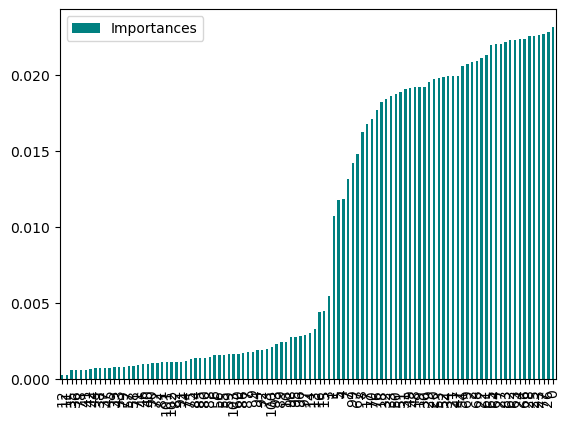

In [19]:
#calculating the random forest importance and plotting the results

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)

rnd_clf.fit(X_train,y_train)

importances = rnd_clf.feature_importances_

feature_importance_df = pd.DataFrame({'Features': pd.DataFrame(X).columns, 'Importances': importances})
feature_importance_df.set_index('Importances')

feature_importance_df = feature_importance_df.sort_values('Importances')

feature_importance_df.plot.bar(color = 'teal')

plt.show()

In [20]:
#defining a function to go through each threshold and output the accuracy, recall and precision

from sklearn.metrics import accuracy_score, precision_score, recall_score

def feature_selection_threshold(features_df, thresholds, X_train, y_train, X_test, y_test):
    for threshold in thresholds:
        
        #creating base model
        rnd_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
        
        #selecting features beyond the threshold and adjusting the data to only include them
        cols = features_df.loc[features_df['Importances'] > threshold]['Features']
        X_train_adj = X_train[cols]
        X_test_adj = X_test[cols]
        
        #fitting the model with the selected columns
        rnd_clf.fit(X_train_adj,y_train)
        
        #calculating predictions and stats
        y_pred = rnd_clf.predict(X_test_adj)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average = None)
        recall = recall_score(y_test, y_pred, average = None)
        
        #outputting the results
        print(f'Threshold: {threshold}')
        print('Accuracy       ', round(accuracy*100,2))
        print('Precision   -1:', round(precision[0]*100,2), ' 1:',  round(precision[1]*100, 2))
        print('Recall      -1:', round(recall[0]*100,2), ' 1:',  round(recall[1]*100, 2), '\n')

In [130]:
#finding the optimal feature selection threshold
#0.018 appears to be the best due to its accuracy and recall being the best across the board.
feature_selection_threshold(feature_importance_df, [ 0.010, 0.018, 0.019, 0.020, 0.022], X_train, y_train, X_test, y_test)

Threshold: 0.01
Accuracy        53.39
Precision   -1: 52.32  1: 54.32
Recall      -1: 50.02  1: 56.6 

Threshold: 0.018
Accuracy        54.78
Precision   -1: 53.82  1: 55.62
Recall      -1: 51.39  1: 58.01 

Threshold: 0.019
Accuracy        54.12
Precision   -1: 53.12  1: 54.98
Recall      -1: 50.55  1: 57.51 

Threshold: 0.02
Accuracy        52.94
Precision   -1: 51.85  1: 53.88
Recall      -1: 49.3  1: 56.41 

Threshold: 0.022
Accuracy        52.7
Precision   -1: 51.59  1: 53.65
Recall      -1: 48.97  1: 56.24 



In [21]:
#selecting the final features based off the threshold above
selected_features = feature_importance_df.loc[feature_importance_df['Importances'] > 0.018]['Features']
selected_features.shape

(37,)

### ----------------------------------------------------------------------------------------------------------------------------------------------------------
# Train Test Split and Data Scaling/Encoding
### ----------------------------------------------------------------------------------------------------------------------------------------------------------

Now that we know what featuers we are going to use in our model we can do our final data preperatoin before modeling. Here we will do the train test split and data scaling/encoding. 

### Scaling and Encoding Data

As certain models below require the use of scaled and encoded data we will need to adjust it before modeling. All numerical values are scaled using the standard scaler. None of the selected features are categorical featuers, as such no encoding is needed here (target is already encoded earlier). 

In [22]:
#viewing selected features to ensure all are appropriate
#note that there are no categorical features
selected_features

18         close_diff_ma_10
32        close_diff_ema_50
33       close_diff_ema_100
50         close_ema_50_div
51        close_ema_100_div
31        close_diff_ema_20
49         close_ema_20_div
48         close_ema_10_div
19         close_diff_ma_20
30        close_diff_ema_10
29         close_diff_ema_5
20         close_diff_ma_50
53                     macd
52        close_ema_200_div
34       close_diff_ema_200
21        close_diff_ma_100
47          close_ema_5_div
54              macd_signal
69          bollinger_lower
2                log_return
68          bollinger_upper
22        close_diff_ma_200
61              close_std_5
65            close_std_100
64             close_std_50
27            volume_ma_100
83    stochastic_divergance
62             close_std_10
63             close_std_20
24             volume_ma_10
66            close_std_200
28            volume_ma_200
25             volume_ma_20
23              volume_ma_5
77            stochastic_%d
26             volum

In [15]:
scaled_encoded_data = filtered_data.copy()

#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_encoded_data.loc[:, scaled_encoded_data.columns != 'target_direction'] = scaler.fit_transform(scaled_encoded_data.loc[:, scaled_encoded_data.columns != 'target_direction'])

#adjusting target feature to be 0 and 1.
scaled_encoded_data.loc[scaled_encoded_data['target_direction'] == -1, 'target_direction'] = 0

### Splitting Data

NOTE: This documentation is the same as above when it was split, except for:
- We are filtering the features to only include those selected in feature selection
- We also confirm that the classes appear balanced in each data set through value counts. This is important as it helps show that the data we are training on is similar to the data we are evaluating on.

<br>

In order to train and evaluate the model, the data is split into the following sets:
- Walk forward - Any data during or after July 2023. This data is used to evaluate the performance of the model on current market conditions. This is crucial as the markets go through different periods, and a robust model and strategy will need to perform under current market conditions.
- Train set - This includes 80% of the data from before July 2023. This will be used to train the model.
- Test set - This includes the remaining 20% of the data from before July 2023. This will be used to evaluate the model and strategy along with the walk forward set.

After splitting the data, we end up with data sets with the following number of samples:
- training data - 160k
- test set - 40k
- walk forward set - 4K

These should provide adequate amount of samples to properly train and evaluate the models.

Below also looks at the value counts in the target data. We want to ensure that the classes appear balanced after all the adjustments/filters done since we initially brought in the data. This is crucial as imbalanced classes can affect the accuracy of machine learning models. As we can see the classes are fairly comparable in counts, as such they are balanced and we can continue.

In [16]:
#adding in target direction to the features to be used in the final data frame
selected_features = np.append(selected_features,'target_direction')

In [17]:
#setting up backtest and walk forward data while also only using the selected features
backtest_data_scaled = scaled_encoded_data.loc[data['date'] < '2023-07'][selected_features]
walkforward_data_scaled = scaled_encoded_data.loc[data['date'] >= '2023-07'][selected_features]

In [18]:
#setting up training and test data
y = backtest_data_scaled.loc[:,backtest_data_scaled.columns == 'target_direction']
X = backtest_data_scaled.loc[:,backtest_data_scaled.columns != 'target_direction']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [19]:
#setting up the walk forward data into features and target
X_wf = walkforward_data_scaled.loc[:,walkforward_data_scaled.columns != 'target_direction']
y_wf = walkforward_data_scaled.loc[:,walkforward_data_scaled.columns == 'target_direction']

In [20]:
#ensuring after final filtering and splitting that there isn't any class imbalance - train set
y_train.value_counts()

target_direction
1.0                 82334
0.0                 77936
dtype: int64

In [21]:
#ensuring after final filtering and splitting that there isn't any class imbalance - test set
y_test.value_counts()

target_direction
1.0                 20524
0.0                 19544
dtype: int64

In [22]:
#ensuring after final filtering and splitting that there isn't any class imbalance - walk forward set
y_wf.value_counts()

target_direction
1.0                 2109
0.0                 2048
dtype: int64

### ----------------------------------------------------------------------------------------------------------------------------------------------------------
# Modeling
### ----------------------------------------------------------------------------------------------------------------------------------------------------------

Now that the data is all prepped we can begin modeling. A variety of models will be looked into to find the best suited model for the problem. As we have defined a target, all models will be supervised learning. As this is a classification problem, all models will be classifiers. The following models will be looked into:
- Support Vector Classifier (bagging)
- Random Forest Classifier
- Gradient Boosting Classifier (histogram)
- XGBoost
- Neural Network
- Long Short-Term Network
- Hard Voting Classifier (ensemble of best performing models)

Each model will be ran and tuned using grid search to find the optimal parameters where possible (certain computational constraints limited this, but this will be discussed under each model). The parameters tuned will be discussed under each models section below.

After the models are tuned, the optimal model will be selected in the next section.

Before diving into the models, below defines a few functions that will be used throughout model evaluation. Functions were created to output stats based off of standard predictions as well as predictions based off an increased probability threshold. This is done as we are more concerned about predictions labeled as going up/buy (1) being correct as this will be used in our final strategy to enter the market. 

However, there is a tradeoff as trading is a game of numbers. Remember, our goal of this project is to produce a day trading bot to generate profits in the market. By adding a probability threshold, we should increase our accuracy and precision which is great, however there will be more trades missed due to these stricter thresholds. So any increase in accuracy and recall will need to offset all the profit from the additional trades missed.


In [23]:
#defining a model to output accuracy, precision, recall for both the test and walk forward set.

from sklearn.metrics import accuracy_score, precision_score, recall_score

def model_evaluation(model, X_test, y_test, X_wf, y_wf):
    
    model_name = str(model).split('(')[0]
    
    ################################################
    #metrics for test set
    
    #creating predictions
    y_pred = model.predict(X_test)
    
    #adjusting neural network predictions to be in the correct format
    if model_name[1:6] == 'keras':
        y_pred = np.where(y_pred > 0.5, 1, 0).flatten()
    
    #calculating stats
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = None)
    recall = recall_score(y_test, y_pred, average = None)
    
    print(f'Model: {model_name}')
    print('\nTest metrics:')
    print('Accuracy       ', round(accuracy*100,2))
    print('Precision    0:', round(precision[0]*100,2), ' 1:',  round(precision[1]*100, 2))
    print('Recall       0:', round(recall[0]*100,2), ' 1:',  round(recall[1]*100, 2))

    ################################################
    #metrics for walk forward set - everything below works the same as above
        
    y_pred = model.predict(X_wf)
    
    if model_name[1:6] == 'keras':
        y_pred = np.where(y_pred > 0.5, 1, 0).flatten()
        
    accuracy = accuracy_score(y_wf, y_pred)
    precision = precision_score(y_wf, y_pred, average = None)
    recall = recall_score(y_wf, y_pred, average = None)
    print('\nWalk forward metrics:')
    print('Accuracy       ', round(accuracy*100,2))
    print('Precision    0:', round(precision[0]*100,2), ' 1:',  round(precision[1]*100, 2))
    print('Recall       0:', round(recall[0]*100,2), ' 1:',  round(recall[1]*100, 2))
    

In [24]:
#defining a function to calculate the predictions based off a probability threshold. this function outputs two arrays.
#one for the predictions. this is trimmed to remove any samples where a prediction fell below the threshold and didn't occur.
#and a second one for the actual target. this is trimmed to remove any samples where a prediction didn't occur.

def proba_adjusted(model, X_test, y_test, threshold):
    #predicting probabilities
    predicted_proba = model.predict_proba(X_test)
    
    #calculating where a prediction of 0 occurred - note this is temporarily labelled as 2 for now.
    prob_0 = predicted_proba[:,0]
    pred_0 = np.where(prob_0 > threshold, 2, 0)
    
    #calculating where a prediction of 1 occurred
    prob_1 = predicted_proba[:,1]
    pred_1 = np.where(prob_1 > threshold, 1, 0)
    
    #combining the two prediction arrays into one array.
    y_pred = pred_1 + pred_0
    
    #As any 0's represent spots where no prediction occurred, we replace them with nan values to be dropped later
    y_pred  =np.where(y_pred == 0, np.nan, y_pred)
    
    #filtering our actual target to remove any spots where a prediction didn't occur.
    y_test_proba = np.where(np.isnan(y_pred), np.nan, np.array(y_test).flatten())
    
    #dropping nan values from both arrays
    y_test_proba = y_test_proba[~np.isnan(y_test_proba)]
    y_pred = y_pred[~np.isnan(y_pred)]
    
    #replacing all the 2's with the correct 0 in the pred set.
    y_pred  =np.where(y_pred == 2, 0, y_pred)
    
    return y_pred, y_test_proba    


In [25]:
#defining a function to calculate the predictions for neural networks based off a probability threshold.
#this essentially does the same thing as the function above (proba_adjusted())

def proba_adjusted_neural_net(model, X_test, y_test, threshold):
    #predicting probabilities
    probas = model.predict(X_test)
    
    #setting up arrays for both predictions being 1 and 0
    y_pred1 = np.where(probas > threshold, 1, np.nan).flatten() 
    y_pred0 = np.where(probas < (1 -threshold), 0, np.nan).flatten() 
    
    #bringing 0 predictions into the array with 1 predictions and replacing and spots with no predictions as nan
    y_pred = np.where(np.isnan(y_pred1), y_pred0, y_pred1)
    
    #filtering our actual target to remove any spots where a prediction didn't occur.
    y_test_proba = np.where(np.isnan(y_pred), np.nan, np.array(y_test).flatten())
    
    #dropping nan values from both arrays
    y_test_proba = y_test_proba[~np.isnan(y_test_proba)]
    y_pred = y_pred[~np.isnan(y_pred)]
    
    return y_pred, y_test_proba    


In [26]:
#defining a model to evaluate the models based on probabilities.
#This essentially works the same as the function above (model_evaluation()) except it now includes probability thresholds

def model_evaluation_probas(model, X_test, y_test,  X_wf, y_wf, prob_threshold):
    
    model_name = str(model).split('(')[0]
    
    
    ################################################
    #metrics for test set
    
    #calculating predictions and adjuted actual results
    if model_name[1:6] == 'keras':
        y_pred, y_test_proba = proba_adjusted_neural_net(model, X_test, y_test, prob_threshold)
    else:
        y_pred, y_test_proba = proba_adjusted(model, X_test, y_test, prob_threshold)
    
    #calculating stats
    accuracy = accuracy_score(y_test_proba, y_pred)
    precision = precision_score(y_test_proba, y_pred, average = None)
    recall = recall_score(y_test_proba, y_pred, average = None)
    
    #outputting results
    print(f'Model: {model_name}')
    print('\nTest metrics:')
    print('% Samples Used ', round(len(y_pred)/ len(y_test)*100,2))
    print('Accuracy       ', round(accuracy*100,2))
    print('Precision    0:', round(precision[0]*100,2), ' 1:',  round(precision[1]*100, 2))
    print('Recall       0:', round(recall[0]*100,2), ' 1:',  round(recall[1]*100, 2))

    
    ################################################
    #metrics for walk forward set - everything below works the same as above
    
    if model_name[1:6] == 'keras':
        y_pred, y_test_proba = proba_adjusted_neural_net(model, X_wf, y_wf, prob_threshold)
    else:
        y_pred, y_test_proba = proba_adjusted(model, X_wf, y_wf, prob_threshold)
    
    accuracy = accuracy_score(y_test_proba, y_pred)
    precision = precision_score(y_test_proba, y_pred, average = None)
    recall = recall_score(y_test_proba, y_pred, average = None)
    
    print('\n Walkforward metrics:')
    print('% Samples Used ', round(len(y_pred)/ len(y_wf)*100,2))
    print('Accuracy       ', round(accuracy*100,2))
    print('Precision    0:', round(precision[0]*100,2), ' 1:',  round(precision[1]*100, 2))
    print('Recall       0:', round(recall[0]*100,2), ' 1:',  round(recall[1]*100, 2))
    

------------------------------------------------------------
# Model - Support Vector Classifier (Bagging)

Given the significant amount of samples in our training data, a standard SVC model struggles immensely to fit the data as a result it can take several hours. As such this isn't realistic to train and optimize. To improve the speed of training I opted to use a bagging classifier with several SVC's trained on 10% of the data. This significantly sped up the training time, however it was still fairly slow so a full grid search wasn't going to be possible. Rather than doing that I experimented with a range of different values for the key parameters (see below). The parameters that produced the best results were used to train the model below.

Parameters experimented with:
- kernel - poly, rbf
- c value - 1 - 100
- degree - 1 - 10

Note that no probability thresholds were looked into here. This is due to setting probability = True to get probabilities for the model, significantly increases its time to fit. As the speed of training was limiting experimentation, I elected to not look into probabilities here.  

In [168]:
#creating and fitting the SVC bagging classifier. 

from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
import time

n_estimators = 10
svc_clf = BaggingClassifier(SVC(kernel='rbf', degree = 4, C = 2,  probability=False), max_samples=1.0 / n_estimators, n_estimators=n_estimators, n_jobs = -1)
svc_clf = svc_clf.fit(X_train, y_train)

<br>
<br>
Below we can see that the model did out perform a random guess (>50%). The precision and recall for prediction class 1 (upwards) are both adequate showing potential for using this in a trading bot. The walk forward precision is worse showing that it is having a tough time applying the model to the current market conditions. This may be a sign of lack of robustness, or just that the current market conditions lack predictive properties. 

We can see that the performance over class 0 (downwards) is not as great, however as mentioned earlier we are not as concerned with class 0. The precision for the walk forward set is worse than a random guess which is not good.

The recall for class 1 is fairly high and class 0 is fairly low. This combined with the fact that the accuracy is not too far off of ~50% shows that our model has some bias to just predict class 1 - we are predicting significantly more 1's then 0's. We can see this looking at the confusion matrix below.

In [169]:
#evaluating the model
model_evaluation(svc_clf, X_test, y_test, X_wf, y_wf)

Model: BaggingClassifier

Test metrics:
Accuracy        52.43
Precision    0: 51.75  1: 52.79
Recall       0: 36.58  1: 67.53

Walkforward metrics:
Accuracy        50.66
Precision    0: 49.88  1: 51.01
Recall       0: 31.4  1: 69.37


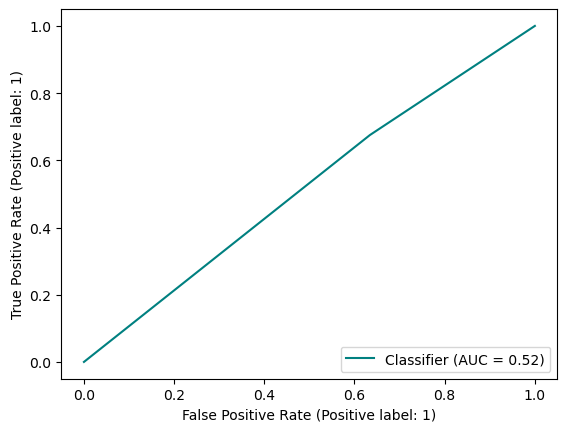

In [871]:
#plotting ROC AUC 
from sklearn.metrics import RocCurveDisplay

y_pred = svc_clf.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred, color = 'teal') 
plt.show()

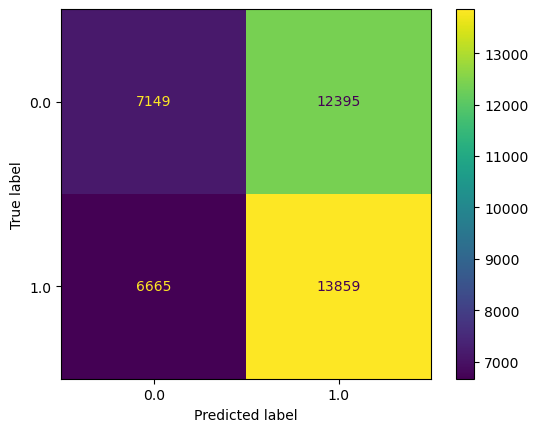

In [36]:
#plotting confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred, labels = svc_clf.classes_)
conf_matrix_plot = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = svc_clf.classes_)

conf_matrix_plot.plot()
plt.grid(False)
plt.show()

------------------------------------------------------------
# Model - Random Forest Classifier

Due to computational constraints (time) a limited coarse grid search was done. These parameters are likely not optimal but cover a small range of possibilities. The parameter grid search values covered more conservative values in order to reduce the chance of overfitting.

The following parameters will be tuned:
- n_estimators
- min_samples_split
- max_depth

In [143]:
#completing grid search

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {'max_depth' : [15,25],
              'n_estimators' : [200,500],
              'min_samples_split' : [25,50]
}

grid_search_cv= GridSearchCV(RandomForestClassifier(random_state = 42), param_grid, verbose = 3, cv = 2)

grid_search_cv.fit(X_train, y_train)

print('The best paramaters are: ', grid_search_cv.best_params_)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV 1/2] END max_depth=15, min_samples_split=25, n_estimators=200;, score=0.528 total time= 2.3min
[CV 2/2] END max_depth=15, min_samples_split=25, n_estimators=200;, score=0.530 total time= 2.3min
[CV 1/2] END max_depth=15, min_samples_split=25, n_estimators=500;, score=0.530 total time= 5.8min
[CV 2/2] END max_depth=15, min_samples_split=25, n_estimators=500;, score=0.531 total time= 5.7min
[CV 1/2] END max_depth=15, min_samples_split=50, n_estimators=200;, score=0.530 total time= 2.1min
[CV 2/2] END max_depth=15, min_samples_split=50, n_estimators=200;, score=0.530 total time= 2.2min
[CV 1/2] END max_depth=15, min_samples_split=50, n_estimators=500;, score=0.531 total time= 5.4min
[CV 2/2] END max_depth=15, min_samples_split=50, n_estimators=500;, score=0.531 total time= 5.5min
[CV 1/2] END max_depth=25, min_samples_split=25, n_estimators=200;, score=0.533 total time= 3.0min
[CV 2/2] END max_depth=25, min_samples_split=25, 

In [144]:
#building and fitting model from best parameters output by the grid search. 

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators = 500, min_samples_split = 25, max_depth = 25, random_state = 42)

rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=25, n_estimators=500,
                       random_state=42)

<br>
<br>
Below we can see that the model did out perform a random guess (>50%). However, when looking at precision it only outperformed on the test set, the walk forward set actually performed worse. This shows that it is having a tough time applying the model to the current market conditions. This may be a sign of lack of robustness, or just that the current market conditions lack predictive properties. The performance over class 0 vs class 1 is comparable with the exception of recall. The recall is better for class 1, which given the accuracy being lower (~50%) shows that model is favoring class 1 when it makes predictions.

In [241]:
#evaluating the model
model_evaluation(rnd_clf, X_test, y_test, X_wf, y_wf)

Model: RandomForestClassifier

Test metrics:
Accuracy        53.69
Precision    0: 53.23  1: 53.98
Recall       0: 41.75  1: 65.07

Walk forward metrics:
Accuracy        48.26
Precision    0: 46.55  1: 49.21
Recall       0: 33.94  1: 62.16


<br>
<br>
The model was now looked into with an increased probability threshold. After playing around with it 55% provided the best results when weighing % samples used and the increase in accuracy. Below we can immediately see that the % of samples used drops significantly and it is now only using 32% and 25% of the samples. Additionally, we can see that the precision for the test set does drastically increase while also seeing a sizeable increase in the walk forward set (only class 1) as well. However, due to the significant drop in samples the increased performance likely won't produce more profits when implemented into a trading strategy (these calculations were explored outside this notebook).

In [242]:
#evaluating the model using a probability threshold of 55%
model_evaluation_probas(rnd_clf, X_test, y_test,  X_wf, y_wf, .55)

Model: RandomForestClassifier

Test metrics:
% Samples Used  32.12
Accuracy        57.57
Precision    0: 55.95  1: 58.3
Recall       0: 37.77  1: 74.52

 Walkforward metrics:
% Samples Used  25.45
Accuracy        50.09
Precision    0: 46.3  1: 51.67
Recall       0: 28.51  1: 69.8


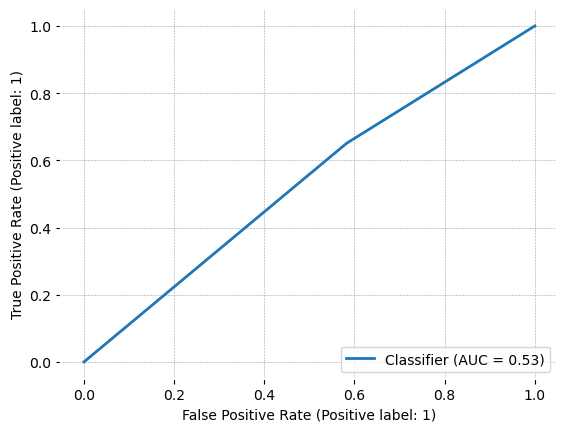

In [249]:
#plotting ROC AUC 
from sklearn.metrics import RocCurveDisplay

y_pred = rnd_clf.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred) 
plt.show()

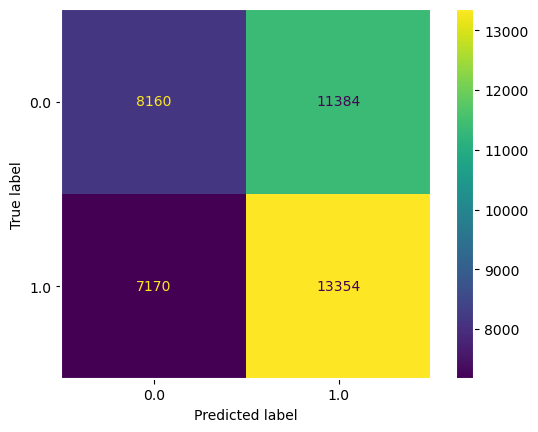

In [248]:
#plotting confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred, labels = rnd_clf.classes_)
conf_matrix_plot = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = rnd_clf.classes_)

conf_matrix_plot.plot()
plt.grid(False)
plt.show()

------------------------------------------------------------
# Model - Gradient Boosting Classifier

I initially tried to do a normal gradient boosting model, however as it took a significant amount of time to train just 1 iteration of a model. This became a problem as it became extremely difficult to optimize the model. To get around this, I elected to use histogram based gradient boosting. This technique significantly increases the training speed of the models at a tradeoff for performance. As I wouldn't be able to optimize the normal gradient boosting very much, I deemed this trade off was worth it.

The following parameters will be tuned:
- max_iter - This was set to a static value of 1000. Per outputs from the training models they would usually early stop and never come close to this. Ex in the final model it only completed 29 iterations. As such didn't experiment with any other values here.
- learning_rate
- max_depth


In [154]:
#completing initial coarse grid search

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier

param_grid = {'max_depth' : [5,10,25,50,100,200,400,800],
              'max_iter' : [1000],
              'learning_rate' : [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
}

grid_search_cv4= GridSearchCV(HistGradientBoostingClassifier(random_state = 42), param_grid, verbose = 1, cv = 2)

grid_search_cv4.fit(X_train, y_train)

print('The best paramaters are: ', grid_search_cv4.best_params_)

Fitting 2 folds for each of 80 candidates, totalling 160 fits
The best paramaters are:  {'learning_rate': 0.1, 'max_depth': 25, 'max_iter': 1000}


In [155]:
#completing refined grid search

param_grid = {'max_depth' : [15,20,25,30,35,40,45],
              'max_iter' : [1000],
              'learning_rate' : [0.05,0.1,0.15]
}

grid_search_cv4= GridSearchCV(HistGradientBoostingClassifier(random_state = 42), param_grid, verbose = 1, cv = 2)

grid_search_cv4.fit(X_train, y_train)

print('The best paramaters are: ', grid_search_cv4.best_params_)

Fitting 2 folds for each of 21 candidates, totalling 42 fits
The best paramaters are:  {'learning_rate': 0.1, 'max_depth': 15, 'max_iter': 1000}


In [156]:
#completing refined grid search

param_grid = {'max_depth' : [10,11,12,13,14,15,16,17,18,18,20],
              'max_iter' : [1000],
              'learning_rate' : [0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14]
}

grid_search_cv4= GridSearchCV(HistGradientBoostingClassifier(random_state = 42), param_grid, verbose = 1, cv = 2)

grid_search_cv4.fit(X_train, y_train)

print('The best paramaters are: ', grid_search_cv4.best_params_)

Fitting 2 folds for each of 99 candidates, totalling 198 fits
The best paramaters are:  {'learning_rate': 0.09, 'max_depth': 10, 'max_iter': 1000}


In [157]:
#completing final grid search

param_grid = {'max_depth' : [5,6,7,8,9,10],
              'max_iter' : [1000],
              'learning_rate' : [0.06,0.07,0.08,0.09,0.1,0.11,0.12]
}

grid_search_cv4= GridSearchCV(HistGradientBoostingClassifier(random_state = 42), param_grid, verbose = 1, cv = 2)

grid_search_cv4.fit(X_train, y_train)

print('The best paramaters are: ', grid_search_cv4.best_params_)

Fitting 2 folds for each of 42 candidates, totalling 84 fits
The best paramaters are:  {'learning_rate': 0.08, 'max_depth': 6, 'max_iter': 1000}


In [159]:
#building and fitting model from best parameters output by the grid search. 

from sklearn.ensemble import HistGradientBoostingClassifier
histgbrt_clf = HistGradientBoostingClassifier(max_iter=1000, learning_rate = 0.08, max_depth = 6, verbose = 1, random_state = 42).fit(X_train, y_train)

Binning 0.043 GB of training data: 0.777 s
Binning 0.005 GB of validation data: 0.011 s
Fitting gradient boosted rounds:
[1/1000] 1 tree, 31 leaves, max depth = 6, train loss: 0.69231, val loss: 0.69257, in 0.042s
[2/1000] 1 tree, 31 leaves, max depth = 6, train loss: 0.69187, val loss: 0.69237, in 0.043s
[3/1000] 1 tree, 31 leaves, max depth = 6, train loss: 0.69152, val loss: 0.69220, in 0.038s
[4/1000] 1 tree, 31 leaves, max depth = 6, train loss: 0.69116, val loss: 0.69206, in 0.041s
[5/1000] 1 tree, 31 leaves, max depth = 6, train loss: 0.69085, val loss: 0.69192, in 0.042s
[6/1000] 1 tree, 31 leaves, max depth = 6, train loss: 0.69056, val loss: 0.69183, in 0.042s
[7/1000] 1 tree, 31 leaves, max depth = 6, train loss: 0.69027, val loss: 0.69177, in 0.050s
[8/1000] 1 tree, 31 leaves, max depth = 6, train loss: 0.69002, val loss: 0.69163, in 0.040s
[9/1000] 1 tree, 31 leaves, max depth = 6, train loss: 0.68976, val loss: 0.69152, in 0.040s
[10/1000] 1 tree, 31 leaves, max depth = 6

<br>
<br>
Below we can see that the model did out perform a random guess (>50%). The precision and recall for prediction class 1 (upwards) are both adequate showing potential for use in a trading bot. The walk forward precision is barely above 50% showing that it is having a tougher time predicting under current market conditions. This may be a sign of lack of robustness, or just that the current market conditions lack predictive properties. 

We can see that the performance over class 0 (downwards) is not as great. First of all, the accuracy for the walk forward set is worse than a random guess. Secondly, the recall for both of them is quiet low. Now this isn't as important but only getting ~30% of the total true class 0 is not ideal as it would be missing a lot of potential trades.

In [217]:
#evaluating the model
model_evaluation(histgbrt_clf, X_test, y_test, X_wf, y_wf)

Model: HistGradientBoostingClassifier

Test metrics:
Accuracy        52.55
Precision    0: 52.09  1: 52.76
Recall       0: 33.82  1: 70.39

Walkforward metrics:
Accuracy        50.13
Precision    0: 48.89  1: 50.59
Recall       0: 27.0  1: 72.59


<br>
<br>
The model was now looked into with an increased probability threshold. After playing around with it 55% provided the best results when weighing % samples used and the increase in accuracy. Looking at the results we can immediately see that the % of samples used drops significantly and it is now only using 12% and 4.6% of the samples. Additionally, we can see that the precision for the test set does drastically increase however due to the fact there is a large decrease in the number of samples/trades the increased precision likely won't produce more profits when implemented in a trading strategy. We can also see that this increased performance doesn't carry over to the walk forward set. However, this may just be due to the fact that the sample size is small so this accuracy may not be representative of the true accuracy.


In [218]:
#evaluating the model using a probability threshold of 55%
model_evaluation_probas(histgbrt_clf, X_test, y_test,  X_wf, y_wf, .55)

Model: HistGradientBoostingClassifier

Test metrics:
% Samples Used  12.07
Accuracy        58.59
Precision    0: 58.28  1: 58.66
Recall       0: 23.13  1: 86.82

Walkforward metrics:
% Samples Used  4.67
Accuracy        45.88
Precision    0: 52.17  1: 45.03
Recall       0: 11.32  1: 87.5


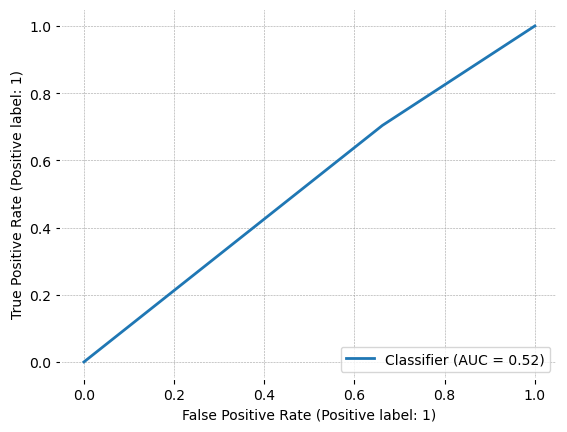

In [250]:
#plotting ROC AUC 
y_pred = histgbrt_clf.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred) 
plt.show()

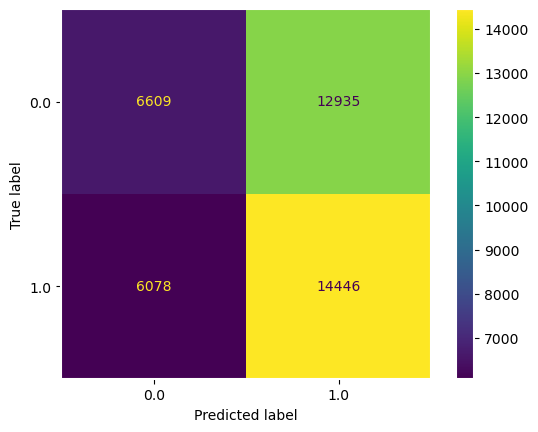

In [251]:
#plotting confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels = histgbrt_clf.classes_)
conf_matrix_plot = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = histgbrt_clf.classes_)

conf_matrix_plot.plot()
plt.grid(False)
plt.show()

------------------------------------------------------------
# Model - XGBoost

Due to computational constraints (time) a limited coarse grid search was done. These parameters are likely not optimal but cover a small range of possibilities. The parameter grid search values covered more conservative values in order to reduce the chance of overfitting.

The following parameters will be tuned:
- n_estimators
- min_samples_split
- max_depth

In [221]:
#completing grid search

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {'max_depth' : [6,10],
              'n_estimators' : [200,500,800],
              'learning_rate' : [.1,.3]
}

grid_search_cv5= GridSearchCV(XGBClassifier(tree_method='approx', max_bin=255, random_state = 42), param_grid, verbose = 1, cv = 2)

grid_search_cv5.fit(X_train, y_train)

print('The best paramaters are: ', grid_search_cv5.best_params_)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
The best paramaters are:  {'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 800}


In [223]:
#building and fitting model from best parameters output by the grid search. 

from xgboost import XGBClassifier

xgb_clf = XGBClassifier(tree_method='approx', max_bin=255, random_state = 42,
                        n_estimators=800, max_depth = 10, learning_rate = 0.3)

xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=255,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=800, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

<br>
<br>
Below we can see that the model did out perform a random guess (>50%). However, when looking at precision it only outperformed on the test set, the walk forward set actually performed worse than a random guess. This shows that it is having a tough time applying the model to the current market conditions. This may be a sign of lack of robustness, or just that the current market conditions lack predictive properties.  The performance over class 0 vs class 1 is comparable across most metrics. This shows that the model appears fairly balanced and isn't favoring one class vs the other.


In [234]:
#evaluating the model
model_evaluation(xgb_clf, X_test, y_test, X_wf, y_wf)

Model: XGBClassifier

Test metrics:
Accuracy        53.74
Precision    0: 52.66  1: 54.69
Recall       0: 50.92  1: 56.42

Walk forward metrics:
Accuracy        49.24
Precision    0: 48.41  1: 49.98
Recall       0: 46.04  1: 52.35


<br>
<br>
The model was now looked into with an increased probability threshold. After playing around with it 60% provided the best results when weighing % samples used and the increase in accuracy. Looking at the results we can see this model performed the best with increased probability thresholds. We see a modest increase in accuracy and precision across the board with the exception of the recall on class 0 in the walk forward set. Also we can see that the % of samples used didn't fall nearly as much as the previous models. That being said, still the loss of additional samples likely won't warrant the increase in accuracy, similar to the models above. We would have needed to retain ~90% of the samples under the 60% probability threshold to see an increase in profitability.

As the results for the adjusted probability thresholds have been strong on this model, below also summarizes the results if a 80% probability threshold was used. We can see that it did still maintain a decent portion of the samples given such a large threshold, however we would have needed to maintain 60% of the samples to be more profitable.

It is appearing unlikely that any probability thresholds will be worthwhile for the models, but it is still worthwhile to look into.  


In [59]:
#evaluating the model using a probability threshold of 60%
model_evaluation_probas(xgb_clf, X_test, y_test,  X_wf, y_wf, .6)

Model: XGBClassifier

Test metrics:
% Samples Used  77.81
Accuracy        54.6
Precision    0: 53.7  1: 55.39
Recall       0: 51.2  1: 57.85

 Walkforward metrics:
% Samples Used  77.22
Accuracy        49.25
Precision    0: 47.35  1: 50.9
Recall       0: 45.61  1: 52.65


In [57]:
#evaluating the model using a probability threshold of 80%
model_evaluation_probas(xgb_clf, X_test, y_test,  X_wf, y_wf, .8)

Model: XGBClassifier

Test metrics:
% Samples Used  33.28
Accuracy        57.07
Precision    0: 55.99  1: 57.93
Recall       0: 51.62  1: 62.15

 Walkforward metrics:
% Samples Used  30.91
Accuracy        50.19
Precision    0: 48.81  1: 51.37
Recall       0: 46.01  1: 54.17


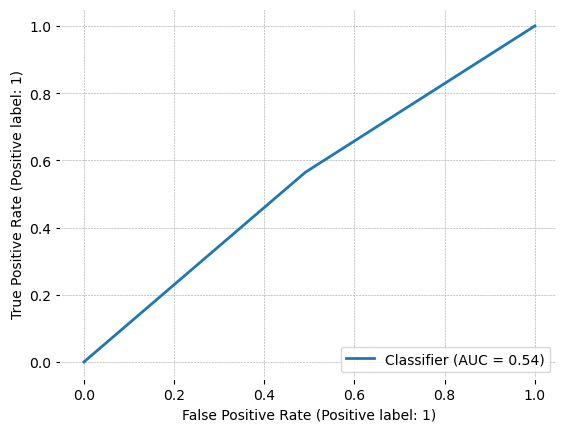

In [252]:
#plotting ROC AUC 
y_pred = xgb_clf.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred) 
plt.show()

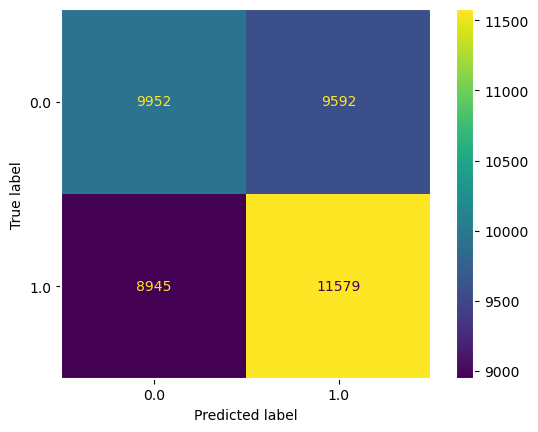

In [253]:
#plotting confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels = xgb_clf.classes_)
conf_matrix_plot = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = xgb_clf.classes_)

conf_matrix_plot.plot()
plt.grid(False)
plt.show()

------------------------------------------------------------
# Model - Neural Network

Due to computational constraints (time) a limited coarse grid search was done. These parameters are likely not optimal but cover a small range of possibilities. The parameter grid search values covered more conservative values in order to reduce the chance of overfitting.

The following parameters will be tuned:
- number of neurons per layer
- number of hidden layers
- activation function

In [97]:
#splitting data into train and validation sets

from sklearn.model_selection import train_test_split
X_train_nn, X_valid, y_train_nn, y_valid = train_test_split(X_train,y_train, test_size = 0.1, random_state = 0)

In [208]:
#defining the structure of the model

import tensorflow as tf
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)

def build_model(n_hidden=1, n_neurons=50, learning_rate=3e-3, input_shape=[X_train.shape[1]]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
        model.add(keras.layers.Dropout(rate = 0.2))
    model.add(keras.layers.Dense(1, activation = 'sigmoid'))
    optimizer = keras.optimizers.Adam(lr=learning_rate)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics = ['accuracy'])
    return model

In [209]:
#setting up the model in a wrapper
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [210]:
#completing grid search

from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
"n_hidden": [2,4,6],
"n_neurons": [50,200],
"learning_rate": [3e-4, 3e-3, 3e-2, 3e-1],
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, cv=2, verbose = 3, n_jobs = -1)
rnd_search_cv.fit(X_train_nn, y_train_nn, epochs=30,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Epoch 1/30
4508/4508 [==============================] - 24s 4ms/step - loss: 0.6935 - accuracy: 0.5163 - val_loss: 0.6910 - val_accuracy: 0.5287
Epoch 2/30
4508/4508 [==============================] - 17s 4ms/step - loss: 0.6920 - accuracy: 0.5216 - val_loss: 0.6923 - val_accuracy: 0.5286
Epoch 3/30
4508/4508 [==============================] - 18s 4ms/step - loss: 0.6921 - accuracy: 0.5205 - val_loss: 0.6910 - val_accuracy: 0.5289
Epoch 4/30
4508/4508 [==============================] - 16s 4ms/step - loss: 0.6919 - accuracy: 0.5226 - val_loss: 0.6911 - val_accuracy: 0.5279
Epoch 5/30
4508/4508 [==============================] - 17s 4ms/step - loss: 0.6919 - accuracy: 0.5219 - val_loss: 0.6908 - val_accuracy: 0.5272
Epoch 6/30
4508/4508 [==============================] - 16s 4ms/step - loss: 0.6919 - accuracy: 0.5189 - val_loss: 0.6914 - val_accuracy: 0.5172
Epoch 7/30
4508/4508 [==============================] - 17s 4ms/step 

RandomizedSearchCV(cv=2,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000002BA0685F1C0>,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.0003, 0.003, 0.03,
                                                          0.3],
                                        'n_hidden': [2, 4, 6],
                                        'n_neurons': [50, 200]},
                   verbose=3)

In [211]:
print('The best paramaters are: ', rnd_search_cv.best_params_)

The best paramaters are:  {'n_neurons': 50, 'n_hidden': 2, 'learning_rate': 0.003}


In [62]:
#building and fitting model from best parameters output by the grid search. 

import tensorflow as tf
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)

#building model
nn_model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[X_train.shape[1]]),
    keras.layers.Dense(50,activation = 'relu'),
    keras.layers.Dropout(rate = 0.2),
    keras.layers.Dense(50,activation = 'relu'),
    keras.layers.Dropout(rate = 0.2),
    keras.layers.Dense(1, activation = 'sigmoid')
])

optimizer = keras.optimizers.Adam(lr=3e-3)
nn_model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics = ['accuracy'])

nn_history = nn_model.fit(X_train, y_train, epochs = 100, 
                          validation_data = (X_valid, y_valid), 
                          callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
5009/5009 [==============================] - 14s 3ms/step - loss: 0.6931 - accuracy: 0.5205 - val_loss: 0.6917 - val_accuracy: 0.5275
Epoch 2/100
5009/5009 [==============================] - 12s 2ms/step - loss: 0.6921 - accuracy: 0.5220 - val_loss: 0.6914 - val_accuracy: 0.5184
Epoch 3/100
5009/5009 [==============================] - 12s 2ms/step - loss: 0.6920 - accuracy: 0.5204 - val_loss: 0.6916 - val_accuracy: 0.5314
Epoch 4/100
5009/5009 [==============================] - 13s 2ms/step - loss: 0.6920 - accuracy: 0.5205 - val_loss: 0.6907 - val_accuracy: 0.5306
Epoch 5/100
5009/5009 [==============================] - 12s 2ms/step - loss: 0.6917 - accuracy: 0.5228 - val_loss: 0.6906 - val_accuracy: 0.5306
Epoch 6/100
5009/5009 [==============================] - 12s 2ms/step - loss: 0.6919 - accuracy: 0.5196 - val_loss: 0.6914 - val_accuracy: 0.5234
Epoch 7/100
5009/5009 [==============================] - 11s 2ms/step - loss: 0.6919 - accuracy: 0.5206 - val_loss: 0.6908 -

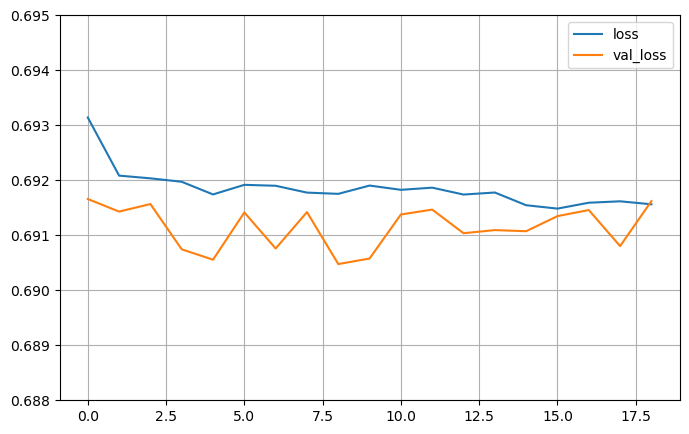

In [77]:
#plotting the loss and validation loss from training
pd.DataFrame(nn_history.history)[['loss','val_loss']].plot(figsize=(8, 5))

plt.grid(True)
plt.gca().set_ylim(.688, .695) # set the vertical range to [0-1]
plt.show()

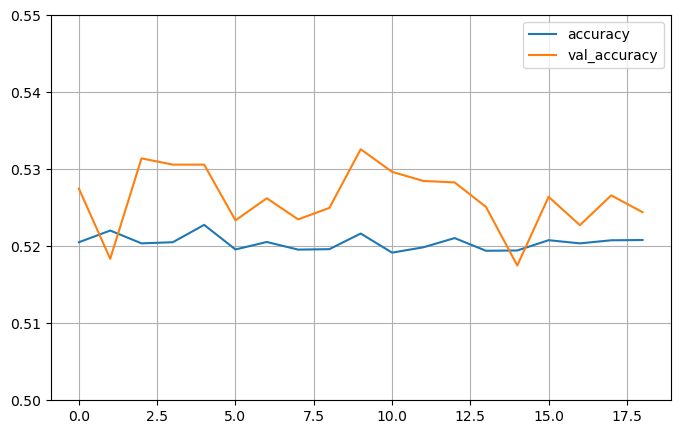

In [78]:
#plotting the accuracy and validation accuracy from training
pd.DataFrame(nn_history.history)[['accuracy','val_accuracy']].plot(figsize=(8, 5))

plt.grid(True)
plt.gca().set_ylim(.50, .55) # set the vertical range to [0-1]
plt.show()

<br>
<br>

Looking at the results below we can see that the model does predict better than a random guess across the board which is great to see. However, there is a major issue. The recall is significantly lower for class 0 then class 1. Given the accuracy being around 50%, this shows that our model is favoring predicting a 1 almost every time. This is a huge flaw and shows a significant bias in the model.

In [87]:
#evaluating the model
model_evaluation(nn_model, X_test, y_test, X_wf, y_wf)

1253/1253 [==============================] - 2s 1ms/step
Model: <keras.engine.sequential.Sequential object at 0x0000021854781B70>

Test metrics:
Accuracy        51.8
Precision    0: 55.05  1: 51.6
Recall       0: 6.44  1: 94.99
130/130 [==============================] - 0s 1ms/step

Walk forward metrics:
Accuracy        50.78
Precision    0: 56.25  1: 50.76
Recall       0: 0.44  1: 99.67


<br>
<br>

Implementing a probability threshold does not change the fact that there is still a huge bias in the recall. All the other stats here follow similar trends to previous models and not much to state - large drop in samples used but increase in test precision, but overall not enough of a change to be more profitable.

In [91]:
##evaluating the model using a probability threshold of 51%
model_evaluation_probas(nn_model, X_test, y_test,  X_wf, y_wf, .51)

1253/1253 [==============================] - 2s 1ms/step
Model: <keras.engine.sequential.Sequential object at 0x0000021854781B70>

Test metrics:
% Samples Used  27.98
Accuracy        55.0
Precision    0: 55.61  1: 54.94
Recall       0: 11.24  1: 92.35
130/130 [==============================] - 0s 1ms/step

 Walkforward metrics:
% Samples Used  7.17
Accuracy        51.01
Precision    0: 33.33  1: 51.19
Recall       0: 0.69  1: 98.69


1253/1253 [==============================] - 2s 2ms/step


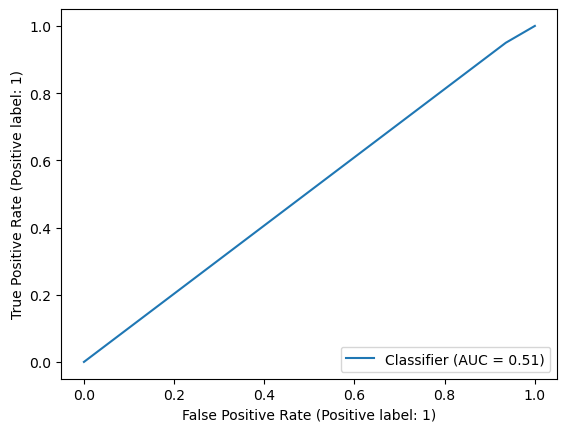

In [98]:
#plotting ROC AUC 
y_pred = nn_model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0).flatten()
RocCurveDisplay.from_predictions(y_test, y_pred) 
plt.show()

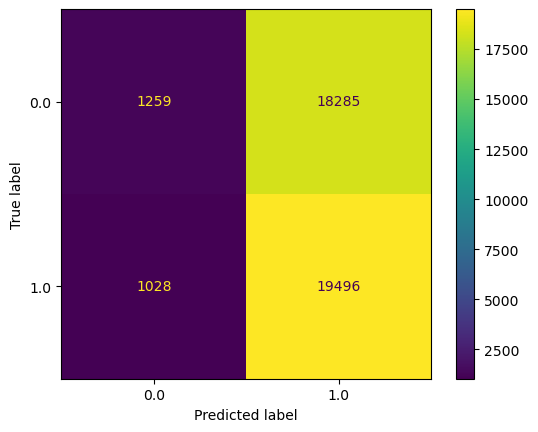

In [99]:
#plotting confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels = xgb_clf.classes_)
conf_matrix_plot = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = xgb_clf.classes_)

conf_matrix_plot.plot()
plt.grid(False)
plt.show()

------------------------------------------------------------
# Model - Long Short-Term Memory Network (LSTM)

Due to the complexity of training a LSTM model I wasn't able to fine tune the parameters through grid search due to the significant amount of time it would take to complete. Rather than that I ran a few models and tried to determine what appeared be the best parameters by small batch trial and error. The parameters of this model was used below.

When experimenting, the following parameters were looked into:
- number of neurons per layer
- number of hidden layers
- activation function

In [201]:
#building model

from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

np.random.seed(42)
tf.random.set_seed(42)

lstm_model=Sequential()
lstm_model.add(LSTM(units = 50, return_sequences=True, input_shape=(X_train.shape[1],1)))
lstm_model.add(Dropout(0.2)) 
lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.2)) 
lstm_model.add(Dense(1, activation='sigmoid'))


In [202]:
#fitting model

lstm_model.compile(loss='binary_crossentropy',optimizer='adam', metrics = ['accuracy'])
lstm_history = lstm_model.fit(X_train, y_train, epochs = 20, validation_data = (X_test, y_test))

Epoch 1/20
5009/5009 [==============================] - 201s 38ms/step - loss: 0.6928 - accuracy: 0.5130 - val_loss: 0.6924 - val_accuracy: 0.5185
Epoch 2/20
5009/5009 [==============================] - 182s 36ms/step - loss: 0.6919 - accuracy: 0.5207 - val_loss: 0.6920 - val_accuracy: 0.5180
Epoch 3/20
5009/5009 [==============================] - 187s 37ms/step - loss: 0.6917 - accuracy: 0.5233 - val_loss: 0.6918 - val_accuracy: 0.5210
Epoch 4/20
5009/5009 [==============================] - 185s 37ms/step - loss: 0.6916 - accuracy: 0.5234 - val_loss: 0.6914 - val_accuracy: 0.5254
Epoch 5/20
5009/5009 [==============================] - 184s 37ms/step - loss: 0.6915 - accuracy: 0.5242 - val_loss: 0.6918 - val_accuracy: 0.5241
Epoch 6/20
5009/5009 [==============================] - 182s 36ms/step - loss: 0.6915 - accuracy: 0.5243 - val_loss: 0.6913 - val_accuracy: 0.5234
Epoch 7/20
5009/5009 [==============================] - 181s 36ms/step - loss: 0.6914 - accuracy: 0.5247 - val_loss: 0

<br>
<br>
Below we can see that the model did out perform a random guess (>50%). However, when looking at precision it barely outperformed a random guess for class 1 and class 0 did not. This shows that it is having a tough time applying the model to the current market conditions. This may be a sign of lack of robustness, or just that the current market conditions lack predictive properties.  The performance over class 0 vs class 1 is comparable with the exception of recall. The recall is better for class 1, which given the accuracy being lower (~50%) shows that model is favoring class 1 when it makes predictions.

In [237]:
#evaluating the model
model_evaluation(lstm_model, X_test, y_test, X_wf, y_wf)

1253/1253 [==============================] - 19s 11ms/step
Model: <keras.engine.sequential.Sequential object at 0x000002B9128A9750>

Test metrics:
Accuracy        52.58
Precision    0: 52.13  1: 52.78
Recall       0: 33.91  1: 70.35
130/130 [==============================] - 6s 12ms/step

Walk forward metrics:
Accuracy        50.2
Precision    0: 49.08  1: 50.66
Recall       0: 28.81  1: 70.98


<br>
<br>
The model was now looked into with an increased probability threshold. After playing around with it 52% provided the best results when weighing % samples used and the increase in accuracy. Looking at the results we can immediately see that the % of samples used drops in almost half. Additionally, we can see that the precision increases for the test set but there is little change on the walk forward set. The recall remains fairly consistent with the changes. However, like the models above, the increased precision does not make up for the loss of potential trades.


In [96]:
#evaluating the model using a probability threshold of 52%
model_evaluation_probas(lstm_model, X_test, y_test,  X_wf, y_wf, .52)

1253/1253 [==============================] - 18s 14ms/step
Model: <keras.engine.sequential.Sequential object at 0x0000021836A6EE00>

Test metrics:
% Samples Used  56.35
Accuracy        54.27
Precision    0: 54.33  1: 54.26
Recall       0: 29.61  1: 77.03
130/130 [==============================] - 2s 14ms/step

 Walkforward metrics:
% Samples Used  49.77
Accuracy        50.12
Precision    0: 49.2  1: 50.37
Recall       0: 21.07  1: 78.64


1253/1253 [==============================] - 20s 12ms/step


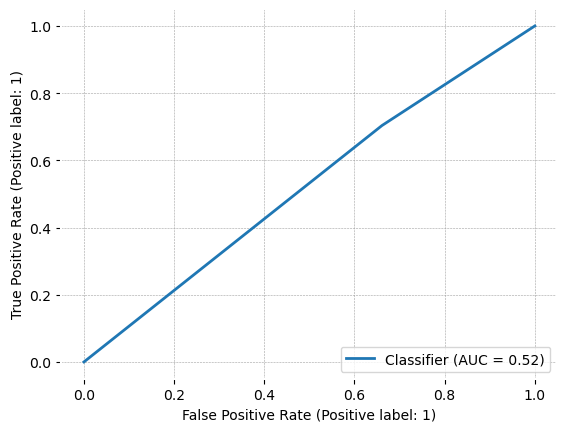

In [254]:
#plotting ROC AUC 
y_pred = lstm_model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0).flatten()
RocCurveDisplay.from_predictions(y_test, y_pred) 
plt.show()

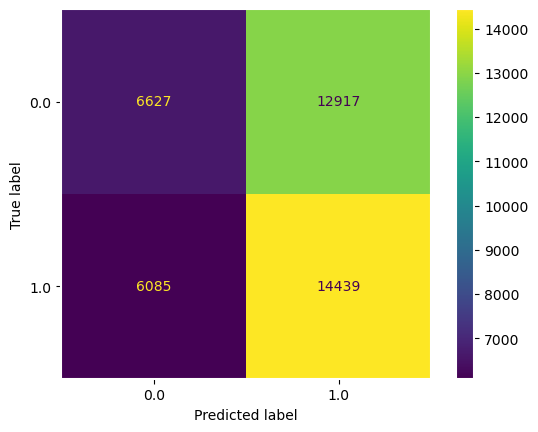

In [256]:
#plotting confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels = xgb_clf.classes_)
conf_matrix_plot = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = xgb_clf.classes_)

conf_matrix_plot.plot()
plt.grid(False)
plt.show()

------------------------------------------------------------
# Model - Hard Voting Classifier

The last model looked into is an ensemble of the models above in a hard voting classifier. By grouping all their predictions together, the hope is that we end up with a more accurate prediction then before with less bias. All models were included in this ensemble except for the neural network due to its extreme bias to classify everything as 1. As we are using 5 of the 6 models, 3 votes will be needed to determine the chosen class for each prediction.

In [34]:
#creating a function to represent the voting classifier.
def hard_voting_classifier_predict(models, vote_threshold, X_test):
    #setting up an array of appropriate size
    pred_array = np.zeros(len(X_test))
    
    for model in models:

        model_name = str(model).split('(')[0]
          
        #making predictions and an adjustment for keras models to get predictions formatted
        pred = model.predict(X_test)
        if model_name[1:6] == 'keras':
            pred = np.where(pred > 0.5, 1, 0).flatten()

        #stacking current predictions onto the running array
        pred_array = np.vstack([pred_array, pred])
    
    #calculating predictions by summing all the arrays down their columns. Any sums beyond 3 are classified as 1.
    pred = np.where(pred_array.sum(axis = 0) >= vote_threshold, 1, 0)
    
    return pred

In [35]:
#creating a function to evaluate the voting classifiers results
def hard_voting_classifier_evaluate(preds, y_test):
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds, average = None)
    recall = recall_score(y_test, preds, average = None)
    print('Model: Hard Voting Ensemble')
    print('Accuracy       ', round(accuracy*100,2))
    print('Precision    0:', round(precision[0]*100,2), ' 1:',  round(precision[1]*100, 2))
    print('Recall       0:', round(recall[0]*100,2), ' 1:',  round(recall[1]*100, 2))

#### Majroity Vote - 3 or more of the 5

From below we can see the ensemble performs fairly well. It has done good over the test set having strong precision across both classes. The recall being biased towards class 1 is still prevalent though. This recall issue carries over into the walk forward set as well. We can see that the walk forward set didn't produce as good of metrics as the test set. Particularly the class 0 precision is below 50%, however we are not too concerned about that anyways. The class 1 accuracy is only slight above 50%, however this appears to be the trend as most models above followed the same pattern.
<br>
<br>

In [50]:
#test set predictions - majority vote - 3 or more
y_pred_test = hard_voting_classifier_predict([rnd_clf, xgb_clf, histgbrt_clf, lstm_model, svc_clf], 3, X_test)

1253/1253 [==============================] - 14s 11ms/step


In [47]:
#walk forward set predictions - majority vote - 3 or more
y_pred_wf = hard_voting_classifier_predict([rnd_clf, xgb_clf, histgbrt_clf, lstm_model, svc_clf], 3, X_wf)

130/130 [==============================] - 2s 12ms/step


In [51]:
#test set results - majority vote - 3 or more
hard_voting_classifier_evaluate(y_pred_test, y_test)

Model: Hard Voting Ensemble
Accuracy        52.95
Precision    0: 52.65  1: 53.1
Recall       0: 35.3  1: 69.76


In [52]:
#walk forward set results - majority vote - 3 or more
hard_voting_classifier_evaluate(y_pred_wf, y_wf)

Model: Hard Voting Ensemble
Accuracy        50.01
Precision    0: 48.74  1: 50.52
Recall       0: 28.27  1: 71.12


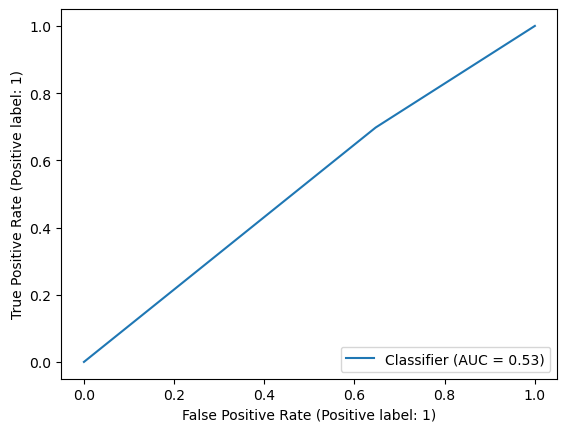

In [65]:
#plotting ROC AUC 
RocCurveDisplay.from_predictions(y_test, y_pred_test) 
plt.show()

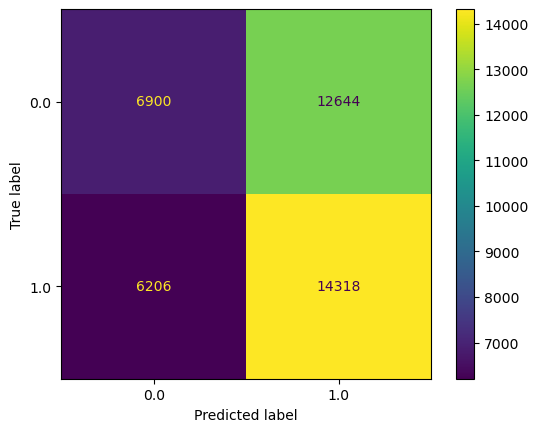

In [66]:
#plotting confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test, labels = svc_clf.classes_)
conf_matrix_plot = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = svc_clf.classes_)

conf_matrix_plot.plot()
plt.grid(False)
plt.show()

#### Beyond Vote - 4 or more of the 5

As an experiment I thought I would look into making the voting classifier stricter for producing class 1 predictions in order to try and balance out the models bias to pick class 1. Note that due to how the functions were created, our class 0 stats are not usable. In our function it would now treat anything with 2 votes or more a class 0, which in reality should be 4 votes to be comparable with class 1 requirements. So for the purpose of the analysis, we will not look at class 0.

By increasing the voting threshold to 4 we can see that it did even out the recall, getting them to be more comparable numbers, while it also improved the accuracy over the test set. This would be expected as we are making the model need stronger evidence to predict class 1. 

The this adjusted model does appear to perform a bit better. However, per some quick research I wasn't able to find any information on adjusting the voting thresholds and if it is an appropriate method to do. As such I decided to not use this model going forward, but thought it showed some interesting potential so kept the experiment in.
<br>
<br>

In [48]:
#test set predictions - 4 votes or more
y_pred_test_adj = hard_voting_classifier_predict([rnd_clf, xgb_clf, histgbrt_clf, lstm_model, svc_clf], 4, X_test)

1253/1253 [==============================] - 15s 12ms/step


In [49]:
#walk forward set predictions - 4 votes or more
y_pred_wf_adj = hard_voting_classifier_predict([rnd_clf, xgb_clf, histgbrt_clf, lstm_model, svc_clf], 4, X_wf)

130/130 [==============================] - 2s 14ms/step


In [53]:
#test set results - 4 votes or more
hard_voting_classifier_evaluate(y_pred_test_adj, y_test)

Model: Hard Voting Ensemble
Accuracy        53.74
Precision    0: 52.65  1: 54.73
Recall       0: 51.29  1: 56.07


In [54]:
#walk forward set results - 4 votes or more
hard_voting_classifier_evaluate(y_pred_wf_adj, y_wf)

Model: Hard Voting Ensemble
Accuracy        49.34
Precision    0: 48.47  1: 50.07
Recall       0: 44.87  1: 53.67


### ----------------------------------------------------------------------------------------------------------------------------------------------------------
# Model Evaluation & Selection
### ----------------------------------------------------------------------------------------------------------------------------------------------------------

Now that we have ran and calculated the key metrics for each model, we can summarize the information and choose the optimal model. 

As mentioned earlier, predicting the stock market is an incredibly complex endeavor and as a result of this any accuracy over a random guess can be profitable. As such when looking at baseline model evaluation we first want to make sure the predictions are producing accuracy over 50%. As we are looking for buy opportunities we want to ensure the metrics around class 1 are good as these represent the target for upwards direction in the market - if we are buying we want to have confidence that the market is going up. 

So primarily, we are concerned with the precision in class 1 as this shows how many of our class 1 predictions (upwards) are in fact true. Remember these will be a buy signal for the strategy developed later on. Secondly, we will also consider the recall of class 1 as this represents what % of the total true class 1 predictions we got correct. We want to ensure we are catching as many trades as possible.

We will consider both the test and walk forward set metrics for the model selection. See below charts for summary of both test and walk forward metrics for each model.

Looking at recall for class 1 we see a fairly wide range of values, with most falling between the 60-70% range. This is consistent between both data sets. Two clear outliers exist, the XGBoost and the neural network. The XGBoost recall is the lowest of the group, however this isn't necessarily a bad thing. Given our accuracy numbers this shows that the model has less bias to output class 1 predictions, and is a bit more balanced. The other models will have more imbalance in their predictions (more class 1 then class 0). The neural network has an extremely high recall of 95% & 99.67%. This shows that the model has extreme bias and is almost always just outputting class 1 predictions. This is a huge issue as it isn't showing much predictive properties and as such is an immediate scratch from the possible models.

Under the test set we can see that the XGBoost and random forest had the best precision, falling around ~54%. This is 1-2% better than all the other models as they are around ~52-53%. This difference is significant given how close we are to a random guess (50%). However, over the walk forward set the XGBoost and random forest performed the worst, both falling below 50%. This is concerning as it is shows that the models may not be as robust on new data or for the current market conditions. 

The other four models (Support Vector Classifier, Gradient Boosting Classifier, Long Short-Term Network, and Hard Voting Classifier) provide precision ranging from 52.76 - 53.10% over the test set and 50.59 - 51.01% over the walk forward set. It is clear that these models are all performing fairly comparable and any difference is mostly trivial. 

Taking this all into account, I believe the hard voting classifier ensemble is the best model to use. This is because it produces > 50% precision for class 1 on both the test and walk forward set, unlike the XGBoost and random forest. However, as it is an ensemble, it will contain some of their predictive properties that made it perform well on the test set conditions which is seen by it having the highest precision for class 1 amongst those remaining models (3rd highest overall). As for why the voting classifier is chosen over the other comparable performing models comes down to robustness. I believe that by using this ensemble model and incorporating all the other models, it will increase the robustness of the model and help it to predict on new unseen data better than any individual model. As such the hard voting classifier will be used as our final model.

Just as a general reminder there were computational complexities involved in building models as mentioned earlier. The results below may change significantly if I had the resources to properly optimize the model. This is likely part of the issue with the neural network producing such high recall numbers.


<h4 align="center">Test Metrics</h4> 

| Models | Accuracy |  Precision: Class 1 |  Recall: Class 1 | Precision: Class 0 |  Recall: Class 0 | 
| --- | --- | --- | --- |--- | --- |
| Support Vector Classifier | 52.43 | 52.79 | 67.53 | 51.75 | 36.58 |
| Random Forest Classifier | 53.69 | 53.98 |65.07 |53.23 | 41.75 |
| Gradient Boosting Classifier | 52.55 | 52.76 |70.39 |52.09 | 33.82 |
| XGBoost | 53.74 | 54.69|56.42 |52.66 | 50.92 |
| Neural Network | 51.80 | 51.60 |94.99 |55.05 | 6.44 |
| Long Short-Term Term Network | 52.58 | 52.78 |70.35 |52.13 | 33.91 |
| Hard Voting Classifier | 52.95 | 53.10 |69.76 |52.65 | 35.30 |


<h4 align="center">Walk Foward Metrics</h4> 

| Models | Accuracy |  Precision: Class 1 |  Recall: Class 1 | Precision: Class 0 |  Recall: Class 0 | 
| --- | --- | --- | --- |--- | --- |
| Support Vector Classifier | 50.66 | 51.01 | 69.37 | 49.88 | 31.40 |
| Random Forest Classifier | 48.26| 49.21 |62.16 |46.55 | 33.94 |
| Gradient Boosting Classifier | 50.13 | 50.59 |72.59 |48.89 | 27.00 |
| XGBoost | 49.24 | 49.98 |52.35 |48.41 |46.04 |
| Neural Network | 50.78 | 50.76 |99.67 |56.25 |0.44 |
| Long Short-Term Term Network | 50.20 | 50.66 |70.98 |49.08 | 28.81 |
| Hard Voting Classifier | 50.01 | 50.52 |71.12 |48.74 | 28.27 |


### ----------------------------------------------------------------------------------------------------------------------------------------------------------
# Strategy Creation
### ----------------------------------------------------------------------------------------------------------------------------------------------------------

Now that we know what model we are using to get our base indicator we can look at creating and implementing a day trading strategy. As mentioned earlier we will be looking for buy opportunities, or situations where our machine learning (ML) predictions output 1. Each strategy works as follows:
- Different criteria are looked into to determine if a trade should be taken (Ex. if RSI is < 30)
- One of those criteria always included is the machine learning models prediction being a 1 or up direction (using the model selected above - hard voting classifier)
- Each strategy trades 1 contract with an initial capital requirement of \\$10,000

The specific criteria are tested and the general rational is described. Note that all the experimentation is not included in this notebook as that would add a significant amount more of code and clutter the notebook up. 

As a little background, day trading strategies are extremely nuanced. Typically, strategies are developed to follow two systems, 1) mean reversion - Here the strategy is that prices are expected to return back to the mean. This would look for things like is price below the EMA, if so this is a buy indicator as we expect price to increase back to the EMA. 2) trend following - These strategies attempt to follow the current trend, if prices are rising it expects prices to continue to rise. This would look for things like is the price above the EMA, if so this is a buy indicator as prices are climbing above there mean. 

Now we can see how these strategies can be so nuanced. I just said that it can be a buy signal if price is both above or below the EMA which doesn't make a lot of sense. This is where it is important to add additional criteria to your strategies. These additional criteria will help identify if the trade is following mean reversion or momentum by checking for more support that it is expressing those properties. I will do my best to try and explain each strategy as well as I can. 

Below calculates the ML predictions over all three sets of data. That is all data, test set, and the walk forward. Note that all data is shown but this is just for greater sense of the time series and its profits. That being said, the performance over the test set and walk forward set will be the primary factors in choosing the best strategy and the performance over all data will be ignored.

It is worth noting here that the test set is roughly 2 year's worth of days and the walk forward set is 3 months or 1/4 of a year. This is useful when comparing the strategies.

Below also defines two functions for evaluating strategies. These output certain key metrics to determine which strategies perform the best.
- Profit/(loss) - This is the total profit/(loss) from the accumulation of all trades taken under the strategy
- PNL annualized - This is profit/loss but adjusted to reflect a year period. This is done so we can compare the performance over the test and walk forward set easier.
- Win % - This is the % of trades that were winners. What a good win % is varies based on the target profit and stop as a strategy may be a low win % but have large winners. In general, a 50% win % will be good unless stated otherwise.
- Sharpe ratio - This is a ratio designed to express the risk-return of a portfolio. In general, a ratio of > 1 is acceptable, > 2 is good, and > 3 is exceptional. 
- General stats for both winners and losers - count, mean, std, max, min


In [67]:
#creating a new dataframe with all the predictions in it for each set using the selected model from above
data_with_pred = data.copy()
    
#bringing in predictions calculated in voting classifier section
data_with_pred.loc[X_test.index, 'prediction_test'] = y_pred_test
data_with_pred.loc[X_wf.index, 'prediction_wf'] = y_pred_wf

#calculating predictions over all data and bringing it into the df
y_pred_all = hard_voting_classifier_predict([rnd_clf, xgb_clf, histgbrt_clf, lstm_model, svc_clf], 3, pd.concat([X, X_wf], axis = 0))
data_with_pred.loc[pd.concat([X, X_wf], axis = 0).index, 'prediction_all'] = y_pred_all

In [107]:
#the next few cells calculate the annualiztion adjustment to take to the strat_results function defined after
#total days in the backtest data
days_back = len({(i.day,i.month,i.year) for i in data_with_pred.loc[X.index, 'date']})
days_back

2699

In [102]:
#estimated days in the test set - note this approach is needed as the test set contains random 5 min candles,
#so we aren't likely to get a true split of the number of days.
days_test = 2699 * .2
days_test

539.8000000000001

In [106]:
#total days in the walk forward set
days_wf =len({(i.day,i.month,i.year) for i in data_with_pred.loc[X_wf.index, 'date']})
days_wf

54

In [110]:
#annualize adjustment - test set - there is ~ 252 trading days in a year
252 / 539.8

0.4668395702111894

In [109]:
#annualize adjustment - walk forward set - there is ~ 252 trading days in a year
252 / 54

4.666666666666667

In [190]:
#removing outliers and filtering data to be regular trading hours
data_with_pred = filter_outliers_rth(data_with_pred, ['close_diff','log_return','volume'])

In [192]:
#defining a function to calculate the strategy results

def strat_results(df,strat_id, pnl_feature,  initial_capital):
    
    
    #calculating the sharpe ratio - annualized
    rf = 0 #risk free rate. assumed 0%, common for algo trading
    rp = df.groupby(pd.Grouper(key = 'date', freq = 'D')).sum().loc[:,pnl_feature].mean()
    rp_std = df.groupby(pd.Grouper(key = 'date', freq = 'D')).sum().loc[:,pnl_feature].std()
    sharpe_ratio = (rp - rf) / rp_std * np.sqrt(252)
    
    #outputting results 
    print(f'{strat_id} results:')
    print('Profit/(loss)     ', int(df[pnl_feature].sum()))
    
    #outputting annualized PNL. below identifies between the data sets based on the length. No annualization is provided for all data 
    if len(df) < 5000:
        print('PNL annualized    ', int(df[pnl_feature].sum() * 252 / 54))
    elif len(df) <50000:
        print('PNL annualized    ', int(df[pnl_feature].sum() * 252 / 539.8))
    
    print('Win %             ', round(sum(df[pnl_feature] > 0 ) / len(df.loc[(df[pnl_feature] != 0) &  (df[pnl_feature].notna())] ) * 100, 2)                      )
    print('Sharpe ratio      ', round(sharpe_ratio,2))
    print('\nStats for winners ')
    print(df.loc[df[pnl_feature] > 0, pnl_feature].describe()[[0,1,2,3,7]])
    print('\nStats for losers  ')
    print(df.loc[df[pnl_feature] < 0, pnl_feature].describe()[[0,1,2,3,7]])
    
    

In [193]:
#defining a function to plot trade examples from the strategies
def plot_trades(df, pnl_strat, index_start):
    index_end = index_start + 200
    
    #splitting into winners and losers df's
    winners = data_with_pred.loc[data_with_pred[pnl_strat] > 0]
    losers = data_with_pred.loc[data_with_pred[pnl_strat] < 0]
    
    #plotting price along with winners and losers
    plt.plot(df.loc[index_start:index_end,'date'], df.loc[index_start:index_end,'close'], color = 'grey', linewidth = 1)
    plt.scatter(winners.loc[index_start:index_end,'date'], winners.loc[index_start:index_end,'close'], c = 'green', s = 20)
    plt.scatter(losers.loc[index_start:index_end,'date'], losers.loc[index_start:index_end,'close'], c = 'red', s = 20)

    plt.legend(labels = ['price','win','loss'])
    plt.title('Trade History')
    plt.xlabel('Date')
    plt.ylabel('Price')

    plt.xticks(rotation=90)
    plt.show()

### Strat 0 - Baseline Strategy

This strategy is fairly simple, it buys when the ML predicts the next bar will go up (1) at the current bars close price. It will then sell at the close of that next bar. This is used as a baseline strategy to see if the ML output provides any predictive properties for profiting in the market.

From the results below we can see this strategy did generate profits over all sets of data. However, due to it not having additional criteria it ended up performing poorly over certain periods - likely during larger downtrends. The Sharpe ratio also falls just below 1 for both sets which is not acceptable.

In [342]:
#calculating the PNL for strat 0

#note you will see this short check at the top of several of these strategies. this is done to aid in experimentation. 
#this is done to ensure the prior ran strategy had its pnl dropped before re-running it.
if 'pnl_strat0' in data_with_pred.columns:
    data_with_pred = data_with_pred.drop('pnl_strat0', axis = 1)
    
data_with_pred.loc[(data_with_pred['prediction_all'] == 1),
                   'pnl_strat0'] = (data_with_pred['close'].shift(-1) - data_with_pred['close']) /0.25 * 12.5

In [343]:
#displaying results from the walk forward set
strat_results(data_with_pred.loc[data_with_pred['prediction_wf'] == 1], 'strat_0', 'pnl_strat0', 10000)

strat_0 results:
Profit/(loss)      3375
PNL annualized     15750
Win %              50.67
Sharpe ratio       0.62

Stats for winners 
count    1430.000000
mean      110.236014
std       139.772669
min        12.500000
max      1975.000000
Name: pnl_strat0, dtype: float64

Stats for losers  
count    1392.000000
mean     -110.820761
std       133.257064
min     -1862.500000
max       -12.500000
Name: pnl_strat0, dtype: float64


In [344]:
#displaying results from the test set
strat_results(data_with_pred.loc[data_with_pred['prediction_test'] == 1], 'strat_0', 'pnl_strat0', 10000)

strat_0 results:
Profit/(loss)      96075
PNL annualized     44851
Win %              53.06
Sharpe ratio       0.81

Stats for winners 
count    13073.000000
mean        86.989406
std        172.004902
min         12.500000
max       6937.500000
Name: pnl_strat0, dtype: float64

Stats for losers  
count    11564.000000
mean       -90.032644
std        173.712784
min      -6112.500000
max        -12.500000
Name: pnl_strat0, dtype: float64


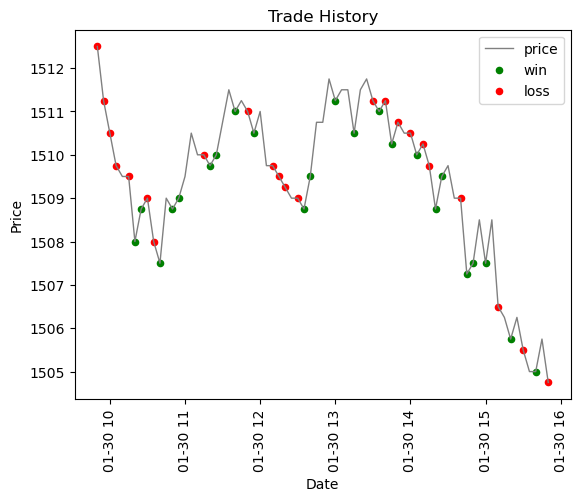

In [314]:
#plotting example trades
plot_trades(data_with_pred, 'pnl_strat0', 5500)

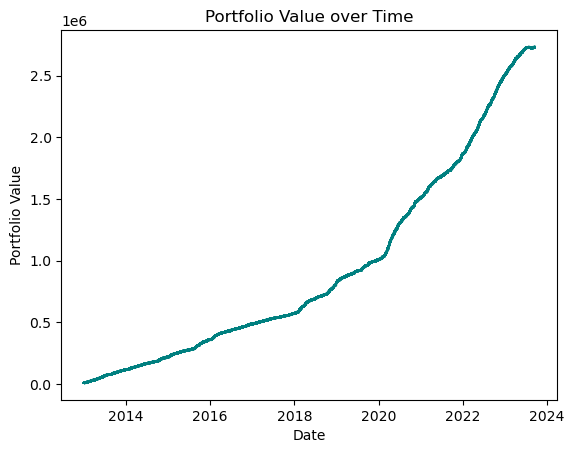

In [315]:
#plotting portfolio value over time
plt.plot(data_with_pred['date'],   data_with_pred['pnl_strat0'].cumsum(axis = 0, skipna = True) + 10000, color = 'teal')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value over Time')
plt.show()

### Strat 1 - Basic Strategy - Trend Following

The below strategy is an example of a simple trend following strategy. It checks to see if the price is greater than the 20 EMA - if it is it shows the trend is going up with momentum as price is exceeding its moving average. It then checks to see if the RSI recently crossed below 70, which is usually a bearish strategy. However, since we are observing trend following properties (price > 20 EMA) we can use this RSI indicator as a pullback indicator to find a good price to enter the trade as it climbs back up. This combined with our ML prediction forms our strategy.

For entry and exit prices, these work the same as above. Enter on the current candles close when the criteria all say buy, and exit at the next candles close.

From the numbers below we can see we get a strong profit over the walk forward set considering it is only 3 months. There is also a strong win %, exceptional Sharpe ratio, good annualized profits. The same performance is not seen in the test set. It is still generating a profit; however the annualized profits are down significantly. This is primarily due to the mean winner being much higher than the mean loser in the walk forward set, this was not the case in the test set where they were more comparable.

In [879]:
#calculating the PNL for the strategy

if 'pnl_strat1' in data_with_pred.columns:
    data_with_pred = data_with_pred.drop('pnl_strat1', axis = 1)

data_with_pred.loc[(data_with_pred['prediction_all'] == 1) & 
                   (data_with_pred['rsi_bearish_strat'] == 1) &
                   (data_with_pred['close'] > data_with_pred['close'].ewm(com = 20).mean()),
                   'pnl_strat1'] = (data_with_pred['close'].shift(-1) - data_with_pred['close']) /0.25 * 12.5

In [889]:
#displaying results from the walk forward set
strat_results(data_with_pred.loc[data_with_pred['prediction_wf'] == 1], 'strat_1', 'pnl_strat1', 10000)

strat_1 results:
Profit/(loss)      4587
PNL annualized     21408
Win %              55.41
Sharpe ratio       3.62

Stats for winners 
count    123.000000
mean     111.382114
std       94.237233
min       12.500000
max      825.000000
Name: pnl_strat1, dtype: float64

Stats for losers  
count     99.000000
mean     -92.045455
std       80.623656
min     -562.500000
max      -12.500000
Name: pnl_strat1, dtype: float64


In [890]:
#displaying results from the test set
strat_results(data_with_pred.loc[data_with_pred['prediction_test'] == 1], 'strat_1', 'pnl_strat1', 10000)

strat_1 results:
Profit/(loss)      12287
PNL annualized     5736
Win %              54.5
Sharpe ratio       0.5

Stats for winners 
count    1132.000000
mean       70.351148
std       108.274503
min        12.500000
max      1787.500000
Name: pnl_strat1, dtype: float64

Stats for losers  
count     945.000000
mean      -71.269841
std       134.494950
min     -3087.500000
max       -12.500000
Name: pnl_strat1, dtype: float64


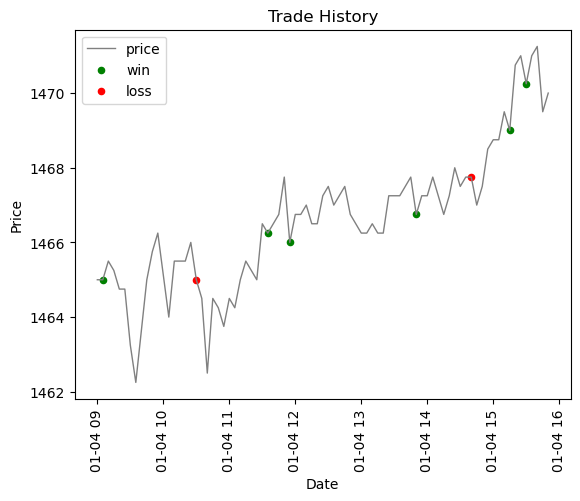

In [283]:
#plotting example trades
plot_trades(data_with_pred, 'pnl_strat1', 500)

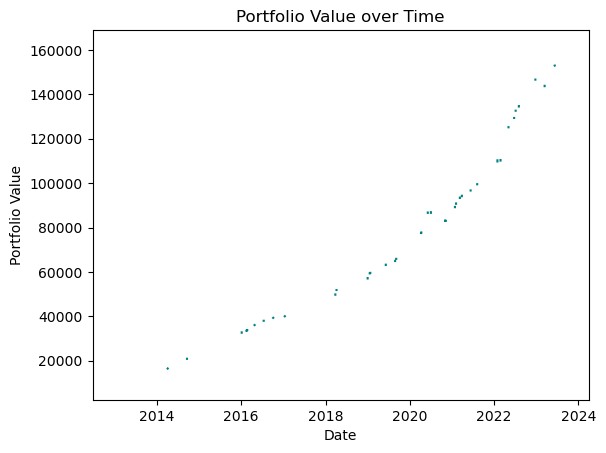

In [277]:
#plotting portfolio value over time
plt.plot(data_with_pred['date'],   data_with_pred['pnl_strat1'].cumsum(axis = 0, skipna = True) + 10000, color = 'teal')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value over Time')
plt.show()

### Strat 2 - Risk Managed Strategy - Mean Reversion

You may have noticed in the prior strategies there was nothing limiting the risk of each trade. That is, there is nothing to limit how of loss you can take. While in theory this can be fine to not have it does raise a lot of risks as unexpected large losses can potentially bust you. In order to avoid this, the below strategy now adds a target and stop price to manage some of the risk. 

The target and stop price are determined based off the ATR as discussed up in feature selection. We take profits at 1 ATR beyond our current bars close, or we exit at 1 ATR below our current bars close if it goes in the wrong direction. On top of this, it also limits our stop loss (and hence total possible loss) to be no more than \$4. If the stop loss will exceed \\$4 it will skip the trade. 

These risk management tools limit our upside potential; however, it limits our risk. Given this is a game of numbers and the key is to have a statistical edge, having more predictable profits and losses adds validity into the long term success of the strategy.

This strategy is based on a mean reversion strategy. That is, it starts by ensuring the price is below the 20 EMA. It then checks to ensure our trend direction is up (1). Lastly it checks to see if the MACD is showing a bullish divergence to support that prices are now ready to reverse back to the mean. This combined with the ML indicator forms the strategy.

Below we can see a few things:
- The max winner and min loser are the same - this shows that our max loss feature is working as intended. \\$4 represents 16 ticks which is $200 (16 * 12.50)
- Our mean trades between the winners and losers are comparable. This again shows that are risk management tools mentioned are working
- Both strategies had a strong win % supporting our long term statistical edge. It is also worth noting that the strategies win % is higher than our precision on our underlying ML model. This supports that the additional criteria are improving the predictability of the strategy.
- Sharpe ratios are both around 1 or over. This shows that there is some merit to this strategy


In [894]:
#as this strategy is more complex I need to setup a feature see if it met the general criteria, then calculate the PNl after.
if 'met_strat2' in data_with_pred.columns:
    data_with_pred = data_with_pred.drop('met_strat2', axis = 1)

data_with_pred.loc[(data_with_pred['prediction_all'] == 1) & 
                   (data_with_pred['trend_direction'] == 1) &
                   (data_with_pred['macd_bullish'] == 1) &
                   (data_with_pred['close'] < data_with_pred['close'].ewm(com = 20).mean()),
                   'met_strat2'] = 1

In [866]:
if 'pnl_strat2' in data_with_pred.columns:
    data_with_pred = data_with_pred.drop('pnl_strat2', axis = 1)
    
#iterating through rows where strategy 2 is met
for index, row in data_with_pred.loc[data_with_pred['met_strat2'] == 1].iterrows():
    index_tracker = 1
    
    #setting up the size of profit or loss for the trade
    atr_adjustment_loss = 1
    atr_adjustment_profit = 1 
    target_loss = round(row['atr'] * atr_adjustment_loss * 4) / 4      #the rounding and * 4 / 4 are done to round to the nearest $0.25
    target_profit = round(row['atr'] * atr_adjustment_profit * 4) / 4    
    
    #setting up the target and stop loss price
    stop_loss = row['close'] - target_loss 
    target = row['close'] + target_profit 
    
    #filter to skip any trades with a loss exceeding $4 (16 ticks or $200)
    if  target_loss  > 4:
        continue

    for i in range(index + 1, data.index[-1]):
        #as their are situations where the stock will touch both our target and stop loss in the same bar, 
        #below filters those trades out and skips them as there is no way to know which would hit first 
        if (data.loc[index + index_tracker, 'low'] <= stop_loss) & (data.loc[index + index_tracker, 'high'] >= target):
            break
        
        #recording the loss if it is met
        if data.loc[index + index_tracker, 'low'] <= stop_loss:
            data_with_pred.loc[index, 'pnl_strat2'] = - target_loss /0.25 * 12.5
            break 
            
        #recording the gain if it met
        if data.loc[index + index_tracker, 'high'] >= target:
            data_with_pred.loc[index, 'pnl_strat2'] = target_profit  /0.25 * 12.5
            break            
        index_tracker = index_tracker + 1
        

In [883]:
#displaying results from the walk forward set
strat_results(data_with_pred.loc[data_with_pred['prediction_wf'] == 1], 'strat_2', 'pnl_strat2', 10000)

strat_2 results:
Profit/(loss)      1362
PNL annualized     6358
Win %              56.58
Sharpe ratio       1.4

Stats for winners 
count     43.000000
mean     157.267442
std       31.720571
min       87.500000
max      200.000000
Name: pnl_strat2, dtype: float64

Stats for losers  
count     33.000000
mean    -163.636364
std       25.070922
min     -200.000000
max      -75.000000
Name: pnl_strat2, dtype: float64


In [884]:
#displaying results from the test set
strat_results(data_with_pred.loc[data_with_pred['prediction_test'] == 1], 'strat_2', 'pnl_strat2', 10000)

strat_2 results:
Profit/(loss)      11200
PNL annualized     5228
Win %              59.86
Sharpe ratio       0.95

Stats for winners 
count    334.000000
mean     111.714072
std       43.256166
min       37.500000
max      200.000000
Name: pnl_strat2, dtype: float64

Stats for losers  
count    224.000000
mean    -116.573661
std       48.659222
min     -200.000000
max      -37.500000
Name: pnl_strat2, dtype: float64


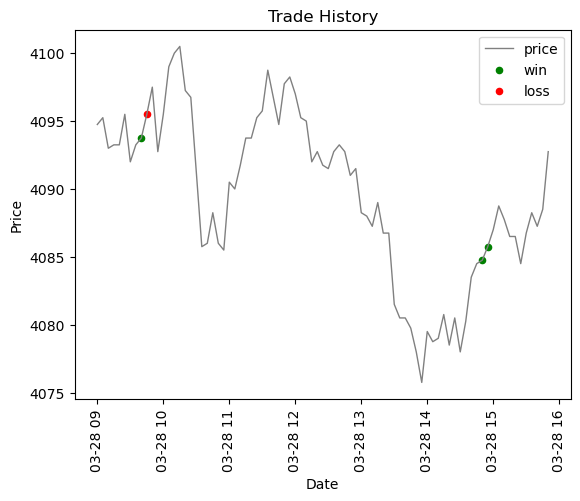

In [320]:
#plotting example trades
plot_trades(data_with_pred, 'pnl_strat2', 720000)

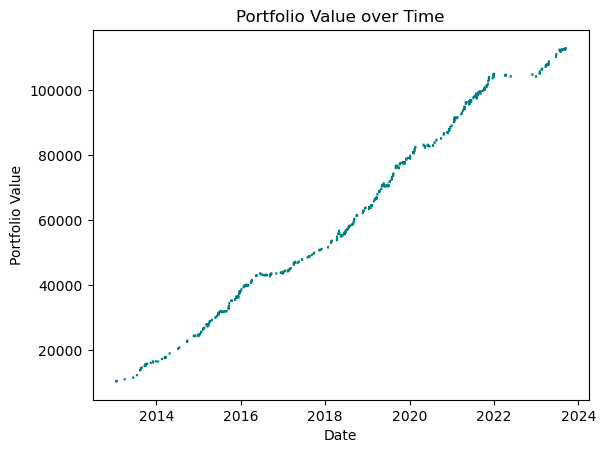

In [321]:
#plotting portfolio value over time
plt.plot(data_with_pred['date'],   data_with_pred['pnl_strat2'].cumsum(axis = 0, skipna = True) + 10000, color = 'teal')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value over Time')
plt.show()

### Strat 3 - Stricter Entry Requirements - Mean Reversion

Below takes what we built above in strategy 2 and adds an additional criterion to enter a trade. This criterion isn't met by an indicator like the other ones. But before I get to it, let’s explain the basic strategy. 

This a mean reversion strategy. It again ensures the price is below the 20 EMA. It then checks to see that it is a bar type 1 - which is a bullish bar, showing a strong upwards movement in that bar. It then checks to see if there was a recent bullish cross of the stochastic k% and d%, providing support that prices are going to reverse back to the mean. Once all these criteria are met we can start looking for a trade. This with the ML indicator forms the basic buy indicator.

This is where the additional criteria mentioned at the start comes in. For reference the current bar where we evaluate if the strategies criteria are met will be referred to as the signal bar, and the bar after the signal bar (where we would see the trade occur) will be referred to as the entry bar. When the above criteria are met it will give us the signal to enter on the next bar. However, it will only enter on the next bar (entry bar) if that bars high exceeds the signal bar - this is done to add further support that an upward movement is expected (it went higher than the previous bar). Now since the price is rising above our signal bars high, we can no longer say it’s realistic to enter at the signal bars close price. Instead, we will now enter at 1 tick or \\$0.25 above the high of the signal bar. 

Example. If the signal bar had a high of \\$4,001.25 we would only enter the trade if it broke higher (\\$4,001.50). At this point we would enter the trade. All else works the same now. The ATR is then used to calculate the target and stop except instead of using the close price it is calculated off the high plus 1 tick or \\$0.25.

Looking at the metrics below we can see that this strategy doesn't appear to be as robust as strategy 2. It is achieving significantly higher profits in the walk forward set then it is in the test set. This could be due to a number of reasons:
- The market in the walk forward set is very sideways/choppy, so it lacks strong trends. Mean reversion strategies can work stronger in sideways movement.
- The strategy is over fit to the walk forward set, and doesn't apply well to most other periods in the market. That being said we can see the test set is profiting still, so perhaps there is additional criteria not explored that can help locate similar market conditions in the test set that are present in the walk forward set.


In [828]:
#as this strategy is more complex I need to setup a feature see if it met the general criteria, then calculate the PNl after.
if 'met_strat3' in data_with_pred.columns:
    data_with_pred = data_with_pred.drop('met_strat3', axis = 1)

data_with_pred.loc[(data_with_pred['prediction_all'] == 1) & 
                   (data_with_pred['bar_type'] == 1) &
                   (data_with_pred['stochastic_bullish_cross_recent'] == 1) &
                   (data_with_pred['close'] < data_with_pred['close'].ewm(com = 20).mean()),
                   'met_strat3'] = 1

In [829]:
if 'pnl_strat3' in data_with_pred.columns:
    data_with_pred = data_with_pred.drop('pnl_strat3', axis = 1)
    
#iterating through rows where strategy 3 is met
for index, row in data_with_pred.loc[data_with_pred['met_strat3'] == 1].iterrows():
    index_tracker = 1
    
    #setting up the size of profit or loss for the trade
    atr_adjustment_loss = 1
    atr_adjustment_profit = 1
    target_loss = round(row['atr'] * atr_adjustment_loss * 4) / 4       #The rounding and * 4 / 4 are done to round to the nearest $0.25
    target_profit = round(row['atr'] * atr_adjustment_profit * 4) / 4    
    
    #setting up the target and stop loss price
    stop_loss = row['high'] + 0.25 - target_loss 
    target = row['high'] + 0.25 + target_profit 
    
    #filter to skip any trades with a loss exceeding $6 (24 ticks or $300)
    if  target_loss  > 6:
        continue
    
    #setting up criterion to only take the trade if the high breaks higher than our signal bars high
    if data.loc[index + index_tracker, 'high'] > row['high']: 
    
        for i in range(index + 1, data.index[-1]):
            #as their are situations where the stock will touch both our target and stop loss in the same bar, 
            #below filters those trades out and skips them as there is no way to know which would hit first. 
            if (data.loc[index + index_tracker, 'low'] <= stop_loss) & (data.loc[index + index_tracker, 'high'] >= target):
                break
                
            #recording the loss if it is met
            if data.loc[index + index_tracker, 'low'] <= stop_loss:
                data_with_pred.loc[index, 'pnl_strat3'] = - target_loss /0.25 * 12.5
                break 
                
             #recording the gain if it is met
            if data.loc[index + index_tracker, 'high'] >= target:
                data_with_pred.loc[index, 'pnl_strat3'] = target_profit  /0.25 * 12.5
                break            
            index_tracker = index_tracker + 1
            
        else:
            continue
        

In [885]:
#displaying results from the walk forward set
strat_results(data_with_pred.loc[data_with_pred['prediction_wf'] == 1], 'strat_3', 'pnl_strat3', 10000)

strat_3 results:
Profit/(loss)      912
PNL annualized     4258
Win %              53.85
Sharpe ratio       1.22

Stats for winners 
count     28.000000
mean     190.178571
std       49.576580
min      100.000000
max      275.000000
Name: pnl_strat3, dtype: float64

Stats for losers  
count     24.000000
mean    -183.854167
std       45.366737
min     -275.000000
max      -75.000000
Name: pnl_strat3, dtype: float64


In [886]:
#displaying results from the test set
strat_results(data_with_pred.loc[data_with_pred['prediction_test'] == 1], 'strat_3', 'pnl_strat3', 10000)

strat_3 results:
Profit/(loss)      1487
PNL annualized     694
Win %              48.12
Sharpe ratio       0.13

Stats for winners 
count    218.000000
mean     132.568807
std       64.233301
min       37.500000
max      300.000000
Name: pnl_strat3, dtype: float64

Stats for losers  
count    235.000000
mean    -116.648936
std       65.014127
min     -300.000000
max      -25.000000
Name: pnl_strat3, dtype: float64


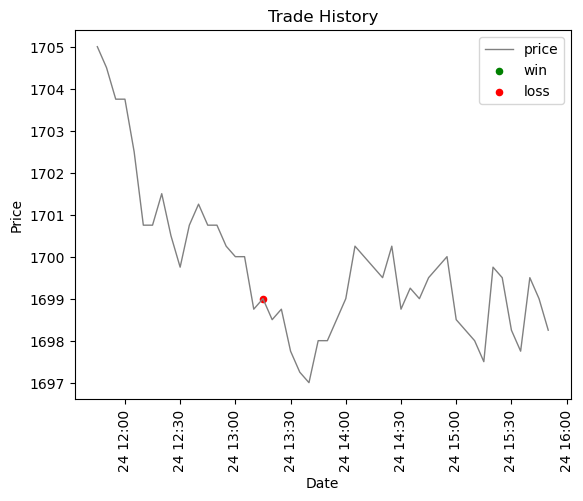

In [853]:
#plotting example trades
plot_trades(data_with_pred, 'pnl_strat3', 39500)

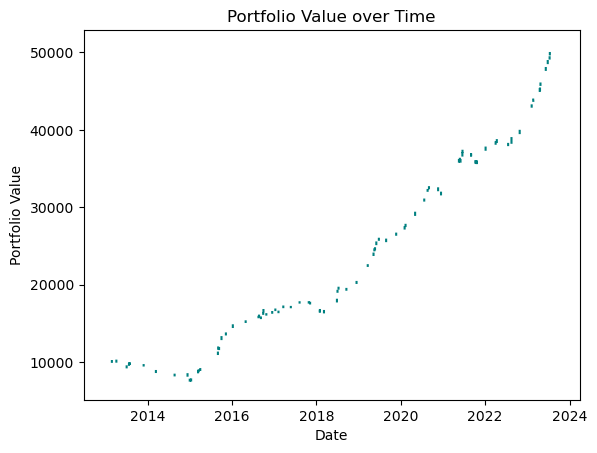

In [833]:
#plotting portfolio value over time
plt.plot(data_with_pred['date'],   data_with_pred['pnl_strat3'].cumsum(axis = 0, skipna = True) + 10000, color = 'teal')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value over Time')
plt.show()

### ----------------------------------------------------------------------------------------------------------------------------------------------------------
# Strategy Selection & Evaluation 
### ----------------------------------------------------------------------------------------------------------------------------------------------------------

Based on the above strategies, strategy 2 will be implemented. This is due to a number of reasons:
- It produces comparable results on both the test and walk forward set showing its robustness
- It has an acceptable Sharpe ratio and annualized profits
- It has implemented risk management tools which should increase the probability of the strategy succeeding

Now that we have selected our optimal model lets evaluate it compared to the market. As mentioned at the start of the notebook, we will compare the strategy to a buy and hold of the S&P 500 index fund (symbol SPY). This is used instead of the ES as the ES is highly leveraged and could likely bankrupt you in a downturn. Additionally, due to the ES being on margin, you have to pay margin rates (interest) when they are held overnight (not closed by the end of the day like in day trading).

The below prices were taken from Yahoo Finance:
- Price as of Jan 1, 2013 (start of all data): \\$146.06

- Price as of July 1, 2023 (end of backtest data and start of walk forward data): \\$443.79
- Price as of Sep 15,2023 (end of walk forward data): \\$443.37

These prices are used below to calculate the expected profit for each set of data if you just bought and held. Since the test data is not linear and calculating such a gain would be difficult. To calculate the return for the test set, I calculated the return for all back test data (Jan 1, 2023 to Sept 15, 2023) and then multiplied it by the train test split of 0.2. I feel like this is a fair approach for calculating the test benchmark.

As a reminder, strategy 2 produced profits of \\$1,326 and \\$11,200 over the walk forward and test set respectively. From the buy and hold benchmark profits below we can see that the day trading strategies significantly outperformed a simple buy and hold strategy. As such it appears reasonable to use this day trading strategy.

In [877]:
#below calculates the realized profit. 
#to do so it first calculates the gain over the period.
#it then multiplies it by the number of shares you would of been able to buy at the start had you invested $10,000 
#this is the same amount as used for the margin requirement on the day trading bot.
benchmark_return_test = (10000 / 146.06) * (443.07 -146.06) * .2   #.2 used as thats the % allocated to the test set in the split
benchmark_return_wf = (10000 / 443.37) * (443.79 -443.37)
print('Test set estimated profit:         $', int(benchmark_return_test))
print('Walk forward set estimated profit: $', int(benchmark_return_wf))

Test set estimated profit:         $ 4066
Walk forward set estimated profit: $ 9


### ----------------------------------------------------------------------------------------------------------------------------------------------------------
# Wrap-up and Summary
### ----------------------------------------------------------------------------------------------------------------------------------------------------------

In this project we have created a day trading bot that appears to have some validity. In doing so we looked at a variety of features to try and encapsulate the direction of the market. We leveraged these features to create a variety of machine learning model with the optimal model being an ensemble of them all in a hard voting classifier. This classifier was combined with additional criteria and risk management tools to increase its statistical edge (strategy win % of 57% vs 53% model precision) and generate greater profits then a passive buy and hold strategy.

It is important to note that although there is some validity to the strategy, its practical use has not been confirmed. Additional research should be done over this to ensure this isn't just overfitting the train or test data. Completing something similar to cross fold validation may provide additional confidence over the strategy.

Given my computational constraints throughout the project, it would be interesting to see how much performance and profitability could be increased but this is something to be explored at a later day.


### ----------------------------------------------------------------------------------------------------------------------------------------------------------
# User Interface
### ----------------------------------------------------------------------------------------------------------------------------------------------------------

See comments up top under project description for further information about the user interface. See seperate Flask files for the user interface.